# Capstone Project: KL/Selangor Rental Price Prediction

## Problem Statement

When it comes to setting up a rental price or giving out indications, homeowners, valuers, or realtors, tend to rely on the internet to check the rental market rate from property websites such as PropertyGuru, mudah.my, iProperty, and many others. As easy as it may sound, “the inconsistency of information can easily be found in websites as most of the residential property providers did not own its property data. The objective of most residential property web is more focused on providing a platform for users to share their information. Thus, inconsistent information occurs due to different sets of data may not be entered by the same person (Kee Li Yap, 2020). One can choose their preferred rate suitable for their home from the property websites, but how can one assured on the accuracy of the price per the property’s features? Under-pricing can result in a loss of income, while on the other hand, overpricing can make it difficult to rent the property and lose out on a suitable customer base. It is, therefore, crucial to examine the rental price carefully and suggest a fair rental rate that reflects the property’s value (Dong Xue Ying, 2023). Hence, in this project, I will predict the rental range in terms of low, medium, high.

Commonly used models for predicting rental prices include Logistic Regression, Decision Trees, Random Forests, and Gradient Boosting algorithms.


## Objectives
1.To identify the trend of rental rate/price.

2.To identify the most correlated features that influence rental rate/prices

3.To build a model that predicts the monthly rental for high-rise residential property in KL/Selangor using a dataset. In this project I will use a high-rise housing dataset obtained from Kaggel (https://www.kaggle.com/datasets/ariewijaya/rent-pricing-kuala-lumpur-malaysi).


## Load data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

%matplotlib inline

library will be added/edited as i progress

In [5]:
rental = pd.read_csv('data.csv')

## Explore the data

In [6]:
rental.head()

ads_id                      prop_name  completion_year  \
0  100323185       The Hipster @ Taman Desa           2022.0   
1  100203973                   Segar Courts              NaN   
2  100323128  Pangsapuri Teratak Muhibbah 2              NaN   
3  100191767   Sentul Point Suite Apartment           2020.0   
4   97022692                Arte Mont Kiara              NaN   

         monthly_rent                   location      property_type rooms  \
0  RM 4 200 per month  Kuala Lumpur - Taman Desa        Condominium     5   
1  RM 2 300 per month      Kuala Lumpur - Cheras        Condominium     3   
2  RM 1 000 per month  Kuala Lumpur - Taman Desa          Apartment     3   
3  RM 1 700 per month      Kuala Lumpur - Sentul          Apartment     2   
4  RM 1 299 per month  Kuala Lumpur - Mont Kiara  Service Residence     1   

   parking  bathroom         size            furnished  \
0      2.0       6.0  1842 sq.ft.      Fully Furnished   
1      1.0       2.0  1170 sq.ft.  Partially Furnished   
2      NaN       2.0   650 sq.ft.      Fully Furnished   
3      1.0       2.0   743 sq.ft.  Partially Furnished   
4      1.0       1.0   494 sq.ft.        Not Furnished   

                                          facilities  \
0  Minimart, Gymnasium, Security, Playground, Swi...   
1  Playground, Parking, Barbeque area, Security, ...   
2       Minimart, Jogging Track, Lift, Swimming Pool   
3  Parking, Playground, Swimming Pool, Squash Cou...   
4  Parking, Security, Lift, Swimming Pool, Playgr...   

                            additional_facilities        region  
0      Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur  
1         Air-Cond, Cooking Allowed, Near KTM/LRT  Kuala Lumpur  
2                                             NaN  Kuala Lumpur  
3  Cooking Allowed, Near KTM/LRT, Washing Machine  Kuala Lumpur  
4                                        Air-Cond  Kuala Lumpur

In [7]:
rental.shape

(19991, 14)

In [8]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

In [9]:
rental.describe()

ads_id  completion_year       parking      bathroom
count  1.999100e+04     10806.000000  14289.000000  19985.000000
mean   9.970671e+07      2014.822321      1.416824      1.891719
std    3.482575e+06         6.735355      0.567368      0.556266
min    1.652551e+07      1977.000000      1.000000      1.000000
25%    9.984012e+07      2012.000000      1.000000      2.000000
50%    1.002127e+08      2017.000000      1.000000      2.000000
75%    1.006179e+08      2020.000000      2.000000      2.000000
max    1.008546e+08      2025.000000     10.000000      8.000000

In [10]:
rental.dtypes

ads_id                     int64
prop_name                 object
completion_year          float64
monthly_rent              object
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
dtype: object

In [11]:
rental.isnull().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

### Data cleaning/filling

Null value is a no-no in data analysis. So, these null values must be replaced with some other value by using the df.fillna function.

From the above figure, 8 out of 9 columns (completion_year, monthly_rent, rooms, parking, bathroom, furnished, facilities and additional_facilities) I will fill the null values with the df.fillna().mode() function. This function will use the mode of the column to fill or replace the null values in the very same column. 


In [12]:
rental['parking'].fillna(rental['parking'].mode()[0], inplace=True)

In [13]:
rental.isnull().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                     0
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

In [14]:
rental.head()

ads_id                      prop_name  completion_year  \
0  100323185       The Hipster @ Taman Desa           2022.0   
1  100203973                   Segar Courts              NaN   
2  100323128  Pangsapuri Teratak Muhibbah 2              NaN   
3  100191767   Sentul Point Suite Apartment           2020.0   
4   97022692                Arte Mont Kiara              NaN   

         monthly_rent                   location      property_type rooms  \
0  RM 4 200 per month  Kuala Lumpur - Taman Desa        Condominium     5   
1  RM 2 300 per month      Kuala Lumpur - Cheras        Condominium     3   
2  RM 1 000 per month  Kuala Lumpur - Taman Desa          Apartment     3   
3  RM 1 700 per month      Kuala Lumpur - Sentul          Apartment     2   
4  RM 1 299 per month  Kuala Lumpur - Mont Kiara  Service Residence     1   

   parking  bathroom         size            furnished  \
0      2.0       6.0  1842 sq.ft.      Fully Furnished   
1      1.0       2.0  1170 sq.ft.  Partially Furnished   
2      1.0       2.0   650 sq.ft.      Fully Furnished   
3      1.0       2.0   743 sq.ft.  Partially Furnished   
4      1.0       1.0   494 sq.ft.        Not Furnished   

                                          facilities  \
0  Minimart, Gymnasium, Security, Playground, Swi...   
1  Playground, Parking, Barbeque area, Security, ...   
2       Minimart, Jogging Track, Lift, Swimming Pool   
3  Parking, Playground, Swimming Pool, Squash Cou...   
4  Parking, Security, Lift, Swimming Pool, Playgr...   

                            additional_facilities        region  
0      Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur  
1         Air-Cond, Cooking Allowed, Near KTM/LRT  Kuala Lumpur  
2                                             NaN  Kuala Lumpur  
3  Cooking Allowed, Near KTM/LRT, Washing Machine  Kuala Lumpur  
4                                        Air-Cond  Kuala Lumpur

In [15]:
rental['monthly_rent'].fillna(rental['monthly_rent'].mode()[0], inplace=True)

In [16]:
rental['completion_year'].fillna(rental['completion_year'].mode()[0], inplace=True)

In [17]:
rental['rooms'].fillna(rental['rooms'].mode()[0], inplace=True)

In [18]:
rental['bathroom'].fillna(rental['bathroom'].mode()[0], inplace=True)

In [19]:
rental['furnished'].fillna(rental['furnished'].mode()[0], inplace=True)

In [20]:
rental['facilities'].fillna(rental['facilities'].mode()[0], inplace=True)

In [21]:
rental['additional_facilities'].fillna(rental['additional_facilities'].mode()[0], inplace=True)

In [22]:
rental.head()

ads_id                      prop_name  completion_year  \
0  100323185       The Hipster @ Taman Desa           2022.0   
1  100203973                   Segar Courts           2021.0   
2  100323128  Pangsapuri Teratak Muhibbah 2           2021.0   
3  100191767   Sentul Point Suite Apartment           2020.0   
4   97022692                Arte Mont Kiara           2021.0   

         monthly_rent                   location      property_type rooms  \
0  RM 4 200 per month  Kuala Lumpur - Taman Desa        Condominium     5   
1  RM 2 300 per month      Kuala Lumpur - Cheras        Condominium     3   
2  RM 1 000 per month  Kuala Lumpur - Taman Desa          Apartment     3   
3  RM 1 700 per month      Kuala Lumpur - Sentul          Apartment     2   
4  RM 1 299 per month  Kuala Lumpur - Mont Kiara  Service Residence     1   

   parking  bathroom         size            furnished  \
0      2.0       6.0  1842 sq.ft.      Fully Furnished   
1      1.0       2.0  1170 sq.ft.  Partially Furnished   
2      1.0       2.0   650 sq.ft.      Fully Furnished   
3      1.0       2.0   743 sq.ft.  Partially Furnished   
4      1.0       1.0   494 sq.ft.        Not Furnished   

                                          facilities  \
0  Minimart, Gymnasium, Security, Playground, Swi...   
1  Playground, Parking, Barbeque area, Security, ...   
2       Minimart, Jogging Track, Lift, Swimming Pool   
3  Parking, Playground, Swimming Pool, Squash Cou...   
4  Parking, Security, Lift, Swimming Pool, Playgr...   

                            additional_facilities        region  
0      Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur  
1         Air-Cond, Cooking Allowed, Near KTM/LRT  Kuala Lumpur  
2      Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur  
3  Cooking Allowed, Near KTM/LRT, Washing Machine  Kuala Lumpur  
4                                        Air-Cond  Kuala Lumpur

In [23]:
rental.isnull().sum()

ads_id                     0
prop_name                948
completion_year            0
monthly_rent               0
location                   0
property_type              0
rooms                      0
parking                    0
bathroom                   0
size                       0
furnished                  0
facilities                 0
additional_facilities      0
region                     0
dtype: int64

### Drop unwanted columns

Ads_id and prop_name columns are not usable, so both columns will be  dropped 

In [24]:
rental.drop('ads_id', axis=1, inplace=True)

In [25]:
rental.drop('prop_name', axis=1, inplace=True)

In [26]:
rental.head()

completion_year        monthly_rent                   location  \
0           2022.0  RM 4 200 per month  Kuala Lumpur - Taman Desa   
1           2021.0  RM 2 300 per month      Kuala Lumpur - Cheras   
2           2021.0  RM 1 000 per month  Kuala Lumpur - Taman Desa   
3           2020.0  RM 1 700 per month      Kuala Lumpur - Sentul   
4           2021.0  RM 1 299 per month  Kuala Lumpur - Mont Kiara   

       property_type rooms  parking  bathroom         size  \
0        Condominium     5      2.0       6.0  1842 sq.ft.   
1        Condominium     3      1.0       2.0  1170 sq.ft.   
2          Apartment     3      1.0       2.0   650 sq.ft.   
3          Apartment     2      1.0       2.0   743 sq.ft.   
4  Service Residence     1      1.0       1.0   494 sq.ft.   

             furnished                                         facilities  \
0      Fully Furnished  Minimart, Gymnasium, Security, Playground, Swi...   
1  Partially Furnished  Playground, Parking, Barbeque area, Security, ...   
2      Fully Furnished       Minimart, Jogging Track, Lift, Swimming Pool   
3  Partially Furnished  Parking, Playground, Swimming Pool, Squash Cou...   
4        Not Furnished  Parking, Security, Lift, Swimming Pool, Playgr...   

                            additional_facilities        region  
0      Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur  
1         Air-Cond, Cooking Allowed, Near KTM/LRT  Kuala Lumpur  
2      Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur  
3  Cooking Allowed, Near KTM/LRT, Washing Machine  Kuala Lumpur  
4                                        Air-Cond  Kuala Lumpur

In [27]:
rental.isnull().sum()

completion_year          0
monthly_rent             0
location                 0
property_type            0
rooms                    0
parking                  0
bathroom                 0
size                     0
furnished                0
facilities               0
additional_facilities    0
region                   0
dtype: int64

In [28]:
rental.shape

(19991, 12)

### Clasifying the monthly_rent

Since I am going to do a Classification model, I will need to classify the rental data as it is a continuous number. If I am to do a Regression model, this is not needed.

Since there is no guidelines to classify the monthly rental, I would have to deduce it myself. As rental in real estate can be a subjective matter (as it depends on various factors), I would classify them into 3 categories, low/medium/high. When it comes to paying for a rental, it will be based on the salary. Can you afford to pay for it or not? So, such classification would be based on the average salary of 3 main categories in Malaysia that is, B40/M40/T20. Based on the average salary of each group, the range of how much can they afford to pay for rent would be the threshold for the classification.

According to DOSM, in 2022, the mean (average) income across the household groups is:
B40 – RM3,401
M40 – RM7,971
T20 – RM19,752

Median
B40 – RM3,440
M40 – RM7,694
T20 – RM15,867. 


Threshold
B40 – RM5,250 and below
M40 – RM 5250 – RM11,819
T20 – RM11,820 and above

According to Speedhome, there is no strict rule on how much of your income should go to rent as it is all depends on your neighborhood, your place of work, and how much you earn. However, experts have advised to not surpass 30% of your income when spending on a rental.

So, from the threshold, I will take 30% as the mark-up.

For B40 and M40 I used the highest amount of the threshold, RM5,520 and RM11,819 respectively. However, for T20 I used the mean as it has a higher amount than its median and also as T20 income starts from 11.8k and above to which there is no limit. 

Finally, this new range would be the threshold for the classification. It will be classified as follows:

Low – From RM1600 and below
Medium – Between RM1600 to RM5999
High – From RM6000 and above


that include one's affodability to rent a house based on it's monthly income

### Extract value from monthly_rent column

For this column, firstly I will have to extract the numbers only using the function df.str.extract. This will create a new column (monthly_rent_price). Then I sorted the values from lowest to highest using the df.sort_values function as the values are now a series. The output showed that there are some rows with 6-digits figures which is inappropriate to be considered as rental. Therefore, I have to replace the values in these cells using df.loc and np.random.randint function. But before that, I used the df.filter function to take a deeper look at the column like how many rows have at least 6 digits. 

In [29]:
rental['monthly_rent_price'] = rental['monthly_rent'].str.extract(r'(\d+\s?\d*)').replace(' ', '', regex=True).astype(int)

In [30]:
rental['monthly_rent_price']

0        4200
1        2300
2        1000
3        1700
4        1299
         ... 
19986    1200
19987    1300
19988    1350
19989    1200
19990    1000
Name: monthly_rent_price, Length: 19991, dtype: int32

In [31]:
rental

completion_year        monthly_rent                         location  \
0               2022.0  RM 4 200 per month        Kuala Lumpur - Taman Desa   
1               2021.0  RM 2 300 per month            Kuala Lumpur - Cheras   
2               2021.0  RM 1 000 per month        Kuala Lumpur - Taman Desa   
3               2020.0  RM 1 700 per month            Kuala Lumpur - Sentul   
4               2021.0  RM 1 299 per month        Kuala Lumpur - Mont Kiara   
...                ...                 ...                              ...   
19986           2021.0  RM 1 200 per month                Selangor - Kajang   
19987           2018.0  RM 1 300 per month  Selangor - Bandar Saujana Putra   
19988           2021.0  RM 1 350 per month                Selangor - Kajang   
19989           2021.0  RM 1 200 per month             Selangor - Cyberjaya   
19990           2016.0  RM 1 000 per month             Selangor - Cyberjaya   

           property_type rooms  parking  bathroom         size  \
0            Condominium     5      2.0       6.0  1842 sq.ft.   
1            Condominium     3      1.0       2.0  1170 sq.ft.   
2              Apartment     3      1.0       2.0   650 sq.ft.   
3              Apartment     2      1.0       2.0   743 sq.ft.   
4      Service Residence     1      1.0       1.0   494 sq.ft.   
...                  ...   ...      ...       ...          ...   
19986          Apartment     3      1.0       2.0  1000 sq.ft.   
19987  Service Residence     4      2.0       3.0  1427 sq.ft.   
19988        Condominium     3      2.0       2.0  1270 sq.ft.   
19989  Service Residence     3      1.0       2.0  1100 sq.ft.   
19990             Studio     1      1.0       1.0   580 sq.ft.   

                 furnished                                         facilities  \
0          Fully Furnished  Minimart, Gymnasium, Security, Playground, Swi...   
1      Partially Furnished  Playground, Parking, Barbeque area, Security, ...   
2          Fully Furnished       Minimart, Jogging Track, Lift, Swimming Pool   
3      Partially Furnished  Parking, Playground, Swimming Pool, Squash Cou...   
4            Not Furnished  Parking, Security, Lift, Swimming Pool, Playgr...   
...                    ...                                                ...   
19986  Partially Furnished  Security, Parking, Lift, Minimart, Multipurpos...   
19987  Partially Furnished  Jogging Track, Barbeque area, Playground, Swim...   
19988  Partially Furnished  Parking, Security, Lift, Swimming Pool, Playgr...   
19989      Fully Furnished  Parking, Security, Lift, Swimming Pool, Playgr...   
19990  Partially Furnished  Parking, Security, Lift, Swimming Pool, Playgr...   

                                additional_facilities        region  \
0          Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur   
1             Air-Cond, Cooking Allowed, Near KTM/LRT  Kuala Lumpur   
2          Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur   
3      Cooking Allowed, Near KTM/LRT, Washing Machine  Kuala Lumpur   
4                                            Air-Cond  Kuala Lumpur   
...                                               ...           ...   
19986                                    Near KTM/LRT      Selangor   
19987                       Air-Cond, Cooking Allowed      Selangor   
19988      Air-Cond, Cooking Allowed, Washing Machine      Selangor   
19989                Cooking Allowed, Washing Machine      Selangor   
19990      Air-Cond, Cooking Allowed, Washing Machine      Selangor   

       monthly_rent_price  
0                    4200  
1                    2300  
2                    1000  
3                    1700  
4                    1299  
...                   ...  
19986                1200  
19987                1300  
19988                1350  
19989                1200  
19990                1000  

[19991 rows x 13 columns]

### Sorting the values from lowest to highest

In [32]:
monthly_rent_sort = rental['monthly_rent_price'].sort_values()

In [33]:
monthly_rent_sort

18712        70
17145        80
8062         80
15765        85
1716         90
          ...  
8642     550000
2374     580000
8640     580000
5705     580000
6367     780000
Name: monthly_rent_price, Length: 19991, dtype: int32

### Filter the values

From the sorting output, there are some rows with 6-digit figures which is inappropriate to be considered as rental. Instead it is more to selling price figure. So, I want to filter the rental to take deeper look.

### 100k and above

In [34]:
filtered_rent1 = rental[rental['monthly_rent_price'] > 100000]

In [35]:
sorted_filtered_rent1 = filtered_rent1.sort_values(by='monthly_rent_price')

In [36]:
print(sorted_filtered_rent1)

       completion_year          monthly_rent                    location  \
14207           2021.0  RM 105 000 per month         Selangor - Beranang   
10885           2021.0  RM 125 000 per month  Selangor - Damansara Damai   
12113           2021.0  RM 127 898 per month     Selangor - Kuala Langat   
12128           2021.0  RM 190 000 per month    Selangor - Petaling Jaya   
3341            2021.0  RM 200 000 per month  Kuala Lumpur - Wangsa Maju   
17140           2016.0  RM 215 000 per month   Selangor - Seri Kembangan   
17527           2021.0  RM 230 000 per month           Selangor - Cheras   
19868           2021.0  RM 240 000 per month   Selangor - Seri Kembangan   
8266            2021.0  RM 249 900 per month       Kuala Lumpur - Kepong   
7292            2021.0  RM 250 000 per month  Kuala Lumpur - Wangsa Maju   
3175            2021.0  RM 250 000 per month  Kuala Lumpur - Wangsa Maju   
3173            2021.0  RM 250 000 per month  Kuala Lumpur - Wangsa Maju   
9544        

### between 10k to 100k

In [37]:
filtered_rent2 = rental[(rental['monthly_rent_price'] >= 10000) & (rental['monthly_rent_price'] <= 100000)]

In [38]:
sorted_filtered_rent2 = filtered_rent2.sort_values(by='monthly_rent_price')

In [39]:
print(sorted_filtered_rent2)

       completion_year         monthly_rent                          location  \
588             2021.0  RM 10 000 per month        Kuala Lumpur - Bukit Tunku   
5398            2021.0  RM 10 000 per month  Kuala Lumpur - Damansara Heights   
4965            2021.0  RM 10 000 per month         Kuala Lumpur - Mont Kiara   
3673            2009.0  RM 10 000 per month        Kuala Lumpur - Bukit Tunku   
1237            2007.0  RM 10 000 per month               Kuala Lumpur - KLCC   
3093            2010.0  RM 10 000 per month               Kuala Lumpur - KLCC   
5273            2010.0  RM 10 300 per month               Kuala Lumpur - KLCC   
1128            2021.0  RM 10 500 per month         Kuala Lumpur - Mont Kiara   
6569            2021.0  RM 11 000 per month      Kuala Lumpur - Bukit Bintang   
6307            2021.0  RM 11 000 per month         Kuala Lumpur - Mont Kiara   
7460            2015.0  RM 11 500 per month       Kuala Lumpur - Ampang Hilir   
792             2015.0  RM 1

### between 5k to 10k

In [40]:
filtered_rent3 = rental[(rental['monthly_rent_price'] >= 5000) & (rental['monthly_rent_price'] <= 9500)]

In [41]:
sorted_filtered_rent3 = filtered_rent3.sort_values(by='monthly_rent_price')

In [42]:
print(sorted_filtered_rent3)

       completion_year        monthly_rent                     location  \
7017            2014.0  RM 5 000 per month        Kuala Lumpur - Cheras   
2290            2005.0  RM 5 000 per month    Kuala Lumpur - Mont Kiara   
2542            2012.0  RM 5 000 per month    Kuala Lumpur - Mont Kiara   
12627           2021.0  RM 5 000 per month       Selangor - Subang Jaya   
7895            2005.0  RM 5 000 per month    Kuala Lumpur - Mont Kiara   
...                ...                 ...                          ...   
1970            2019.0  RM 9 000 per month    Kuala Lumpur - Mont Kiara   
4350            2021.0  RM 9 000 per month  Kuala Lumpur - Ampang Hilir   
1432            2021.0  RM 9 500 per month        Kuala Lumpur - Cheras   
5757            2015.0  RM 9 500 per month          Kuala Lumpur - KLCC   
18214           2013.0  RM 9 500 per month     Selangor - Petaling Jaya   

           property_type rooms  parking  bathroom         size  \
7017         Condominium     6   

### 1K to 5K

In [43]:
filtered_rent4 = rental[(rental['monthly_rent_price'] >= 1000) & (rental['monthly_rent_price'] <= 5000)]

In [44]:
sorted_filtered_rent4 = filtered_rent4.sort_values(by='monthly_rent_price')

In [45]:
print(sorted_filtered_rent4)

       completion_year        monthly_rent                        location  \
19990           2016.0  RM 1 000 per month            Selangor - Cyberjaya   
5803            2021.0  RM 1 000 per month       Kuala Lumpur - Taman Desa   
5802            2021.0  RM 1 000 per month      Kuala Lumpur - Bukit Jalil   
5798            2021.0  RM 1 000 per month          Kuala Lumpur - Setapak   
5792            2021.0  RM 1 000 per month       Kuala Lumpur - Taman Desa   
...                ...                 ...                             ...   
1755            2021.0  RM 5 000 per month  Kuala Lumpur - Solaris Dutamas   
3152            2011.0  RM 5 000 per month             Kuala Lumpur - KLCC   
7017            2014.0  RM 5 000 per month           Kuala Lumpur - Cheras   
1134            2021.0  RM 5 000 per month       Kuala Lumpur - Mont Kiara   
4410            2021.0  RM 5 000 per month           Kuala Lumpur - Ampang   

           property_type rooms  parking  bathroom         size 

### 1k and below

In [46]:
filtered_rent5 = rental[(rental['monthly_rent_price'] < 1000) & (rental['monthly_rent_price'] <= 1000)]

In [47]:
sorted_filtered_rent5 = filtered_rent5.sort_values(by='monthly_rent_price')

In [48]:
print(sorted_filtered_rent5)

       completion_year      monthly_rent                   location  \
18712           2013.0   RM 70 per month  Selangor - Seri Kembangan   
8062            1994.0   RM 80 per month     Kuala Lumpur - Setapak   
17145           2021.0   RM 80 per month  Selangor - Kota Damansara   
15765           2021.0   RM 85 per month  Selangor - Seri Kembangan   
1716            2021.0   RM 90 per month     Kuala Lumpur - Setapak   
...                ...               ...                        ...   
19433           2021.0  RM 999 per month         Selangor - Puchong   
15961           2021.0  RM 999 per month    Selangor - Kuala Langat   
17486           2014.0  RM 999 per month             Selangor - USJ   
16516           2021.0  RM 999 per month       Selangor - Cyberjaya   
16274           2015.0  RM 999 per month  Selangor - Subang Bestari   

           property_type rooms  parking  bathroom         size  \
18712  Service Residence     3      1.0       2.0   100 sq.ft.   
8062         Co

### replace cells with selling price-like figures

To ensure the replacement of value are working, I want to check before and after values of the dataset using .describe()

In [49]:
print(rental['monthly_rent_price'].describe())

count     19991.000000
mean       2149.073533
std       14651.683832
min          70.000000
25%        1100.000000
50%        1400.000000
75%        1800.000000
max      780000.000000
Name: monthly_rent_price, dtype: float64


To identify values with non-rental figues, I use the condition df['monthly_rent_numeric'] >= 40000 

and replace those values with np.random.randint(1000, 5000, size=(df['monthly_rent_numeric'] >= 40000).sum()) to generate random values within the range 1000 to 5000 and replace the identified values.

In [50]:
rental.loc[rental['monthly_rent_price'] >= 40000, 'monthly_rent_price'] = np.random.randint(1000, 5000, size=(rental['monthly_rent_price'] >= 40000).sum())

In [51]:
print(rental['monthly_rent_price'].describe())

count    19991.000000
mean      1612.140613
std        947.068222
min         70.000000
25%       1100.000000
50%       1400.000000
75%       1800.000000
max      18500.000000
Name: monthly_rent_price, dtype: float64


The max value has changed from 780,000 to 18,500 which means the replacement worked.

### label the monthly_rent_price data

In [52]:
# Define the bins and labels
bins = [0, 1600, 6000, np.inf]
labels = ['low', 'medium', 'high']

# Create a new column with the categories
rental['rent_category'] = pd.cut(rental['monthly_rent_price'], bins=bins, labels=labels)

In [53]:
rental['rent_category']

0        medium
1        medium
2           low
3        medium
4           low
          ...  
19986       low
19987       low
19988       low
19989       low
19990       low
Name: rent_category, Length: 19991, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [54]:
rental

completion_year        monthly_rent                         location  \
0               2022.0  RM 4 200 per month        Kuala Lumpur - Taman Desa   
1               2021.0  RM 2 300 per month            Kuala Lumpur - Cheras   
2               2021.0  RM 1 000 per month        Kuala Lumpur - Taman Desa   
3               2020.0  RM 1 700 per month            Kuala Lumpur - Sentul   
4               2021.0  RM 1 299 per month        Kuala Lumpur - Mont Kiara   
...                ...                 ...                              ...   
19986           2021.0  RM 1 200 per month                Selangor - Kajang   
19987           2018.0  RM 1 300 per month  Selangor - Bandar Saujana Putra   
19988           2021.0  RM 1 350 per month                Selangor - Kajang   
19989           2021.0  RM 1 200 per month             Selangor - Cyberjaya   
19990           2016.0  RM 1 000 per month             Selangor - Cyberjaya   

           property_type rooms  parking  bathroom         size  \
0            Condominium     5      2.0       6.0  1842 sq.ft.   
1            Condominium     3      1.0       2.0  1170 sq.ft.   
2              Apartment     3      1.0       2.0   650 sq.ft.   
3              Apartment     2      1.0       2.0   743 sq.ft.   
4      Service Residence     1      1.0       1.0   494 sq.ft.   
...                  ...   ...      ...       ...          ...   
19986          Apartment     3      1.0       2.0  1000 sq.ft.   
19987  Service Residence     4      2.0       3.0  1427 sq.ft.   
19988        Condominium     3      2.0       2.0  1270 sq.ft.   
19989  Service Residence     3      1.0       2.0  1100 sq.ft.   
19990             Studio     1      1.0       1.0   580 sq.ft.   

                 furnished                                         facilities  \
0          Fully Furnished  Minimart, Gymnasium, Security, Playground, Swi...   
1      Partially Furnished  Playground, Parking, Barbeque area, Security, ...   
2          Fully Furnished       Minimart, Jogging Track, Lift, Swimming Pool   
3      Partially Furnished  Parking, Playground, Swimming Pool, Squash Cou...   
4            Not Furnished  Parking, Security, Lift, Swimming Pool, Playgr...   
...                    ...                                                ...   
19986  Partially Furnished  Security, Parking, Lift, Minimart, Multipurpos...   
19987  Partially Furnished  Jogging Track, Barbeque area, Playground, Swim...   
19988  Partially Furnished  Parking, Security, Lift, Swimming Pool, Playgr...   
19989      Fully Furnished  Parking, Security, Lift, Swimming Pool, Playgr...   
19990  Partially Furnished  Parking, Security, Lift, Swimming Pool, Playgr...   

                                additional_facilities        region  \
0          Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur   
1             Air-Cond, Cooking Allowed, Near KTM/LRT  Kuala Lumpur   
2          Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur   
3      Cooking Allowed, Near KTM/LRT, Washing Machine  Kuala Lumpur   
4                                            Air-Cond  Kuala Lumpur   
...                                               ...           ...   
19986                                    Near KTM/LRT      Selangor   
19987                       Air-Cond, Cooking Allowed      Selangor   
19988      Air-Cond, Cooking Allowed, Washing Machine      Selangor   
19989                Cooking Allowed, Washing Machine      Selangor   
19990      Air-Cond, Cooking Allowed, Washing Machine      Selangor   

       monthly_rent_price rent_category  
0                    4200        medium  
1                    2300        medium  
2                    1000           low  
3                    1700        medium  
4                    1299           low  
...                   ...           ...  
19986                1200           low  
19987                1300           low  
19988                1350           low  
19989              

In [55]:
rental1 = rental.copy()

In [56]:
rental2 = rental1.copy()

### facilities and additional_facilities

For these columns, it has multiple values in a single cell. The values are separated into individual columns by creating a new function with 0 and 1 as the value assigned. 0 represents False and 1 represents True.

In [57]:
rental2.head()

completion_year        monthly_rent                   location  \
0           2022.0  RM 4 200 per month  Kuala Lumpur - Taman Desa   
1           2021.0  RM 2 300 per month      Kuala Lumpur - Cheras   
2           2021.0  RM 1 000 per month  Kuala Lumpur - Taman Desa   
3           2020.0  RM 1 700 per month      Kuala Lumpur - Sentul   
4           2021.0  RM 1 299 per month  Kuala Lumpur - Mont Kiara   

       property_type rooms  parking  bathroom         size  \
0        Condominium     5      2.0       6.0  1842 sq.ft.   
1        Condominium     3      1.0       2.0  1170 sq.ft.   
2          Apartment     3      1.0       2.0   650 sq.ft.   
3          Apartment     2      1.0       2.0   743 sq.ft.   
4  Service Residence     1      1.0       1.0   494 sq.ft.   

             furnished                                         facilities  \
0      Fully Furnished  Minimart, Gymnasium, Security, Playground, Swi...   
1  Partially Furnished  Playground, Parking, Barbeque area, Security, ...   
2      Fully Furnished       Minimart, Jogging Track, Lift, Swimming Pool   
3  Partially Furnished  Parking, Playground, Swimming Pool, Squash Cou...   
4        Not Furnished  Parking, Security, Lift, Swimming Pool, Playgr...   

                            additional_facilities        region  \
0      Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur   
1         Air-Cond, Cooking Allowed, Near KTM/LRT  Kuala Lumpur   
2      Air-Cond, Cooking Allowed, Washing Machine  Kuala Lumpur   
3  Cooking Allowed, Near KTM/LRT, Washing Machine  Kuala Lumpur   
4                                        Air-Cond  Kuala Lumpur   

   monthly_rent_price rent_category  
0                4200        medium  
1                2300        medium  
2                1000           low  
3                1700        medium  
4                1299           low

In [58]:
def split_facilities(facilities):
    if pd.notna(facilities):
        return facilities.split(', ')
    else:
        return []

In [59]:
# Apply the function to split the facilities and additional facilities columns into lists
rental2['facilities'] = rental2['facilities'].apply(split_facilities)
rental2['additional_facilities'] = rental2['additional_facilities'].apply(split_facilities)

In [60]:
# Use MultiLabelBinarizer to one-hot encode the facilities
from sklearn.preprocessing import MultiLabelBinarizer

mlb_facilities = MultiLabelBinarizer()
facilities_encoded = mlb_facilities.fit_transform(rental2['facilities'])
facilities_df = pd.DataFrame(facilities_encoded, columns=mlb_facilities.classes_)

In [61]:
# Use MultiLabelBinarizer to one-hot encode the additional facilities
mlb_additional = MultiLabelBinarizer()
additional_encoded = mlb_additional.fit_transform(rental2['additional_facilities'])
additional_df = pd.DataFrame(additional_encoded, columns=mlb_additional.classes_)

In [62]:
# Concatenate the original DataFrame with the new one-hot encoded DataFrames
rental2 = pd.concat([rental2, facilities_df, additional_df], axis=1)

In [63]:
rental2

completion_year        monthly_rent                         location  \
0               2022.0  RM 4 200 per month        Kuala Lumpur - Taman Desa   
1               2021.0  RM 2 300 per month            Kuala Lumpur - Cheras   
2               2021.0  RM 1 000 per month        Kuala Lumpur - Taman Desa   
3               2020.0  RM 1 700 per month            Kuala Lumpur - Sentul   
4               2021.0  RM 1 299 per month        Kuala Lumpur - Mont Kiara   
...                ...                 ...                              ...   
19986           2021.0  RM 1 200 per month                Selangor - Kajang   
19987           2018.0  RM 1 300 per month  Selangor - Bandar Saujana Putra   
19988           2021.0  RM 1 350 per month                Selangor - Kajang   
19989           2021.0  RM 1 200 per month             Selangor - Cyberjaya   
19990           2016.0  RM 1 000 per month             Selangor - Cyberjaya   

           property_type rooms  parking  bathroom         size  \
0            Condominium     5      2.0       6.0  1842 sq.ft.   
1            Condominium     3      1.0       2.0  1170 sq.ft.   
2              Apartment     3      1.0       2.0   650 sq.ft.   
3              Apartment     2      1.0       2.0   743 sq.ft.   
4      Service Residence     1      1.0       1.0   494 sq.ft.   
...                  ...   ...      ...       ...          ...   
19986          Apartment     3      1.0       2.0  1000 sq.ft.   
19987  Service Residence     4      2.0       3.0  1427 sq.ft.   
19988        Condominium     3      2.0       2.0  1270 sq.ft.   
19989  Service Residence     3      1.0       2.0  1100 sq.ft.   
19990             Studio     1      1.0       1.0   580 sq.ft.   

                 furnished                                         facilities  \
0          Fully Furnished  [Minimart, Gymnasium, Security, Playground, Sw...   
1      Partially Furnished  [Playground, Parking, Barbeque area, Security,...   
2          Fully Furnished     [Minimart, Jogging Track, Lift, Swimming Pool]   
3      Partially Furnished  [Parking, Playground, Swimming Pool, Squash Co...   
4            Not Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   
...                    ...                                                ...   
19986  Partially Furnished  [Security, Parking, Lift, Minimart, Multipurpo...   
19987  Partially Furnished  [Jogging Track, Barbeque area, Playground, Swi...   
19988  Partially Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   
19989      Fully Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   
19990  Partially Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   

       ... Security Squash Court  Swimming Pool Tennis Court     Air-Cond  \
0      ...        1            0              1            0  0         1   
1      ...        1            0              1            0  0         1   
2      ...        0            0              1            0  0         1   
3      ...        1            1              1            0  0         0   
4      ...        1            0              1            0  0         1   
...    ...      ...          ...            ...          ... ..       ...   
19986  ...        1            0              0            0  0         0   
19987  ...        0            0              1            1  0         1   
19988  ...        1            0              1            0  0         1   
19989  ...        1            1              1            1  0         0   
19990  ...        1            1              1            1  0         1   

       Cooking Allowed  Internet  Near KTM/LRT  Washing Machine  
0                    1         0             0                1  
1                    1         0             1                0  
2                    1         0             0                1  
3                    1         0             1                1  
4                    0         0     

In [64]:
rental2.dtypes

completion_year           float64
monthly_rent               object
location                   object
property_type              object
rooms                      object
parking                   float64
bathroom                  float64
size                       object
furnished                  object
facilities                 object
additional_facilities      object
region                     object
monthly_rent_price          int32
rent_category            category
10                          int32
11                          int32
6                           int32
Barbeque area               int32
Club house                  int32
Gymnasium                   int32
Jogging Track               int32
Lift                        int32
Minimart                    int32
Multipurpose hall           int32
Parking                     int32
Playground                  int32
Sauna                       int32
Security                    int32
Squash Court                int32
Swimming Pool 

In [65]:
rental2.columns

Index(['completion_year', 'monthly_rent', 'location', 'property_type', 'rooms',
       'parking', 'bathroom', 'size', 'furnished', 'facilities',
       'additional_facilities', 'region', 'monthly_rent_price',
       'rent_category', '10', '11', '6', 'Barbeque area', 'Club house',
       'Gymnasium', 'Jogging Track', 'Lift', 'Minimart', 'Multipurpose hall',
       'Parking', 'Playground', 'Sauna', 'Security', 'Squash Court',
       'Swimming Pool', 'Tennis Court', '', 'Air-Cond', 'Cooking Allowed',
       'Internet', 'Near KTM/LRT', 'Washing Machine'],
      dtype='object')

### Drop columns '10', '11', '6' and ' '

Since these columns are in numbers and have no additional info on its meaning, I will drop these colums to prevent confusion or redundancy on the facilities (since these data was originally scrapped from a website, these numbers may have been recorded as number of facilities or could have been some kind of errors for that specific unit/property).

In [66]:
# List of columns to drop
columns_to_drop = ['10', '11', '6', '']

# Drop the specified columns
rental2.drop(columns=columns_to_drop, inplace=True)

In [67]:
rental2.to_csv('rental2.csv')

### Extract value from size column

This column contain a mix of numerical values and text (e.g., "1842 sq.ft."). I need to extract the number only in order to the analysis.

In [68]:
rental2['size_num_sf'] = rental2['size'].str.extract(r'(\d+\s?\d*)').replace(' ', '', regex=True).astype(int)

In [69]:
rental2['size_num_sf']

0        1842
1        1170
2         650
3         743
4         494
         ... 
19986    1000
19987    1427
19988    1270
19989    1100
19990     580
Name: size_num_sf, Length: 19991, dtype: int32

In [70]:
rental2

completion_year        monthly_rent                         location  \
0               2022.0  RM 4 200 per month        Kuala Lumpur - Taman Desa   
1               2021.0  RM 2 300 per month            Kuala Lumpur - Cheras   
2               2021.0  RM 1 000 per month        Kuala Lumpur - Taman Desa   
3               2020.0  RM 1 700 per month            Kuala Lumpur - Sentul   
4               2021.0  RM 1 299 per month        Kuala Lumpur - Mont Kiara   
...                ...                 ...                              ...   
19986           2021.0  RM 1 200 per month                Selangor - Kajang   
19987           2018.0  RM 1 300 per month  Selangor - Bandar Saujana Putra   
19988           2021.0  RM 1 350 per month                Selangor - Kajang   
19989           2021.0  RM 1 200 per month             Selangor - Cyberjaya   
19990           2016.0  RM 1 000 per month             Selangor - Cyberjaya   

           property_type rooms  parking  bathroom         size  \
0            Condominium     5      2.0       6.0  1842 sq.ft.   
1            Condominium     3      1.0       2.0  1170 sq.ft.   
2              Apartment     3      1.0       2.0   650 sq.ft.   
3              Apartment     2      1.0       2.0   743 sq.ft.   
4      Service Residence     1      1.0       1.0   494 sq.ft.   
...                  ...   ...      ...       ...          ...   
19986          Apartment     3      1.0       2.0  1000 sq.ft.   
19987  Service Residence     4      2.0       3.0  1427 sq.ft.   
19988        Condominium     3      2.0       2.0  1270 sq.ft.   
19989  Service Residence     3      1.0       2.0  1100 sq.ft.   
19990             Studio     1      1.0       1.0   580 sq.ft.   

                 furnished                                         facilities  \
0          Fully Furnished  [Minimart, Gymnasium, Security, Playground, Sw...   
1      Partially Furnished  [Playground, Parking, Barbeque area, Security,...   
2          Fully Furnished     [Minimart, Jogging Track, Lift, Swimming Pool]   
3      Partially Furnished  [Parking, Playground, Swimming Pool, Squash Co...   
4            Not Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   
...                    ...                                                ...   
19986  Partially Furnished  [Security, Parking, Lift, Minimart, Multipurpo...   
19987  Partially Furnished  [Jogging Track, Barbeque area, Playground, Swi...   
19988  Partially Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   
19989      Fully Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   
19990  Partially Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   

       ... Security Squash Court  Swimming Pool Tennis Court  Air-Cond  \
0      ...        1            0              1            0         1   
1      ...        1            0              1            0         1   
2      ...        0            0              1            0         1   
3      ...        1            1              1            0         0   
4      ...        1            0              1            0         1   
...    ...      ...          ...            ...          ...       ...   
19986  ...        1            0              0            0         0   
19987  ...        0            0              1            1         1   
19988  ...        1            0              1            0         1   
19989  ...        1            1              1            1         0   
19990  ...        1            1              1            1         1   

       Cooking Allowed  Internet  Near KTM/LRT  Washing Machine  size_num_sf  
0                    1         0             0                1         1842  
1                    1         0             1                0         1170  
2                    1         0             0                1          650  
3                    1         0             1                1          743  
4       

In [71]:
# Create bins for size intervals
bins = [0, 250, 500, 850, 1000, 1250, 1500, 1850, 2000, 2250, 2500]
labels = ['0-250', '251-500', '501-850', '851-1000', '1001-1250', '1251-1500', '1501-1850', '1851-2000', '2001-2250', '2251-2500']
rental2['size_bins'] = pd.cut(rental2['size_num_sf'], bins=bins, labels=labels, right=False)

Since this project will be use a Classification model, the size was categorized it by the interval of 250sf (0-250, 251 -500…until 2,500 sf)

In [72]:
rental2

completion_year        monthly_rent                         location  \
0               2022.0  RM 4 200 per month        Kuala Lumpur - Taman Desa   
1               2021.0  RM 2 300 per month            Kuala Lumpur - Cheras   
2               2021.0  RM 1 000 per month        Kuala Lumpur - Taman Desa   
3               2020.0  RM 1 700 per month            Kuala Lumpur - Sentul   
4               2021.0  RM 1 299 per month        Kuala Lumpur - Mont Kiara   
...                ...                 ...                              ...   
19986           2021.0  RM 1 200 per month                Selangor - Kajang   
19987           2018.0  RM 1 300 per month  Selangor - Bandar Saujana Putra   
19988           2021.0  RM 1 350 per month                Selangor - Kajang   
19989           2021.0  RM 1 200 per month             Selangor - Cyberjaya   
19990           2016.0  RM 1 000 per month             Selangor - Cyberjaya   

           property_type rooms  parking  bathroom         size  \
0            Condominium     5      2.0       6.0  1842 sq.ft.   
1            Condominium     3      1.0       2.0  1170 sq.ft.   
2              Apartment     3      1.0       2.0   650 sq.ft.   
3              Apartment     2      1.0       2.0   743 sq.ft.   
4      Service Residence     1      1.0       1.0   494 sq.ft.   
...                  ...   ...      ...       ...          ...   
19986          Apartment     3      1.0       2.0  1000 sq.ft.   
19987  Service Residence     4      2.0       3.0  1427 sq.ft.   
19988        Condominium     3      2.0       2.0  1270 sq.ft.   
19989  Service Residence     3      1.0       2.0  1100 sq.ft.   
19990             Studio     1      1.0       1.0   580 sq.ft.   

                 furnished                                         facilities  \
0          Fully Furnished  [Minimart, Gymnasium, Security, Playground, Sw...   
1      Partially Furnished  [Playground, Parking, Barbeque area, Security,...   
2          Fully Furnished     [Minimart, Jogging Track, Lift, Swimming Pool]   
3      Partially Furnished  [Parking, Playground, Swimming Pool, Squash Co...   
4            Not Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   
...                    ...                                                ...   
19986  Partially Furnished  [Security, Parking, Lift, Minimart, Multipurpo...   
19987  Partially Furnished  [Jogging Track, Barbeque area, Playground, Swi...   
19988  Partially Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   
19989      Fully Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   
19990  Partially Furnished  [Parking, Security, Lift, Swimming Pool, Playg...   

       ... Squash Court Swimming Pool  Tennis Court Air-Cond  Cooking Allowed  \
0      ...            0             1             0        1                1   
1      ...            0             1             0        1                1   
2      ...            0             1             0        1                1   
3      ...            1             1             0        0                1   
4      ...            0             1             0        1                0   
...    ...          ...           ...           ...      ...              ...   
19986  ...            0             0             0        0                0   
19987  ...            0             1             1        1                1   
19988  ...            0             1             0        1                1   
19989  ...            1             1             1        0                1   
19990  ...            1             1             1        1                1   

       Internet  Near KTM/LRT  Washing Machine  size_num_sf  size_bins  
0             0             0                1         1842  1501-1850  
1             0             1                0         1170  1001-1250  
2             0             0                1          650    501-850  
3             0            

In [73]:
rental2.dtypes

completion_year           float64
monthly_rent               object
location                   object
property_type              object
rooms                      object
parking                   float64
bathroom                  float64
size                       object
furnished                  object
facilities                 object
additional_facilities      object
region                     object
monthly_rent_price          int32
rent_category            category
Barbeque area               int32
Club house                  int32
Gymnasium                   int32
Jogging Track               int32
Lift                        int32
Minimart                    int32
Multipurpose hall           int32
Parking                     int32
Playground                  int32
Sauna                       int32
Security                    int32
Squash Court                int32
Swimming Pool               int32
Tennis Court                int32
Air-Cond                    int32
Cooking Allowe

### Data Visualisation

Under this section, counts is used to see the total numbers of the variable in terms of type/rent_category.

Proportion is used to see the composition of data within a category.


### 1. Categorical vs categorical variables

### Distribution of rent_category

In [74]:
rental2["rent_category"].value_counts()

rent_category
low       12999
medium     6902
high         90
Name: count, dtype: int64

### Distribution of property_type

In [75]:
rental2["property_type"].value_counts()

property_type
Condominium                                           8448
Service Residence                                     5310
Apartment                                             5259
Flat                                                   581
Studio                                                 189
Others                                                  89
Duplex                                                  76
Townhouse Condo                                         35
Condo / Services residence / Penthouse / Townhouse       1
Residential                                              1
Houses                                                   1
Soho                                                     1
Name: count, dtype: int64

In [76]:
# Property types to replace
types_to_replace = ['Others', 'Bungalow House', 'Houses', 'Soho', 'Residential', 'Condo / Services residence / Penthouse / Townhouse']

# Property types to choose from
replacement_types = ['Condominium', 'Apartment', 'Service Residence', 'Studio', 'Flat', 'Duplex']

# Function to replace specific types with random selection from replacement types
def replace_with_random_type(property_type):
    if property_type in types_to_replace:
        return np.random.choice(replacement_types)
    return property_type

# Apply the function to the property_type column
rental2['property_type'] = rental2['property_type'].apply(replace_with_random_type)

print(rental2)

       completion_year        monthly_rent                         location  \
0               2022.0  RM 4 200 per month        Kuala Lumpur - Taman Desa   
1               2021.0  RM 2 300 per month            Kuala Lumpur - Cheras   
2               2021.0  RM 1 000 per month        Kuala Lumpur - Taman Desa   
3               2020.0  RM 1 700 per month            Kuala Lumpur - Sentul   
4               2021.0  RM 1 299 per month        Kuala Lumpur - Mont Kiara   
...                ...                 ...                              ...   
19986           2021.0  RM 1 200 per month                Selangor - Kajang   
19987           2018.0  RM 1 300 per month  Selangor - Bandar Saujana Putra   
19988           2021.0  RM 1 350 per month                Selangor - Kajang   
19989           2021.0  RM 1 200 per month             Selangor - Cyberjaya   
19990           2016.0  RM 1 000 per month             Selangor - Cyberjaya   

           property_type rooms  parking  bathroom  

In [77]:
rental2["property_type"].value_counts()

property_type
Condominium          8466
Service Residence    5321
Apartment            5274
Flat                  600
Studio                203
Duplex                 92
Townhouse Condo        35
Name: count, dtype: int64

During the visualization of the data, there were some other redundant types of properties and also other labels (Others', 'Bungalow House', 'Houses', 'Soho', 'Residential', 'Condo / Services residence / Penthouse / Townhouse'). These values were replaced with existing common labels ('Condominium', 'Apartment', 'Service Residence', 'Studio', 'Flat', 'Duplex') using np.random.choice.

In [78]:
# Create a contingency table
contingency_table = pd.crosstab(rental2['property_type'], rental2['rent_category'])

# Display the contingency table
print(contingency_table)

rent_category       low  medium  high
property_type                        
Apartment          4814     459     1
Condominium        4711    3687    68
Duplex               59      31     2
Flat                590      10     0
Service Residence  2626    2678    17
Studio              180      23     0
Townhouse Condo      19      14     2


### property_type vs rent_category (stacked bar plot)

In [79]:
cross_tab = pd.crosstab(rental2['property_type'], rental2['rent_category'], normalize='index')
print(cross_tab)

rent_category           low    medium      high
property_type                                  
Apartment          0.912780  0.087031  0.000190
Condominium        0.556461  0.435507  0.008032
Duplex             0.641304  0.336957  0.021739
Flat               0.983333  0.016667  0.000000
Service Residence  0.493516  0.503289  0.003195
Studio             0.886700  0.113300  0.000000
Townhouse Condo    0.542857  0.400000  0.057143


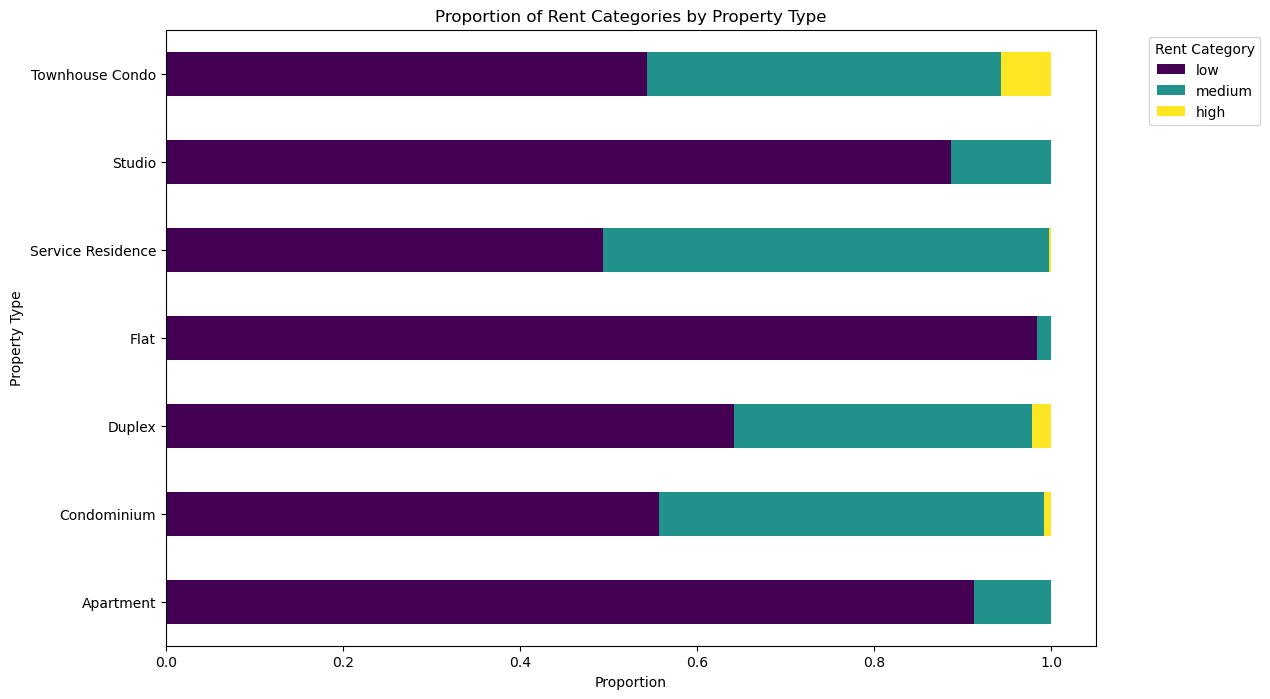

In [80]:
# Plot the cross-tabulation
cross_tab.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding plot labels and title
plt.ylabel('Property Type')
plt.xlabel('Proportion')
plt.title('Proportion of Rent Categories by Property Type')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Distribution of furnished

In [81]:
rental2["furnished"].value_counts()

furnished
Fully Furnished        8467
Partially Furnished    8004
Not Furnished          3520
Name: count, dtype: int64

In [82]:
cross_tab2 = pd.crosstab(rental2['furnished'], rental2['rent_category'], normalize='index')
print(cross_tab2)

rent_category             low    medium      high
furnished                                        
Fully Furnished      0.408055  0.583560  0.008385
Not Furnished        0.951420  0.048295  0.000284
Partially Furnished  0.773988  0.223763  0.002249


### furnished vs rent_category (stacked bar plot)

rent_category             low    medium      high
furnished                                        
Fully Furnished      0.408055  0.583560  0.008385
Not Furnished        0.951420  0.048295  0.000284
Partially Furnished  0.773988  0.223763  0.002249


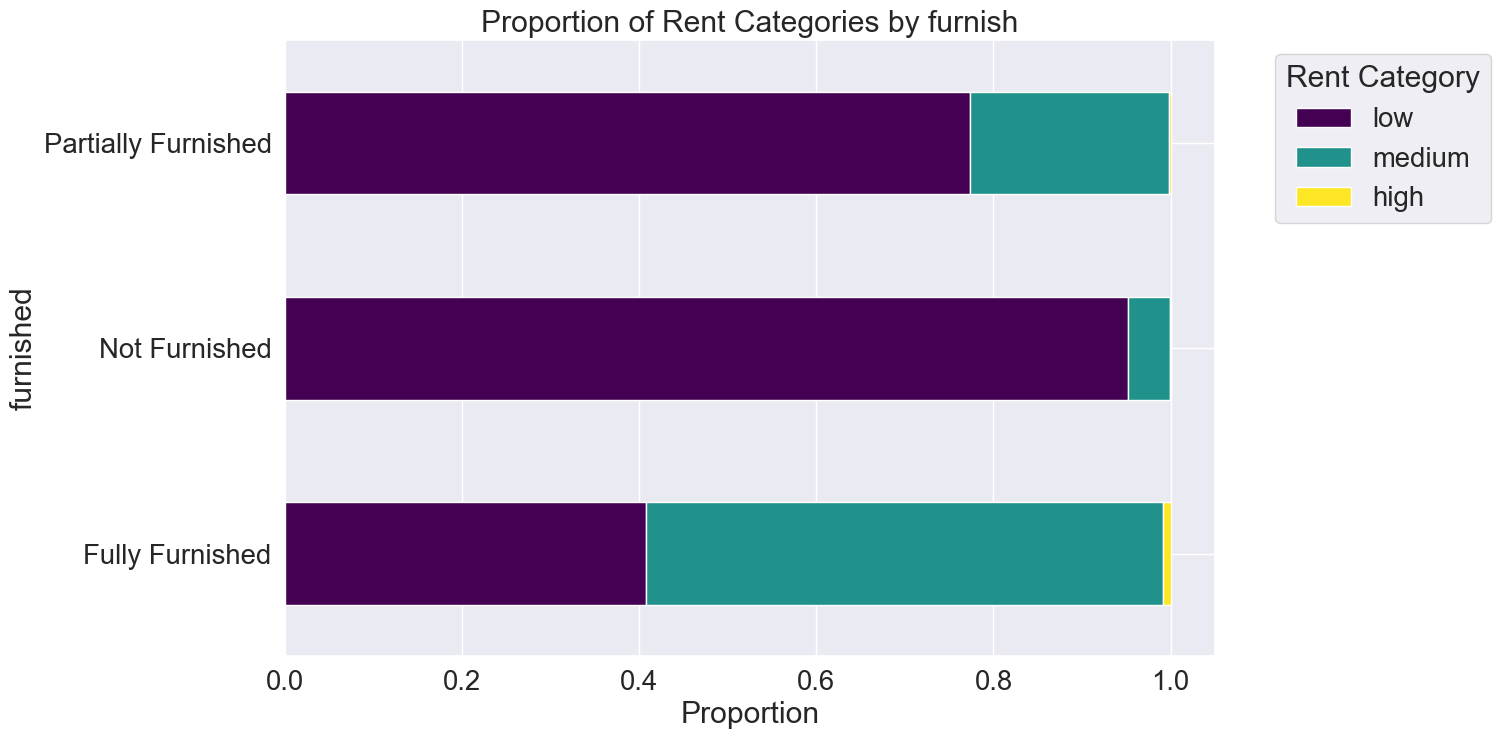

In [530]:
# Plot the cross-tabulation
cross_tab2.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')
print(cross_tab2)

# Adding plot labels and title
plt.ylabel('furnished')
plt.xlabel('Proportion')
plt.title('Proportion of Rent Categories by furnish')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Distribution of size

In [100]:
rental2["size_bins"].value_counts()

size_bins
501-850      6439
851-1000     5712
1001-1250    4617
1251-1500    1357
251-500      1026
1501-1850     460
0-250         131
2001-2250      65
1851-2000      47
2251-2500      34
Name: count, dtype: int64

### size_bins vs rent_category (bar plot)

C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\3062105533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rent_category', y='size_bins', data=rental2, palette='viridis')


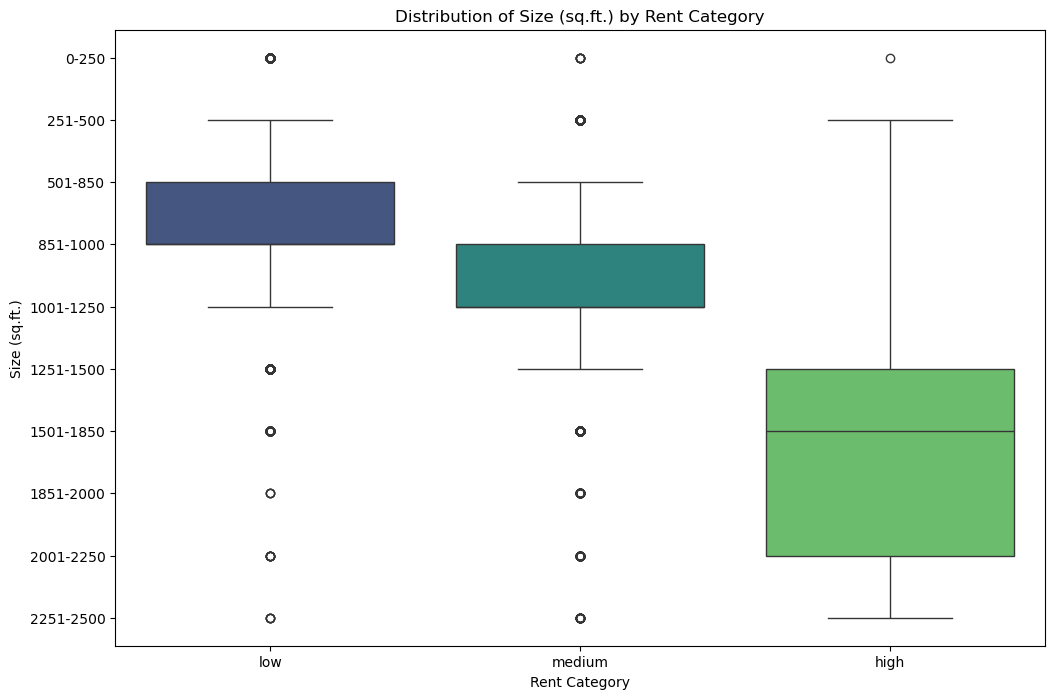

In [101]:
# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='rent_category', y='size_bins', data=rental2, palette='viridis')

# Adding plot labels and title
plt.xlabel('Rent Category')
plt.ylabel('Size (sq.ft.)')
plt.title('Distribution of Size (sq.ft.) by Rent Category')
plt.show()

### Distribution of Location

                                 location  count
0                   Kuala Lumpur - Cheras   1623
1                       Selangor - Kajang   1022
2                  Kuala Lumpur - Setapak    973
3                    Selangor - Shah Alam    971
4                    Selangor - Cyberjaya    879
..                                    ...    ...
129                         Selangor - 43      1
130                         Selangor - 77      1
131           Kuala Lumpur - Chan Sow Lin      1
132  Selangor - Pulau Indah (Pulau Lumut)      1
133               Selangor - Puncak Jalil      1

[134 rows x 2 columns]


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\3972114413.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='count', y='location', palette='viridis')


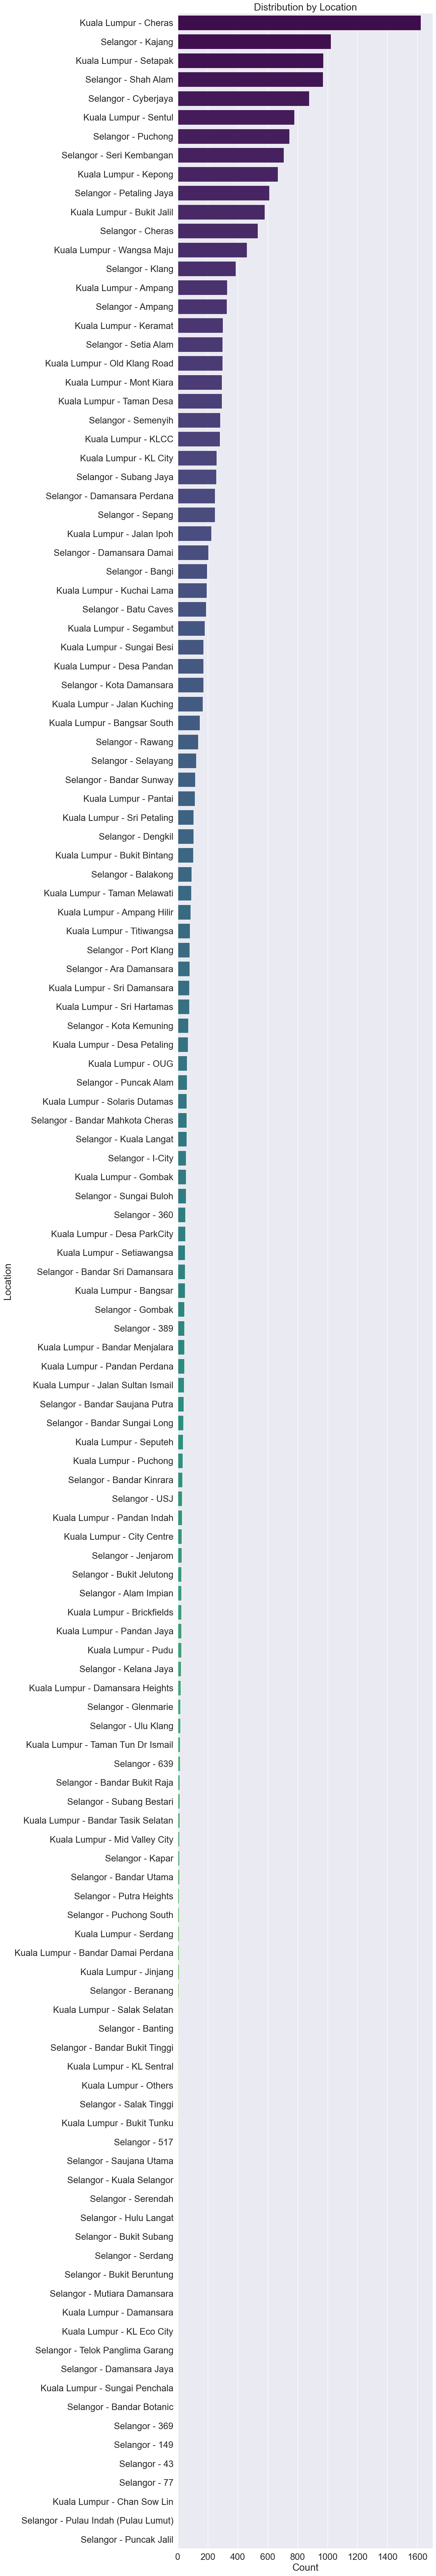

In [563]:
# Count occurrences of each location
location_counts = rental2['location'].value_counts().reset_index()
location_counts.columns = ['location', 'count']
print(location_counts)

# Plot the bar chart
plt.figure(figsize=(10, 100))
sns.barplot(data=location_counts, x='count', y='location', palette='viridis')
plt.title('Distribution by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

### 2. Categorical vs Numerical Variables

Under this section, counts is used to see the total numbers of the variable in terms of type/rent_category.

Proportion is used to see the composition of data within a category.

Mean is used to see the possibility of trend between variables and the rent_category. 

### Distribution of rooms

In [84]:
rental2["rooms"].value_counts()

rooms
3               12786
2                3294
1                2394
4                1389
5                  92
6                  23
7                   8
More than 10        2
9                   2
10                  1
Name: count, dtype: int64

In [85]:
# Rooms to replace
types_to_replace1 = ['More than 10']

# Property types to choose from
replacement_types1 = ['1', '2', '3', '4']

# Function to replace specific types with random selection from replacement types
def replace_with_random_type(rooms):
    if rooms in types_to_replace1:
        return np.random.choice(replacement_types1)
    return rooms

# Apply the function to the property_type column
rental2['rooms'] = rental2['rooms'].apply(replace_with_random_type)

print(rental2)

       completion_year        monthly_rent                         location  \
0               2022.0  RM 4 200 per month        Kuala Lumpur - Taman Desa   
1               2021.0  RM 2 300 per month            Kuala Lumpur - Cheras   
2               2021.0  RM 1 000 per month        Kuala Lumpur - Taman Desa   
3               2020.0  RM 1 700 per month            Kuala Lumpur - Sentul   
4               2021.0  RM 1 299 per month        Kuala Lumpur - Mont Kiara   
...                ...                 ...                              ...   
19986           2021.0  RM 1 200 per month                Selangor - Kajang   
19987           2018.0  RM 1 300 per month  Selangor - Bandar Saujana Putra   
19988           2021.0  RM 1 350 per month                Selangor - Kajang   
19989           2021.0  RM 1 200 per month             Selangor - Cyberjaya   
19990           2016.0  RM 1 000 per month             Selangor - Cyberjaya   

           property_type rooms  parking  bathroom  

In [86]:
rental2["rooms"].value_counts()

rooms
3     12786
2      3294
1      2394
4      1391
5        92
6        23
7         8
9         2
10        1
Name: count, dtype: int64

There are 10 rooms in total, but for a high-rise property with more than 6 rooms can be quite non-sense. So, cells with more than 6 rooms were replaced from randomly selected values (1,2,3,4,5,6).

Why at least 6 rooms? Because the maximum number of rooms we have seen so far usually is 4 rooms, same goes to bathroom. However, owner can renovate their own unit by partitioning the living room into 1 or 2 rooms.


In [87]:
# Convert the 'rooms' column to integers
rental2['rooms'] = rental2['rooms'].astype(int)

In [88]:
# Define the function to replace the values
def replace_large_room_counts(df, column, max_rooms, replace_range):
    # Find indices of the rows with large room counts
    large_room_indices = df[df[column] > max_rooms].index
    # Replace the values with random integers within the specified range
    df.loc[large_room_indices, column] = np.random.choice(replace_range, size=len(large_room_indices))
    return df

# Replace the values for rooms with 7 or more with a random value between 1 and 6
rental2 = replace_large_room_counts(rental2, 'rooms', 6, range(1, 7))

# Check the replacement
print(rental2['rooms'].value_counts())

rooms
3    12788
2     3294
1     2396
4     1393
5       94
6       26
Name: count, dtype: int64


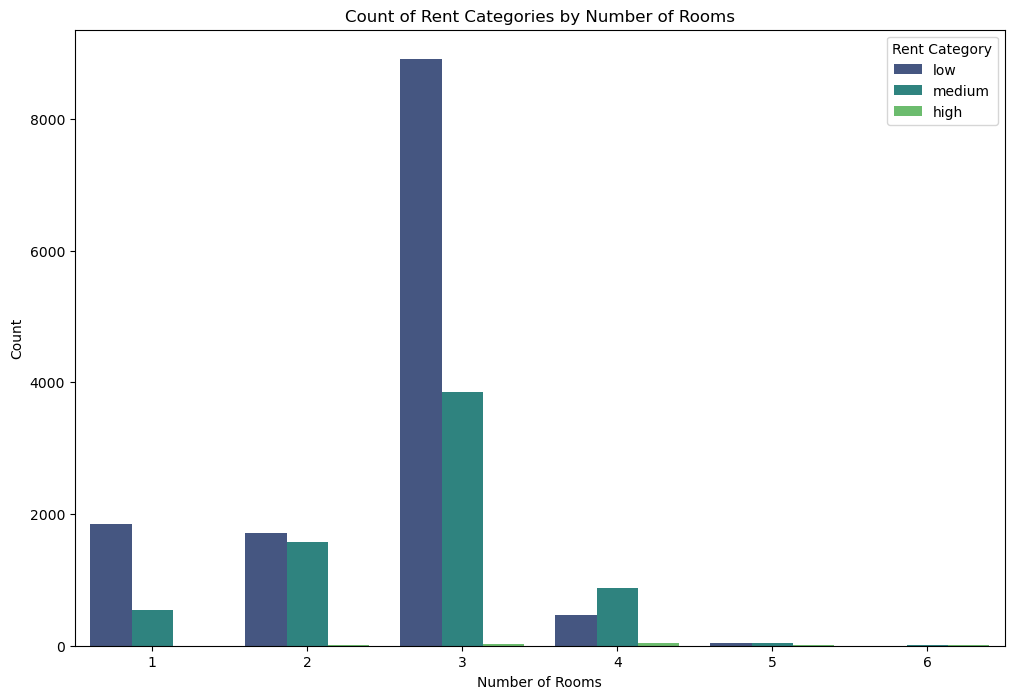

In [89]:
# Grouped bar chart
plt.figure(figsize=(12, 8))
sns.countplot(data=rental2, x='rooms', hue='rent_category', palette='viridis')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.title('Count of Rent Categories by Number of Rooms')
plt.legend(title='Rent Category')
plt.show()

rent_category       low    medium      high
rooms                                      
1              0.771285  0.227880  0.000835
2              0.521858  0.476321  0.001821
3              0.696669  0.301689  0.001642
4              0.339555  0.629576  0.030869
5              0.500000  0.372340  0.127660
6              0.115385  0.653846  0.230769


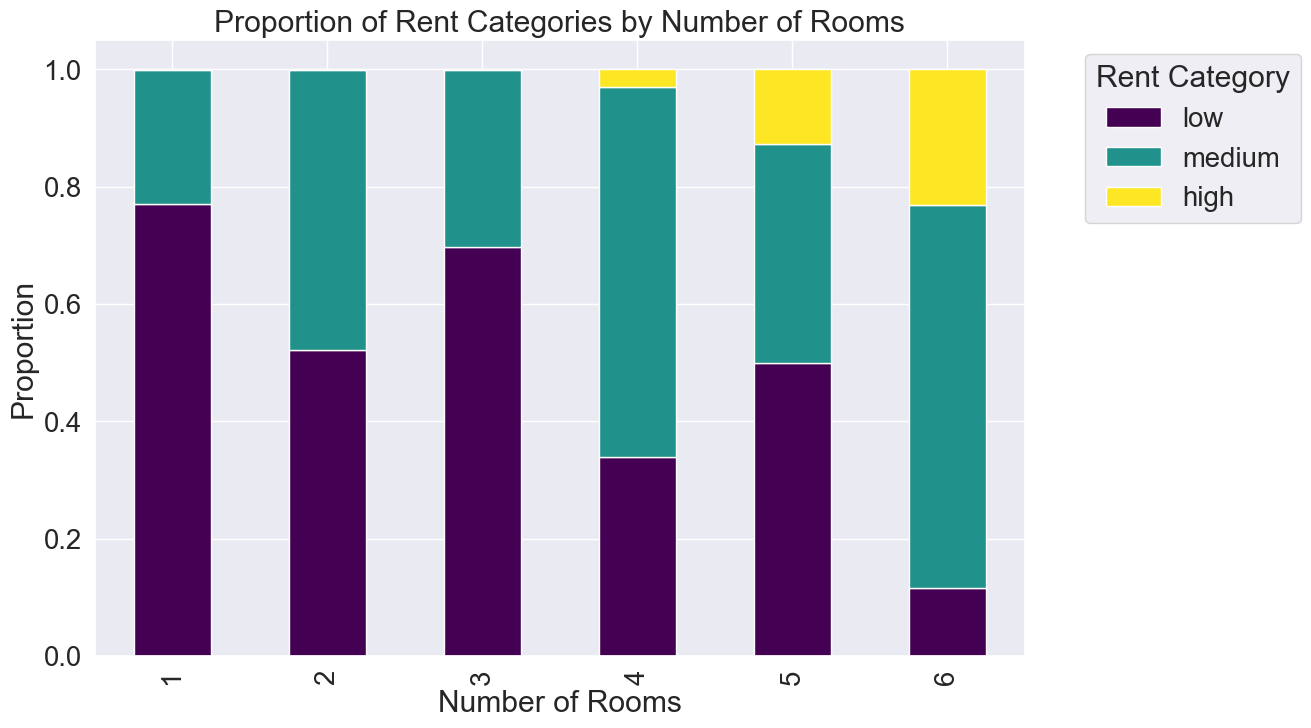

In [531]:
# Create the crosstab with proportions
cross_tab3 = pd.crosstab(rental2['rooms'], rental2['rent_category'], normalize='index')
print(cross_tab3)

# Plot the crosstab as a bar chart
cross_tab3.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding plot labels and title
plt.xlabel('Number of Rooms')
plt.ylabel('Proportion')
plt.title('Proportion of Rent Categories by Number of Rooms')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [528]:
# Calculate the average number of rooms within each rent category
trend_data = rental2.groupby('rent_category')['rooms'].mean()
print(trend_data)


rent_category
low       2.627741
medium    2.759055
high      3.833333
Name: rooms, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\2152640423.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data = rental2.groupby('rent_category')['rooms'].mean()


### Distribution of number of parking

In [92]:
rental2["parking"].value_counts()

parking
1.0     14346
2.0      5427
3.0       179
4.0        23
10.0        6
5.0         6
6.0         2
9.0         1
7.0         1
Name: count, dtype: int64

There are total of 10 parking, but for a high-rise property each unit will be allocated minimum of 1 or 2 car parks. But for bigger units may have more allocated car parks, usually 3 or 4 car parks. So, cells with more than 4 car parks were replaced from randomly selected values (1,2,3,4).

In [93]:
# Define the function to replace the values
def replace_large_parking_counts(df, column, max_parking, replace_range):
    # Find indices of the rows with large parking counts
    large_parking_indices = df[df[column] > max_parking].index
    # Replace the values with random integers within the specified range
    df.loc[large_parking_indices, column] = np.random.choice(replace_range, size=len(large_parking_indices))
    return df

# Replace the values for parking with 5 or more with a random value between 1 and 4
rental2 = replace_large_parking_counts(rental2, 'parking', 4, range(1, 5))

# Check the replacement
print(rental2['parking'].value_counts())

parking
1.0    14348
2.0     5433
3.0      184
4.0       26
Name: count, dtype: int64


### number of parking vs rent_category  (bar plot)

rent_category           low    medium      high
property_type                                  
Apartment          0.912780  0.087031  0.000190
Condominium        0.556461  0.435507  0.008032
Duplex             0.641304  0.336957  0.021739
Flat               0.983333  0.016667  0.000000
Service Residence  0.493516  0.503289  0.003195
Studio             0.886700  0.113300  0.000000
Townhouse Condo    0.542857  0.400000  0.057143


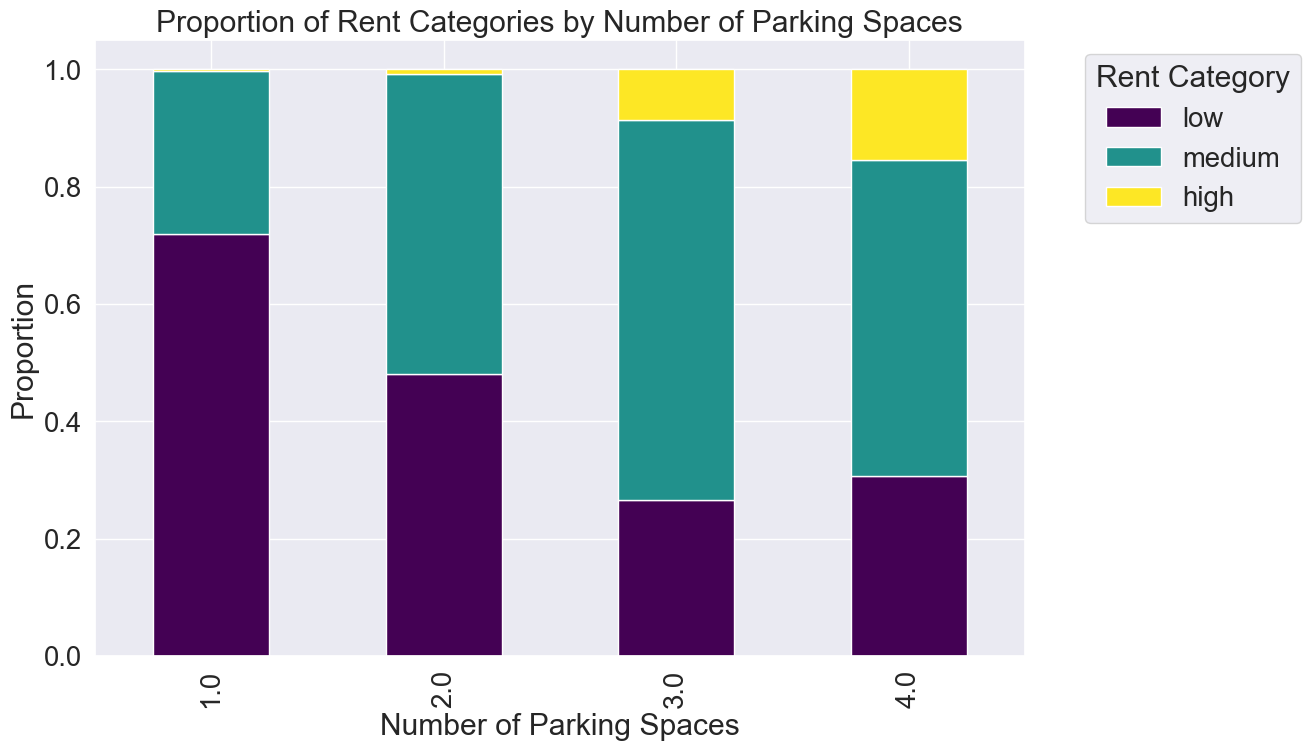

In [529]:
# Create crosstab
cross_tab4 = pd.crosstab(rental2['parking'], rental2['rent_category'], normalize='index')
print(cross_tab)

# Plot the crosstab
cross_tab4.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding plot labels and title
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Proportion')
plt.title('Proportion of Rent Categories by Number of Parking Spaces')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [527]:
# Calculate the average number of rooms within each rent category
trend_data2 = rental2.groupby('rent_category')['parking'].mean()
print(trend_data2)


rent_category
low       1.210324
medium    1.442915
high      1.977778
Name: parking, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\3217567128.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data2 = rental2.groupby('rent_category')['parking'].mean()


### Distribution of bathroom

In [96]:
rental2["bathroom"].value_counts()

bathroom
2.0    14893
1.0     3800
3.0     1065
4.0      160
5.0       54
6.0        9
7.0        7
8.0        3
Name: count, dtype: int64

There are 8 bathrooms in total, but for a high-rise property with more than 4 bathrooms can be quite non-sense. So, cells with more than 4 bathrooms were replaced from randomly selected values (1,2,3,4).

Why 4 bathrooms? The maximum number of bathrooms usually is 4.


In [97]:
# Define the function to replace the values
def replace_large_bathroom_counts(df, column, max_bathroom, replace_range):
    # Find indices of the rows with large bathroom counts
    large_bathroom_indices = df[df[column] > max_bathroom].index
    # Replace the values with random integers within the specified range
    df.loc[large_bathroom_indices, column] = np.random.choice(replace_range, size=len(large_bathroom_indices))
    return df

# Replace the values for parking with 5 or more with a random value between 1 and 4
rental2 = replace_large_bathroom_counts(rental2, 'bathroom', 4, range(1, 5))

# Check the replacement
print(rental2['bathroom'].value_counts())

bathroom
2.0    14914
1.0     3814
3.0     1089
4.0      174
Name: count, dtype: int64


### bathroom vs rent_category (bar plot)

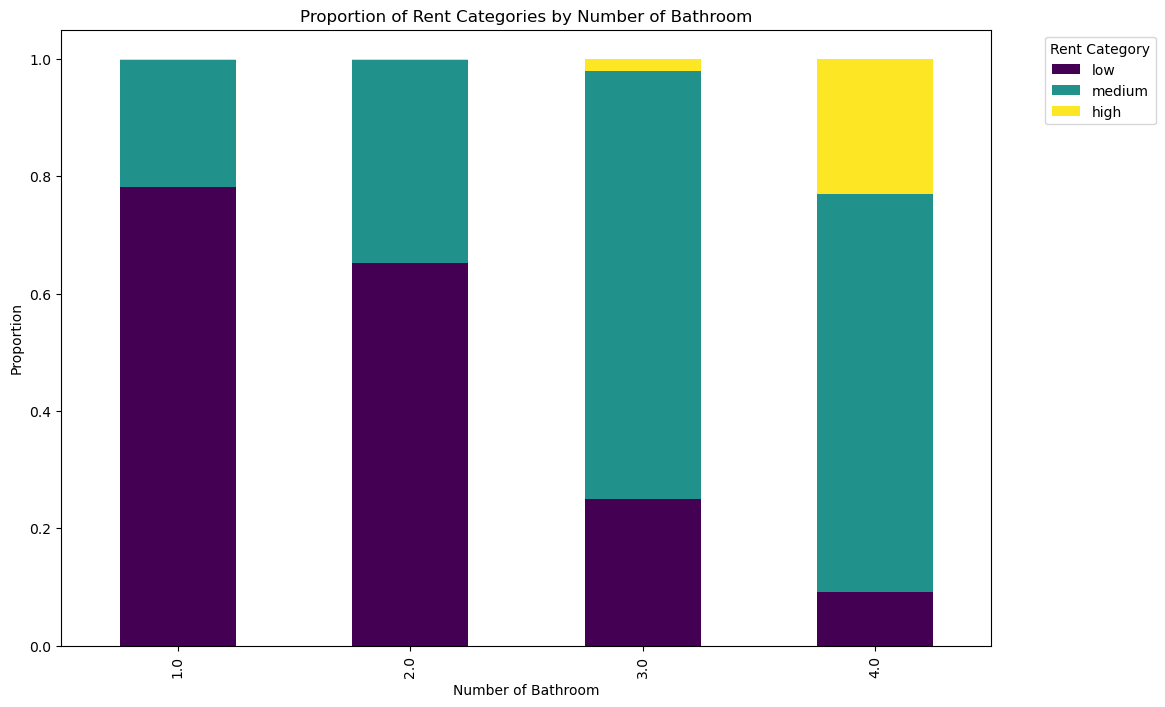

In [98]:
# Create crosstab
cross_tab5 = pd.crosstab(rental2['bathroom'], rental2['rent_category'], normalize='index')

# Plot the crosstab
cross_tab5.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding plot labels and title
plt.xlabel('Number of Bathroom')
plt.ylabel('Proportion')
plt.title('Proportion of Rent Categories by Number of Bathroom')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [526]:
# Calculate the average number of rooms within each rent category
trend_data3 = rental2.groupby('rent_category')['bathroom'].mean()
print(trend_data3)

rent_category
low       1.793907
medium    2.029557
high      3.088889
Name: bathroom, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\2289872384.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data3 = rental2.groupby('rent_category')['bathroom'].mean()


### Barbeque area vs rent_category  (bar plot)

In [103]:
# Create a contingency table
contingency_table2 = pd.crosstab(rental2['Barbeque area'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table2['Total'] = contingency_table2.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table2.loc['Total'] = contingency_table2.sum(axis=0)

# Display the contingency table
print(contingency_table2)

rent_category    low  medium  high  Total
Barbeque area                            
0               6676    2332    32   9040
1               6323    4570    58  10951
Total          12999    6902    90  19991


rent_category       low    medium      high
Barbeque area                              
0              0.738496  0.257965  0.003540
1              0.577390  0.417313  0.005296


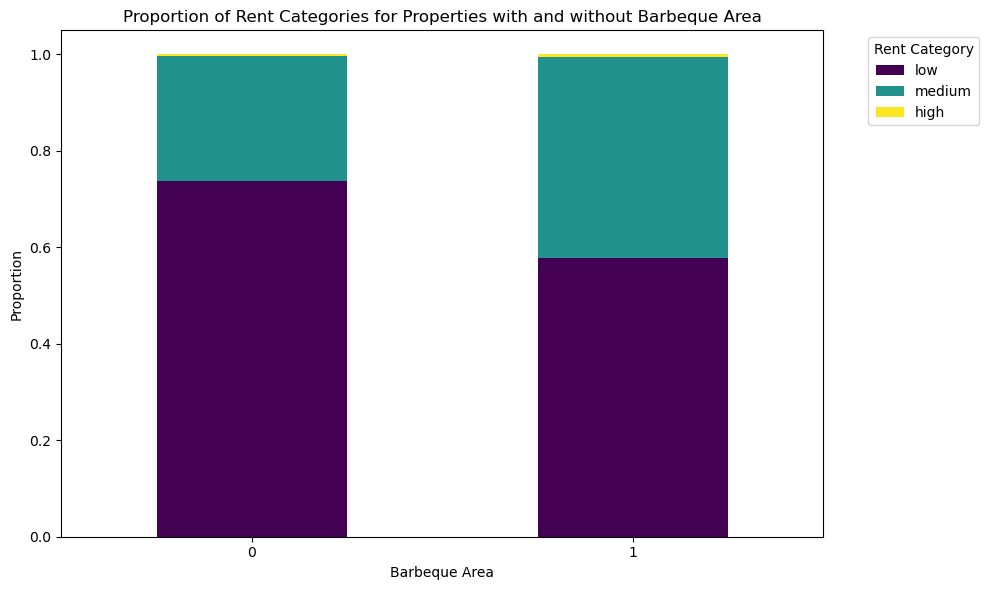

In [104]:
# Create a crosstab of the Barbeque area and rent_category
crosstab1 = pd.crosstab(rental2['Barbeque area'], rental2['rent_category'], normalize='index')

print(crosstab1)

# Plot the stacked bar plot
crosstab1.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Barbeque Area')
plt.xlabel('Barbeque Area')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [532]:
# Calculate mean for each category
mean_binary_by_category1 = rental2.groupby('rent_category')['Barbeque area'].mean()
print(mean_binary_by_category1)

rent_category
low       0.486422
medium    0.662127
high      0.644444
Name: Barbeque area, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\3239375507.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category1 = rental2.groupby('rent_category')['Barbeque area'].mean()


### Club house vs rent_category (bar plot)

In [107]:
# Create a contingency table
contingency_table3 = pd.crosstab(rental2['Club house'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table3['Total'] = contingency_table3.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table3.loc['Total'] = contingency_table3.sum(axis=0)

# Display the contingency table
print(contingency_table3)

rent_category    low  medium  high  Total
Club house                               
0               9514    4580    51  14145
1               3485    2322    39   5846
Total          12999    6902    90  19991


rent_category       low    medium      high
Club house                                 
0              0.672605  0.323789  0.003606
1              0.596134  0.397195  0.006671


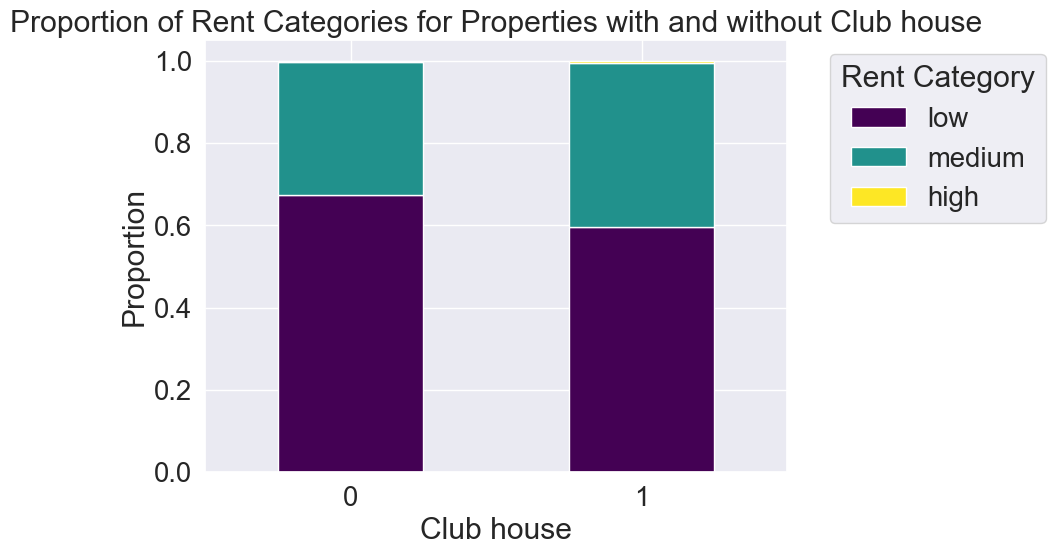

In [408]:
# Create a crosstab of the Barbeque area and rent_category
crosstab2 = pd.crosstab(rental2['Club house'], rental2['rent_category'], normalize='index')

print(crosstab2)

# Plot the stacked bar plot
crosstab2.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Club house')
plt.xlabel('Club house')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [533]:
# Calculate mean for each category
mean_binary_by_category2 = rental2.groupby('rent_category')['Club house'].mean()
print(mean_binary_by_category2)

rent_category
low       0.268098
medium    0.336424
high      0.433333
Name: Club house, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\1500776218.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category2 = rental2.groupby('rent_category')['Club house'].mean()


### Gymnasium vs rent_category  (bar plot)

In [111]:
# Create a contingency table
contingency_table4 = pd.crosstab(rental2['Gymnasium'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table4['Total'] = contingency_table4.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table4.loc['Total'] = contingency_table4.sum(axis=0)

# Display the contingency table
print(contingency_table4)

rent_category    low  medium  high  Total
Gymnasium                                
0               4623     723     9   5355
1               8376    6179    81  14636
Total          12999    6902    90  19991


rent_category       low    medium      high
Gymnasium                                  
0              0.863305  0.135014  0.001681
1              0.572288  0.422178  0.005534


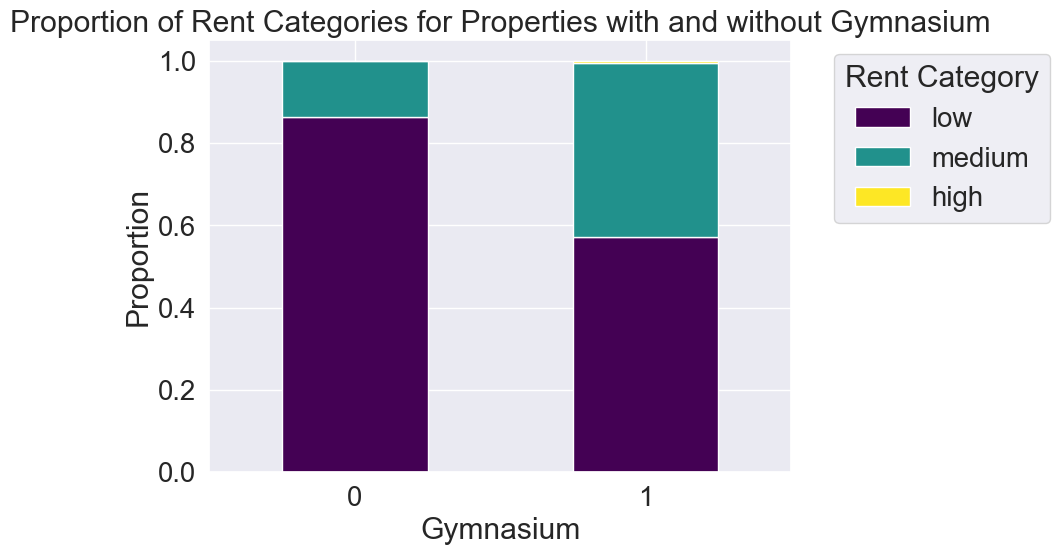

In [409]:
# Create a crosstab of the Barbeque area and rent_category
crosstab3 = pd.crosstab(rental2['Gymnasium'], rental2['rent_category'], normalize='index')

print(crosstab3)

# Plot the stacked bar plot
crosstab3.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Gymnasium')
plt.xlabel('Gymnasium')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [534]:
# Calculate mean for each category
mean_binary_by_category3 = rental2.groupby('rent_category')['Gymnasium'].mean()
print(mean_binary_by_category3)

rent_category
low       0.644357
medium    0.895248
high      0.900000
Name: Gymnasium, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\3740498739.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category3 = rental2.groupby('rent_category')['Gymnasium'].mean()


### Jogging Track vs rent_category  (bar plot)

In [114]:
# Create a contingency table
contingency_table5 = pd.crosstab(rental2['Jogging Track'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table5['Total'] = contingency_table5.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table5.loc['Total'] = contingency_table5.sum(axis=0)

# Display the contingency table
print(contingency_table5)

rent_category    low  medium  high  Total
Jogging Track                            
0               6369    2953    44   9366
1               6630    3949    46  10625
Total          12999    6902    90  19991


rent_category       low    medium      high
Jogging Track                              
0              0.680013  0.315289  0.004698
1              0.624000  0.371671  0.004329


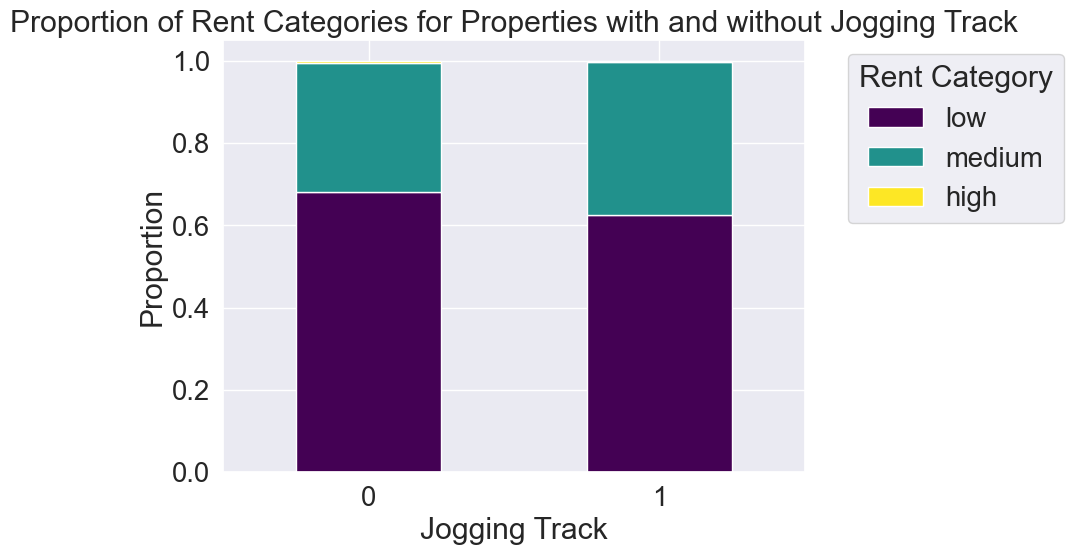

In [410]:
# Create a crosstab of the Barbeque area and rent_category
crosstab4 = pd.crosstab(rental2['Jogging Track'], rental2['rent_category'], normalize='index')

print(crosstab4)

# Plot the stacked bar plot
crosstab4.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Jogging Track')
plt.xlabel('Jogging Track')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [535]:
# Calculate mean for each category
mean_binary_by_category4 = rental2.groupby('rent_category')['Jogging Track'].mean()
print(mean_binary_by_category4)

rent_category
low       0.510039
medium    0.572153
high      0.511111
Name: Jogging Track, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\3170292671.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category4 = rental2.groupby('rent_category')['Jogging Track'].mean()


### Lift vs rent_category  (bar plot)

In [117]:
# Create a contingency table
contingency_table6 = pd.crosstab(rental2['Lift'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table6['Total'] = contingency_table6.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table6.loc['Total'] = contingency_table6.sum(axis=0)

# Display the contingency table
print(contingency_table6)

rent_category    low  medium  high  Total
Lift                                     
0               4230    1883    27   6140
1               8769    5019    63  13851
Total          12999    6902    90  19991


rent_category       low    medium      high
Jogging Track                              
0              0.680013  0.315289  0.004698
1              0.624000  0.371671  0.004329


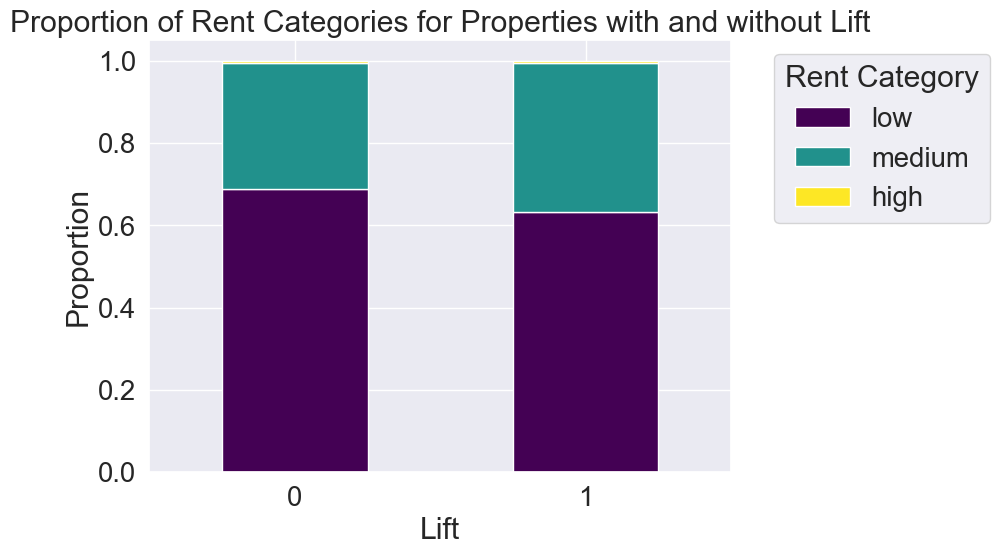

In [411]:
# Create a crosstab of the Barbeque area and rent_category
crosstab5 = pd.crosstab(rental2['Lift'], rental2['rent_category'], normalize='index')

print(crosstab4)

# Plot the stacked bar plot
crosstab5.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Lift')
plt.xlabel('Lift')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [536]:
# Calculate mean for each category
mean_binary_by_category5 = rental2.groupby('rent_category')['Lift'].mean()
print(mean_binary_by_category5)

rent_category
low       0.674590
medium    0.727181
high      0.700000
Name: Lift, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\3968857090.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category5 = rental2.groupby('rent_category')['Lift'].mean()


### Minimart vs rent_category  (bar plot)

In [412]:
# Create a contingency table
contingency_table7 = pd.crosstab(rental2['Minimart'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table7['Total'] = contingency_table7.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table7.loc['Total'] = contingency_table7.sum(axis=0)

# Display the contingency table
print(contingency_table7)

rent_category    low  medium  high  Total
Minimart                                 
0               4759    2713    47   7519
1               8240    4189    43  12472
Total          12999    6902    90  19991


rent_category      low    medium      high
Minimart                                  
0              0.63293  0.360819  0.006251
1              0.66068  0.335872  0.003448


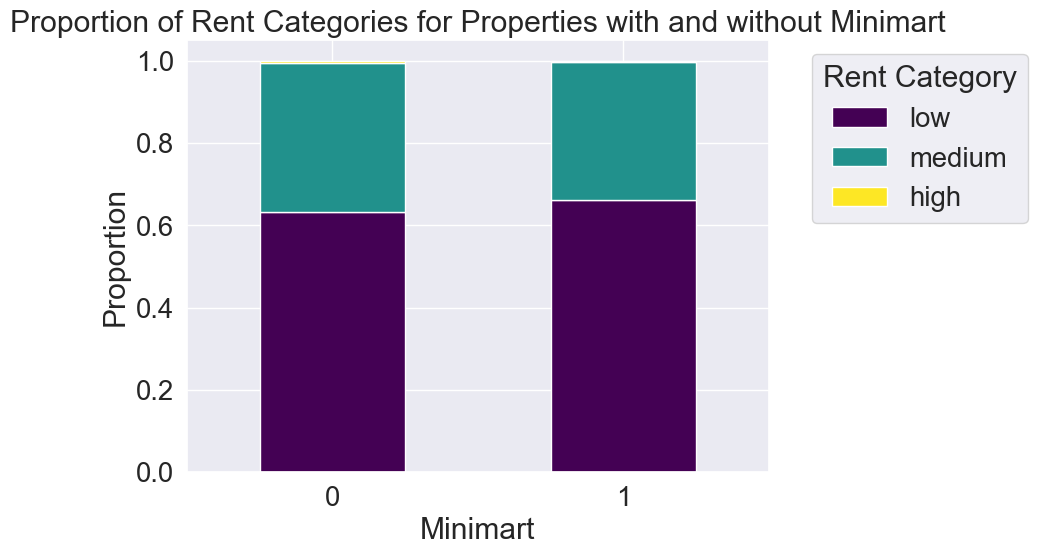

In [537]:
# Create a crosstab of the Barbeque area and rent_category
crosstab6 = pd.crosstab(rental2['Minimart'], rental2['rent_category'], normalize='index')

print(crosstab6)

# Plot the stacked bar plot
crosstab6.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Minimart')
plt.xlabel('Minimart')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [538]:
# Calculate mean for each category
mean_binary_by_category6 = rental2.groupby('rent_category')['Minimart'].mean()
print(mean_binary_by_category6)

rent_category
low       0.633895
medium    0.606926
high      0.477778
Name: Minimart, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\775957496.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category6 = rental2.groupby('rent_category')['Minimart'].mean()


### Multipurpose hall vs rent_category  (bar plot)

In [413]:
# Create a contingency table
contingency_table8 = pd.crosstab(rental2['Multipurpose hall'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table8['Total'] = contingency_table8.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table8.loc['Total'] = contingency_table8.sum(axis=0)

# Display the contingency table
print(contingency_table8)

rent_category        low  medium  high  Total
Multipurpose hall                            
0                   6588    2866    42   9496
1                   6411    4036    48  10495
Total              12999    6902    90  19991


rent_category           low    medium      high
Multipurpose hall                              
0                  0.693766  0.301811  0.004423
1                  0.610862  0.384564  0.004574


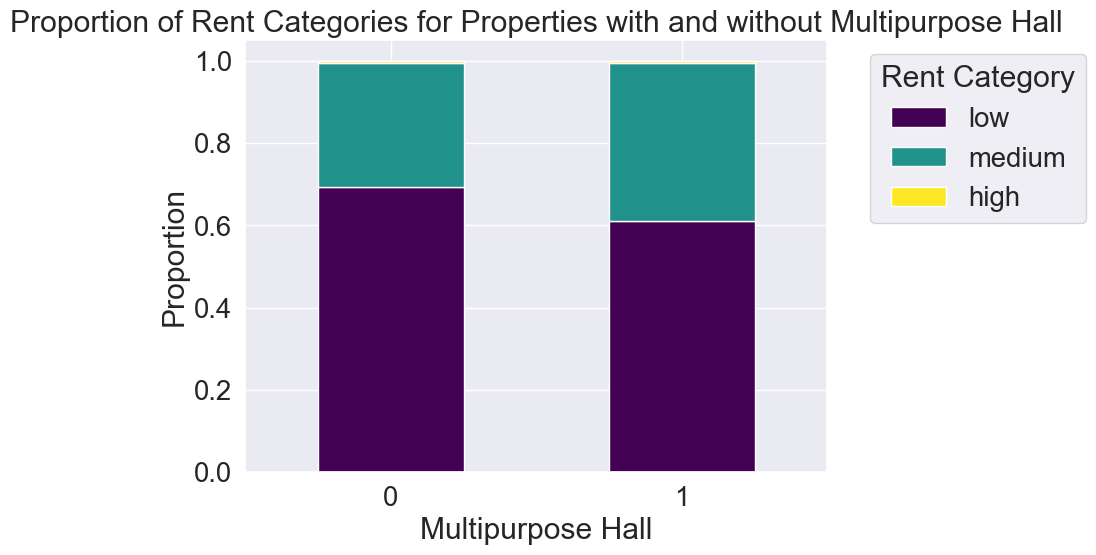

In [415]:
# Create a crosstab of the Barbeque area and rent_category
crosstab7 = pd.crosstab(rental2['Multipurpose hall'], rental2['rent_category'], normalize='index')

print(crosstab7)

# Plot the stacked bar plot
crosstab7.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Multipurpose Hall')
plt.xlabel('Multipurpose Hall')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [540]:
# Calculate mean for each category
mean_binary_by_category7 = rental2.groupby('rent_category')['Multipurpose hall'].mean()
print(mean_binary_by_category7)

rent_category
low       0.493192
medium    0.584758
high      0.533333
Name: Multipurpose hall, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\3538792156.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category7 = rental2.groupby('rent_category')['Multipurpose hall'].mean()


### Parking vs rent_category (bar plot)

In [416]:
# Create a contingency table
contingency_table9 = pd.crosstab(rental2['Parking'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table9['Total'] = contingency_table9.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table9.loc['Total'] = contingency_table9.sum(axis=0)

# Display the contingency table
print(contingency_table9)

rent_category    low  medium  high  Total
Parking                                  
0               1136     552    12   1700
1              11863    6350    78  18291
Total          12999    6902    90  19991


rent_category       low    medium      high
Parking                                    
0              0.668235  0.324706  0.007059
1              0.648570  0.347165  0.004264


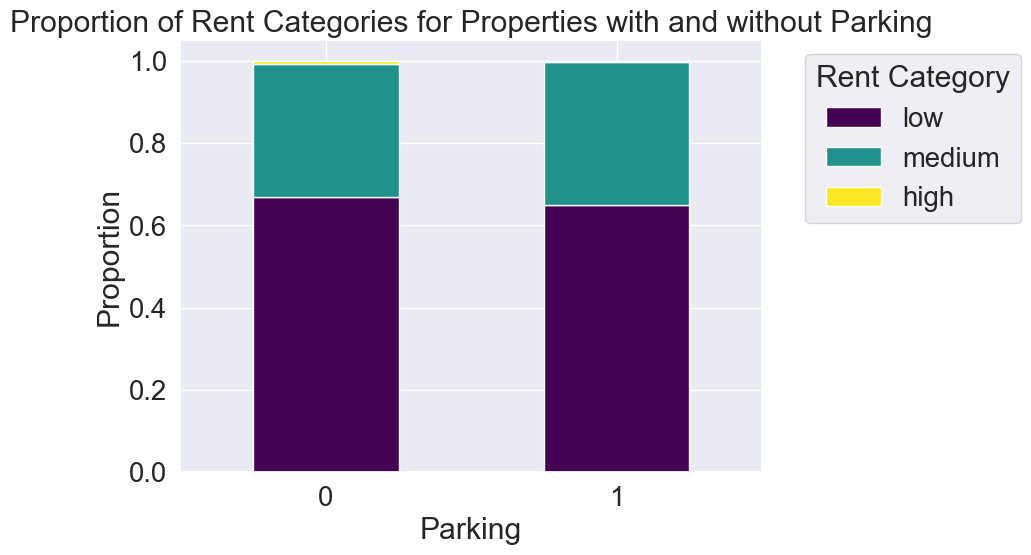

In [417]:
# Create a crosstab of the Barbeque area and rent_category
crosstab8 = pd.crosstab(rental2['Parking'], rental2['rent_category'], normalize='index')

print(crosstab8)

# Plot the stacked bar plot
crosstab8.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Parking')
plt.xlabel('Parking')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [541]:
# Calculate mean for each category
mean_binary_by_category8 = rental2.groupby('rent_category')['Parking'].mean()
print(mean_binary_by_category8)

rent_category
low       0.912609
medium    0.920023
high      0.866667
Name: Parking, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\1831545032.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category8 = rental2.groupby('rent_category')['Parking'].mean()


### Playground vs rent_category  (bar plot)

In [418]:
# Create a contingency table
contingency_table10 = pd.crosstab(rental2['Playground'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table10['Total'] = contingency_table10.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table10.loc['Total'] = contingency_table10.sum(axis=0)

# Display the contingency table
print(contingency_table10)

rent_category    low  medium  high  Total
Playground                               
0               1981     633    11   2625
1              11018    6269    79  17366
Total          12999    6902    90  19991


rent_category       low    medium      high
Playground                                 
0              0.754667  0.241143  0.004190
1              0.634458  0.360993  0.004549


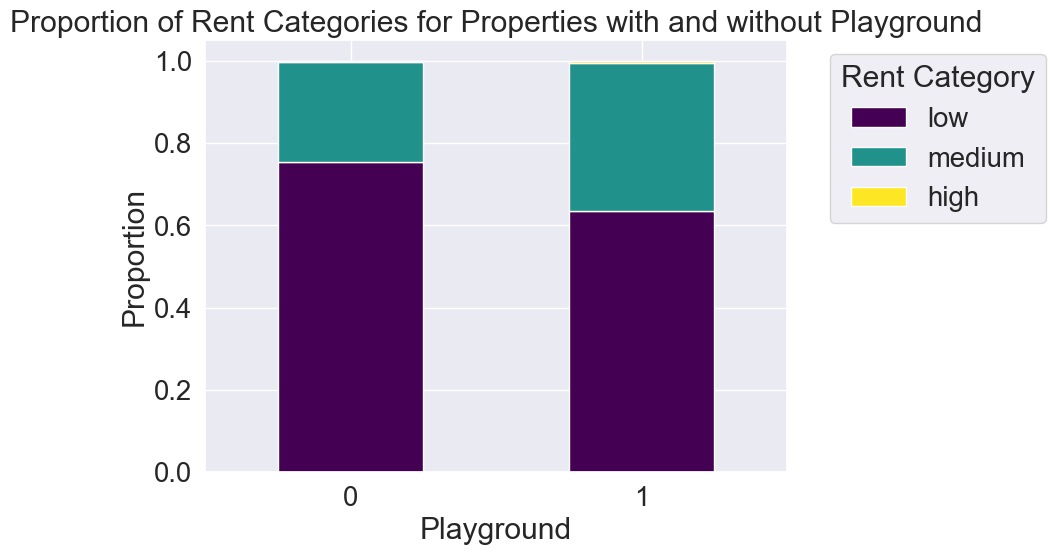

In [419]:
# Create a crosstab of the Barbeque area and rent_category
crosstab9 = pd.crosstab(rental2['Playground'], rental2['rent_category'], normalize='index')

print(crosstab9)

# Plot the stacked bar plot
crosstab9.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Playground')
plt.xlabel('Playground')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [542]:
# Calculate mean for each category
mean_binary_by_category9 = rental2.groupby('rent_category')['Playground'].mean()
print(mean_binary_by_category9)

rent_category
low       0.847604
medium    0.908287
high      0.877778
Name: Playground, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\99519778.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category9 = rental2.groupby('rent_category')['Playground'].mean()


### Sauna vs rent_category (bar plot)

In [420]:
# Create a contingency table
contingency_table11 = pd.crosstab(rental2['Sauna'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table11['Total'] = contingency_table11.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table11.loc['Total'] = contingency_table11.sum(axis=0)

# Display the contingency table
print(contingency_table11)

rent_category    low  medium  high  Total
Sauna                                    
0               8136    3057    29  11222
1               4863    3845    61   8769
Total          12999    6902    90  19991


rent_category       low    medium      high
Sauna                                      
0              0.725004  0.272411  0.002584
1              0.554567  0.438476  0.006956


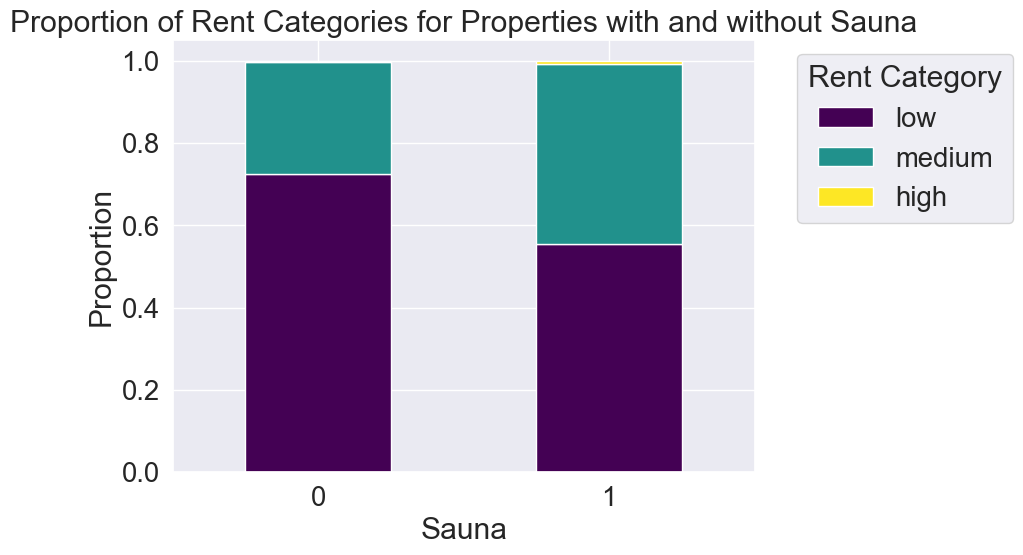

In [421]:
# Create a crosstab of the Barbeque area and rent_category
crosstab10 = pd.crosstab(rental2['Sauna'], rental2['rent_category'], normalize='index')

print(crosstab10)

# Plot the stacked bar plot
crosstab10.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Sauna')
plt.xlabel('Sauna')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [543]:
# Calculate mean for each category
mean_binary_by_category10 = rental2.groupby('rent_category')['Sauna'].mean()
print(mean_binary_by_category10)

rent_category
low       0.374106
medium    0.557085
high      0.677778
Name: Sauna, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\2235977300.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category10 = rental2.groupby('rent_category')['Sauna'].mean()


### Security vs rent_category  (bar plot)

In [422]:
# Create a contingency table
contingency_table12 = pd.crosstab(rental2['Security'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table12['Total'] = contingency_table12.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table12.loc['Total'] = contingency_table12.sum(axis=0)

# Display the contingency table
print(contingency_table12)

rent_category    low  medium  high  Total
Security                                 
0               1279     215     9   1503
1              11720    6687    81  18488
Total          12999    6902    90  19991


rent_category       low    medium      high
Security                                   
0              0.850965  0.143047  0.005988
1              0.633925  0.361694  0.004381


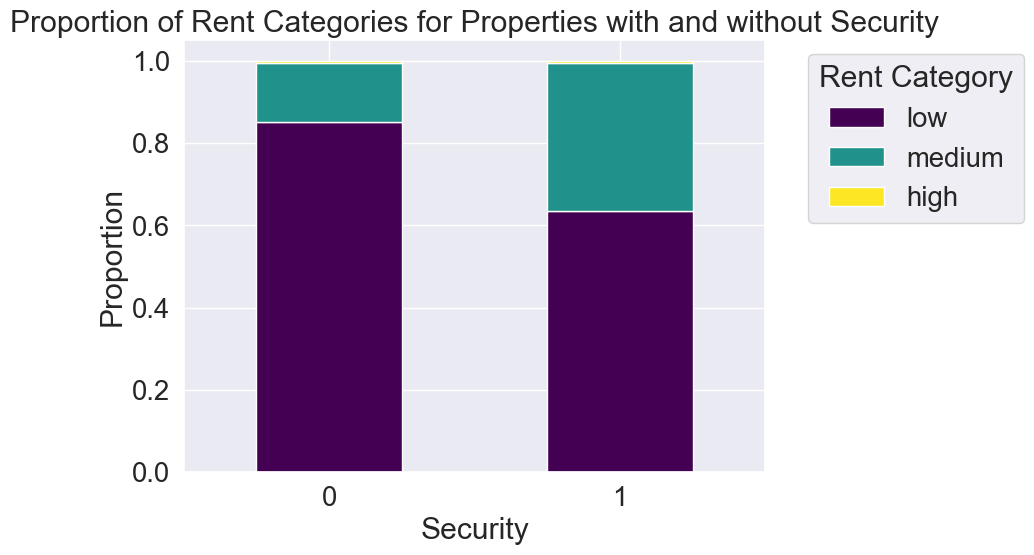

In [423]:
# Create a crosstab of the Barbeque area and rent_category
crosstab11 = pd.crosstab(rental2['Security'], rental2['rent_category'], normalize='index')

print(crosstab11)

# Plot the stacked bar plot
crosstab11.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Security')
plt.xlabel('Security')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [544]:
# Calculate mean for each category
mean_binary_by_category11 = rental2.groupby('rent_category')['Security'].mean()
print(mean_binary_by_category11)

rent_category
low       0.901608
medium    0.968850
high      0.900000
Name: Security, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\4196197673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category11 = rental2.groupby('rent_category')['Security'].mean()


### Squash Court vs rent_category (bar plot)

In [425]:
# Create a contingency table
contingency_table13 = pd.crosstab(rental2['Squash Court'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table13['Total'] = contingency_table13.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table13.loc['Total'] = contingency_table13.sum(axis=0)

# Display the contingency table
print(contingency_table13)

rent_category    low  medium  high  Total
Squash Court                             
0               9313    4365    45  13723
1               3686    2537    45   6268
Total          12999    6902    90  19991


rent_category       low    medium      high
Squash Court                               
0              0.678642  0.318079  0.003279
1              0.588066  0.404754  0.007179


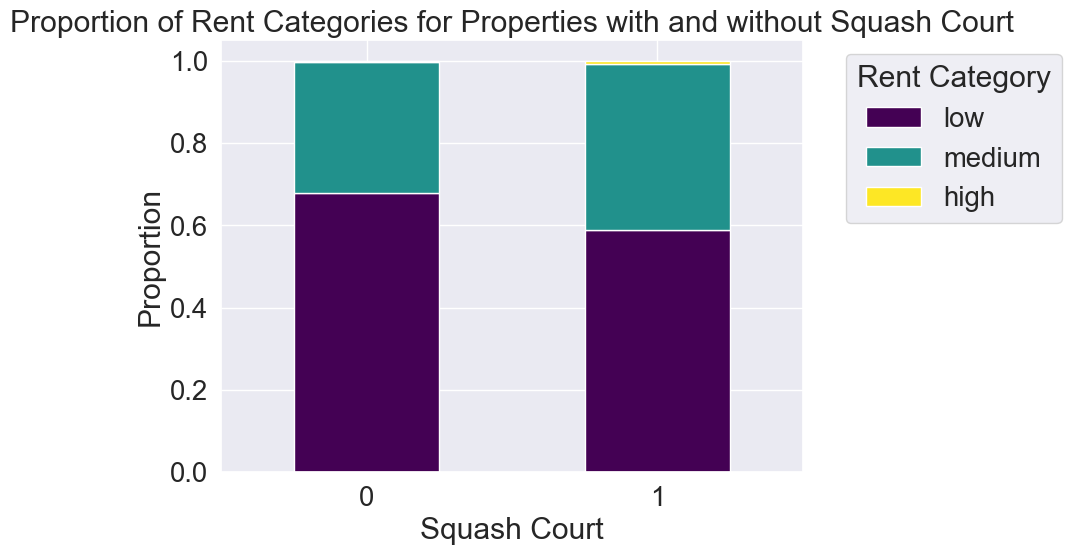

In [426]:
# Create a crosstab of the Barbeque area and rent_category
crosstab12 = pd.crosstab(rental2['Squash Court'], rental2['rent_category'], normalize='index')

print(crosstab12)

# Plot the stacked bar plot
crosstab12.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Squash Court')
plt.xlabel('Squash Court')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [545]:
# Calculate mean for each category
mean_binary_by_category12 = rental2.groupby('rent_category')['Squash Court'].mean()
print(mean_binary_by_category12)

rent_category
low       0.283560
medium    0.367575
high      0.500000
Name: Squash Court, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\2280992524.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category12 = rental2.groupby('rent_category')['Squash Court'].mean()


### Swimming Pool vs rent_category (bar plot)

In [427]:
# Create a contingency table
contingency_table14 = pd.crosstab(rental2['Swimming Pool'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table14['Total'] = contingency_table14.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table14.loc['Total'] = contingency_table14.sum(axis=0)

# Display the contingency table
print(contingency_table14)

rent_category    low  medium  high  Total
Swimming Pool                            
0               3297     387     8   3692
1               9702    6515    82  16299
Total          12999    6902    90  19991


rent_category       low    medium      high
Swimming Pool                              
0              0.893012  0.104821  0.002167
1              0.595251  0.399718  0.005031


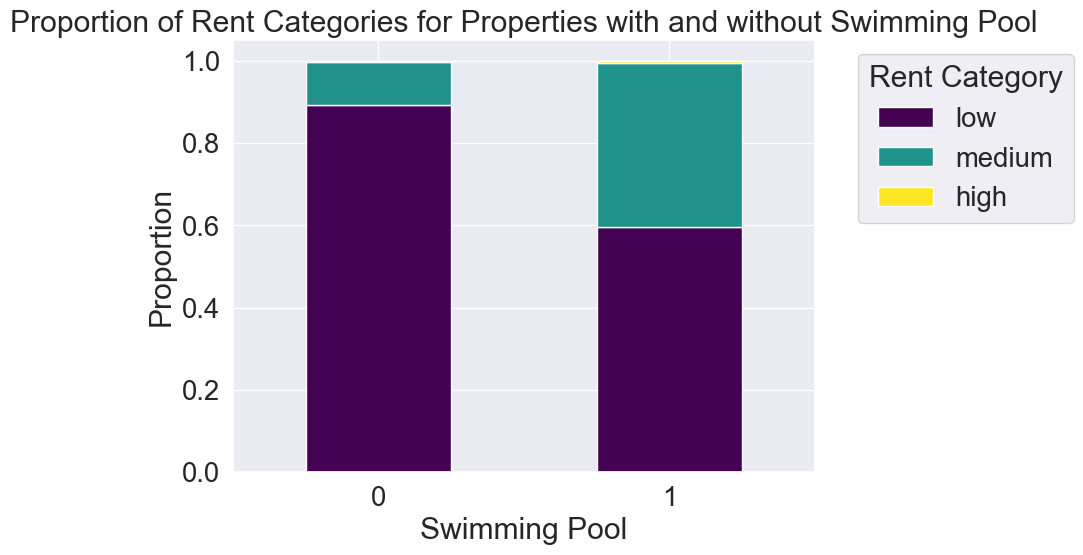

In [428]:
# Create a crosstab of the Barbeque area and rent_category
crosstab13 = pd.crosstab(rental2['Swimming Pool'], rental2['rent_category'], normalize='index')

print(crosstab13)

# Plot the stacked bar plot
crosstab13.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Swimming Pool')
plt.xlabel('Swimming Pool')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [546]:
# Calculate mean for each category
mean_binary_by_category13 = rental2.groupby('rent_category')['Swimming Pool'].mean()
print(mean_binary_by_category13)

rent_category
low       0.746365
medium    0.943929
high      0.911111
Name: Swimming Pool, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\2245169377.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category13 = rental2.groupby('rent_category')['Swimming Pool'].mean()


### Tennis Court vs rent_category  (bar plot)

In [429]:
# Create a contingency table
contingency_table15 = pd.crosstab(rental2['Tennis Court'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table15['Total'] = contingency_table15.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table15.loc['Total'] = contingency_table15.sum(axis=0)

# Display the contingency table
print(contingency_table15)

rent_category    low  medium  high  Total
Tennis Court                             
0               9293    4332    41  13666
1               3706    2570    49   6325
Total          12999    6902    90  19991


rent_category       low    medium      high
Tennis Court                               
0              0.680009  0.316991  0.003000
1              0.585929  0.406324  0.007747


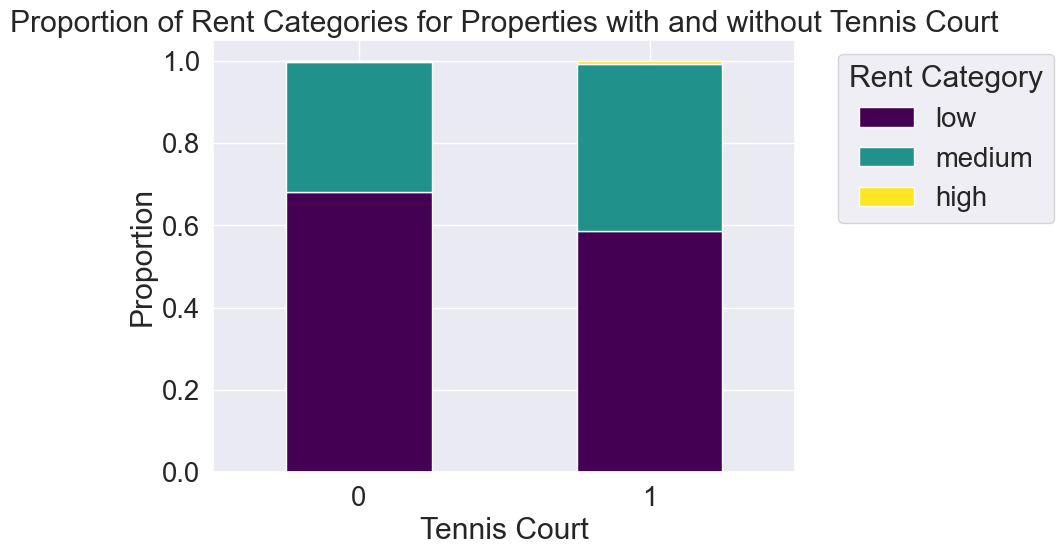

In [430]:
# Create a crosstab of the Barbeque area and rent_category
crosstab14 = pd.crosstab(rental2['Tennis Court'], rental2['rent_category'], normalize='index')

print(crosstab14)

# Plot the stacked bar plot
crosstab14.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Tennis Court')
plt.xlabel('Tennis Court')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [547]:
# Calculate mean for each category
mean_binary_by_category14 = rental2.groupby('rent_category')['Tennis Court'].mean()
print(mean_binary_by_category14)

rent_category
low       0.285099
medium    0.372356
high      0.544444
Name: Tennis Court, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\2456843557.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category14 = rental2.groupby('rent_category')['Tennis Court'].mean()


### Air-Cond vs rent_category (bar plot)

In [431]:
# Create a contingency table
contingency_table16 = pd.crosstab(rental2['Air-Cond'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table16['Total'] = contingency_table16.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table16.loc['Total'] = contingency_table16.sum(axis=0)

# Display the contingency table
print(contingency_table16)

rent_category    low  medium  high  Total
Air-Cond                                 
0               2984     258     4   3246
1              10015    6644    86  16745
Total          12999    6902    90  19991


rent_category       low    medium      high
Air-Cond                                   
0              0.919285  0.079482  0.001232
1              0.598089  0.396775  0.005136


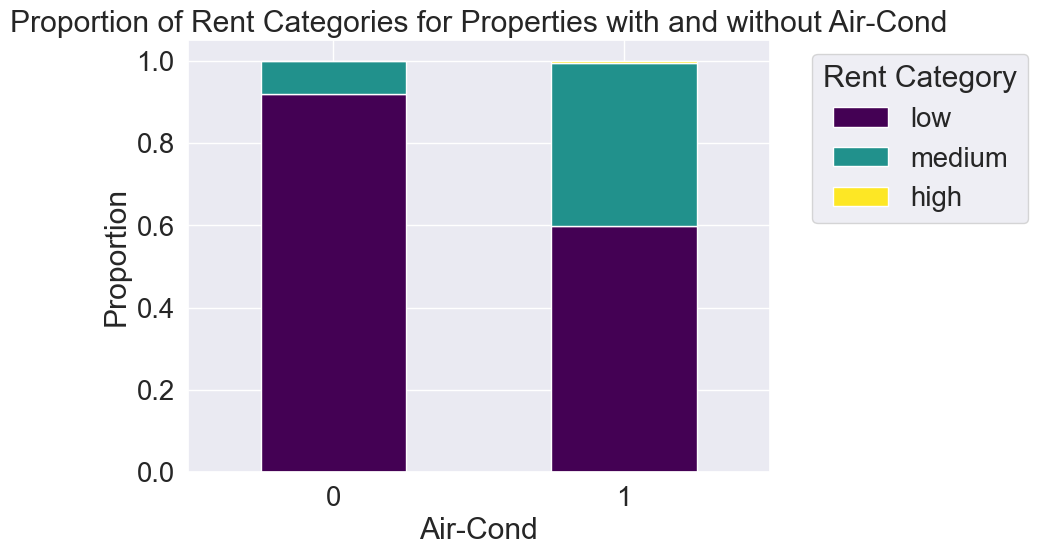

In [432]:
# Create a crosstab of the Barbeque area and rent_category
crosstab15 = pd.crosstab(rental2['Air-Cond'], rental2['rent_category'], normalize='index')

print(crosstab15)

# Plot the stacked bar plot
crosstab15.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Air-Cond')
plt.xlabel('Air-Cond')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [548]:
# Calculate mean for each category
mean_binary_by_category15 = rental2.groupby('rent_category')['Air-Cond'].mean()
print(mean_binary_by_category15)

rent_category
low       0.770444
medium    0.962620
high      0.955556
Name: Air-Cond, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\1636620014.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category15 = rental2.groupby('rent_category')['Air-Cond'].mean()


### Cooking Allowed vs rent_category  (bar plot)

In [433]:
# Create a contingency table
contingency_table17 = pd.crosstab(rental2['Cooking Allowed'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table17['Total'] = contingency_table17.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table17.loc['Total'] = contingency_table17.sum(axis=0)

# Display the contingency table
print(contingency_table17)

rent_category      low  medium  high  Total
Cooking Allowed                            
0                  874     320     7   1201
1                12125    6582    83  18790
Total            12999    6902    90  19991


rent_category         low    medium      high
Cooking Allowed                              
0                0.727727  0.266445  0.005828
1                0.645290  0.350293  0.004417


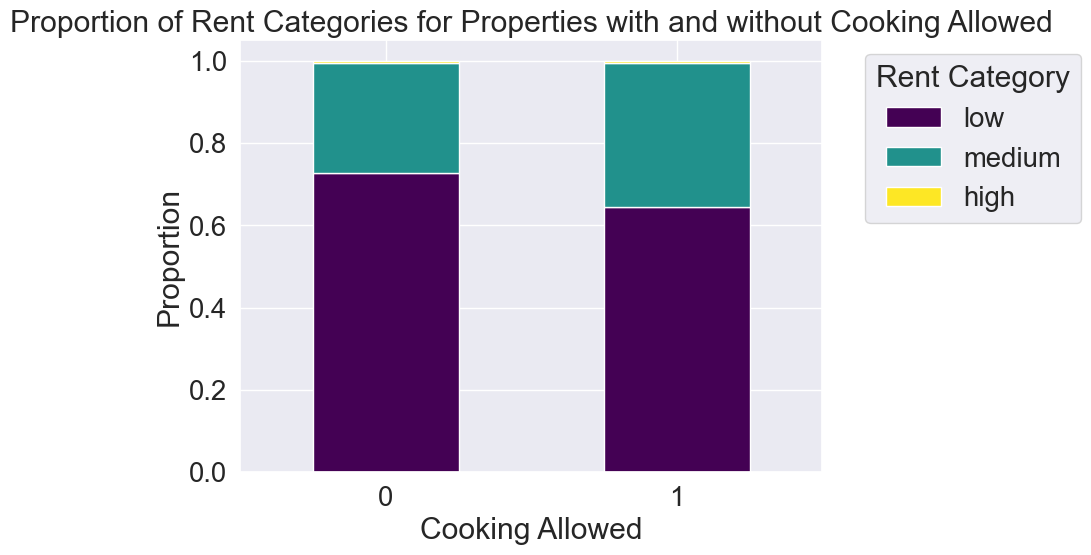

In [434]:
# Create a crosstab of the Barbeque area and rent_category
crosstab16 = pd.crosstab(rental2['Cooking Allowed'], rental2['rent_category'], normalize='index')

print(crosstab16)

# Plot the stacked bar plot
crosstab16.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Cooking Allowed')
plt.xlabel('Cooking Allowed')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [549]:
# Calculate mean for each category
mean_binary_by_category16 = rental2.groupby('rent_category')['Cooking Allowed'].mean()
print(mean_binary_by_category16)

rent_category
low       0.932764
medium    0.953637
high      0.922222
Name: Cooking Allowed, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\1250738915.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category16 = rental2.groupby('rent_category')['Cooking Allowed'].mean()


### Internet vs rent_category (bar plot)

In [435]:
# Create a contingency table
contingency_table18 = pd.crosstab(rental2['Internet'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table18['Total'] = contingency_table18.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table18.loc['Total'] = contingency_table18.sum(axis=0)

# Display the contingency table
print(contingency_table18)

rent_category    low  medium  high  Total
Internet                                 
0              11562    5859    65  17486
1               1437    1043    25   2505
Total          12999    6902    90  19991


rent_category       low    medium      high
Internet                                   
0              0.661215  0.335068  0.003717
1              0.573653  0.416367  0.009980


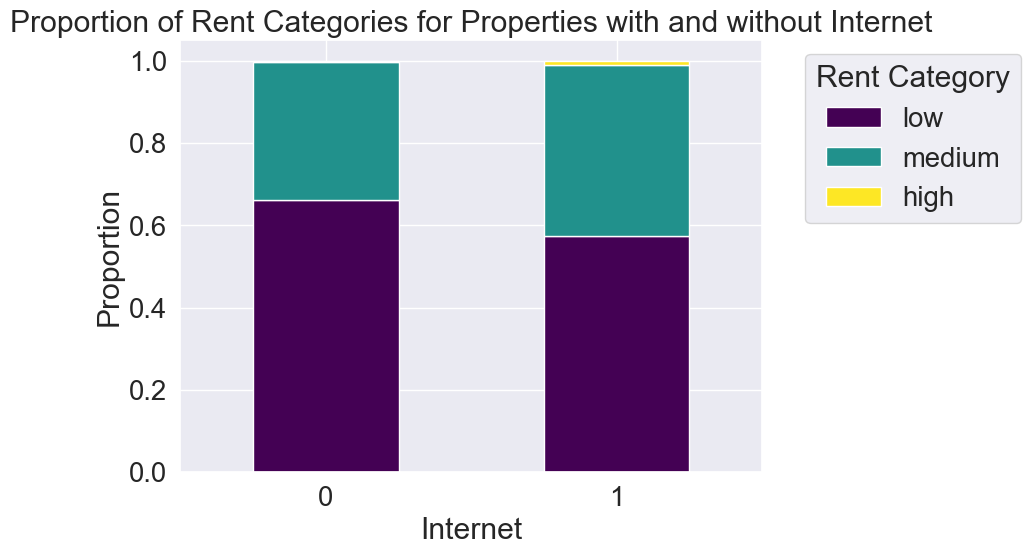

In [436]:
# Create a crosstab of the Barbeque area and rent_category
crosstab17 = pd.crosstab(rental2['Internet'], rental2['rent_category'], normalize='index')

print(crosstab17)

# Plot the stacked bar plot
crosstab17.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Internet')
plt.xlabel('Internet')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [550]:
# Calculate mean for each category
mean_binary_by_category17 = rental2.groupby('rent_category')['Internet'].mean()
print(mean_binary_by_category17)

rent_category
low       0.110547
medium    0.151116
high      0.277778
Name: Internet, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\2760624727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category17 = rental2.groupby('rent_category')['Internet'].mean()


### Near KTM/LRT vs rent_category  (bar plot)

In [437]:
# Create a contingency table
contingency_table19 = pd.crosstab(rental2['Near KTM/LRT'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table19['Total'] = contingency_table19.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table19.loc['Total'] = contingency_table19.sum(axis=0)

# Display the contingency table
print(contingency_table19)

rent_category    low  medium  high  Total
Near KTM/LRT                             
0               8381    4053    41  12475
1               4618    2849    49   7516
Total          12999    6902    90  19991


rent_category       low    medium      high
Near KTM/LRT                               
0              0.671824  0.324890  0.003287
1              0.614423  0.379058  0.006519


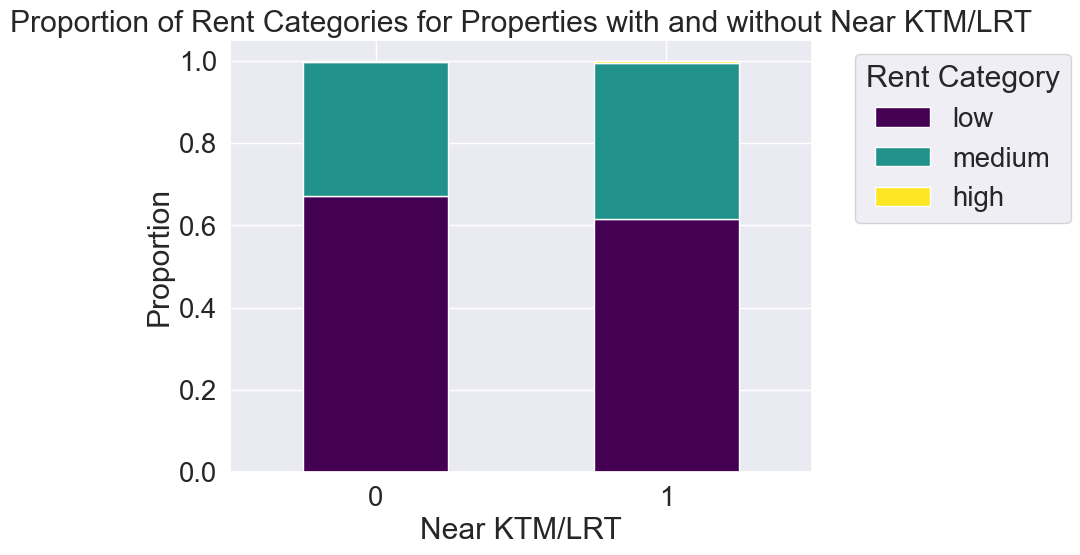

In [438]:
# Create a crosstab of the Barbeque area and rent_category
crosstab18 = pd.crosstab(rental2['Near KTM/LRT'], rental2['rent_category'], normalize='index')

print(crosstab18)

# Plot the stacked bar plot
crosstab18.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Near KTM/LRT')
plt.xlabel('Near KTM/LRT')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [551]:
# Calculate mean for each category
mean_binary_by_category18 = rental2.groupby('rent_category')['Near KTM/LRT'].mean()
print(mean_binary_by_category18)

rent_category
low       0.355258
medium    0.412779
high      0.544444
Name: Near KTM/LRT, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\3059487742.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category18 = rental2.groupby('rent_category')['Near KTM/LRT'].mean()


### Washing Machine vs rent_category  (bar plot)

In [439]:
# Create a contingency table
contingency_table20 = pd.crosstab(rental2['Washing Machine'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table20['Total'] = contingency_table20.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table20.loc['Total'] = contingency_table20.sum(axis=0)

# Display the contingency table
print(contingency_table20)

rent_category      low  medium  high  Total
Washing Machine                            
0                 5325    1195    10   6530
1                 7674    5707    80  13461
Total            12999    6902    90  19991


rent_category         low    medium      high
Washing Machine                              
0                0.815467  0.183002  0.001531
1                0.570091  0.423966  0.005943


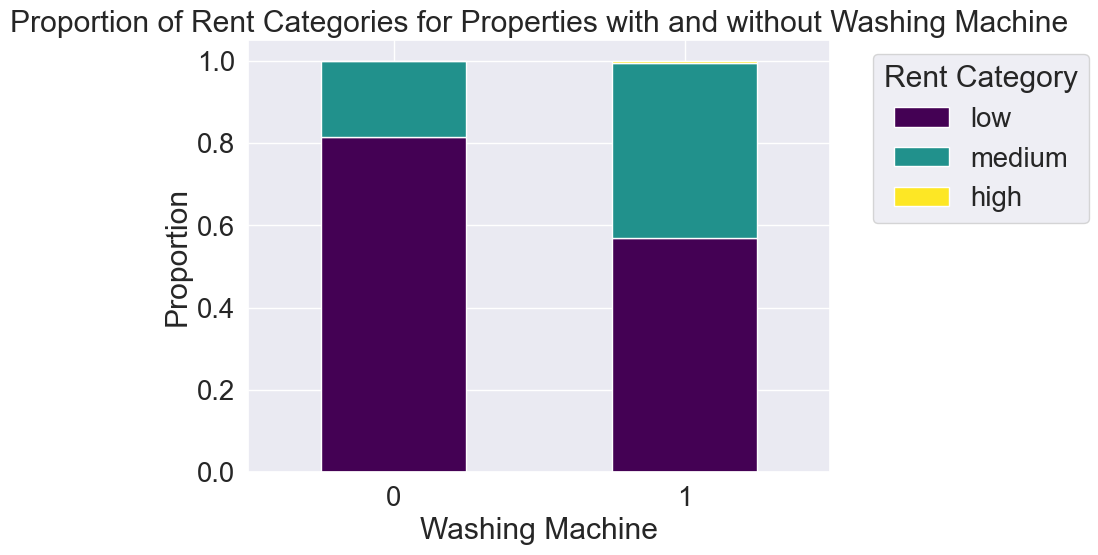

In [440]:
# Create a crosstab of the Barbeque area and rent_category
crosstab19 = pd.crosstab(rental2['Washing Machine'], rental2['rent_category'], normalize='index')

print(crosstab19)

# Plot the stacked bar plot
crosstab19.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Washing Machine')
plt.xlabel('Washing Machine')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [553]:
# Calculate mean for each category
mean_binary_by_category19 = rental2.groupby('rent_category')['Washing Machine'].mean()
print(mean_binary_by_category19)

rent_category
low       0.590353
medium    0.826862
high      0.888889
Name: Washing Machine, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\1544245624.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_binary_by_category19 = rental2.groupby('rent_category')['Washing Machine'].mean()


### Heatmap (for correlation)

Heatmaps are a valuable tool for EDA, it helps in getting a quick overview of the dataset and identifying potential correlations/relationships/trends between variables

In [123]:
rental_encoded1 = rental2.copy()

In [124]:
rental_encoded1['location'] = rental_encoded1['location'].astype('category').cat.codes
rental_encoded1['property_type'] = rental_encoded1['property_type'].astype('category').cat.codes
rental_encoded1['furnished'] = rental_encoded1['furnished'].astype('category').cat.codes
rental_encoded1['rent_category'] = rental_encoded1['rent_category'].astype('category').cat.codes
rental_encoded1['size_bins'] = rental_encoded1['size_bins'].astype('category').cat.codes

In [125]:
# Normalize numerical variables
numerical_vars = ['completion_year', 'rooms', 'parking', 'bathroom', 'size_num_sf', "Barbeque area", "Club house", "Gymnasium", "Jogging Track", "Lift", "Minimart", "Multipurpose hall", "Parking", "Playground", "Sauna", "Security", "Squash Court", "Swimming Pool", "Tennis Court", "Air-Cond", "Cooking Allowed", "Internet", "Near KTM/LRT", "Washing Machine"]
scaler = StandardScaler()
rental_encoded1[numerical_vars] = scaler.fit_transform(rental_encoded1[numerical_vars])

In [126]:
# Drop unnecessary columns
rental_encoded1.drop(columns=['monthly_rent', 'facilities', 'additional_facilities', 'size'], inplace=True)

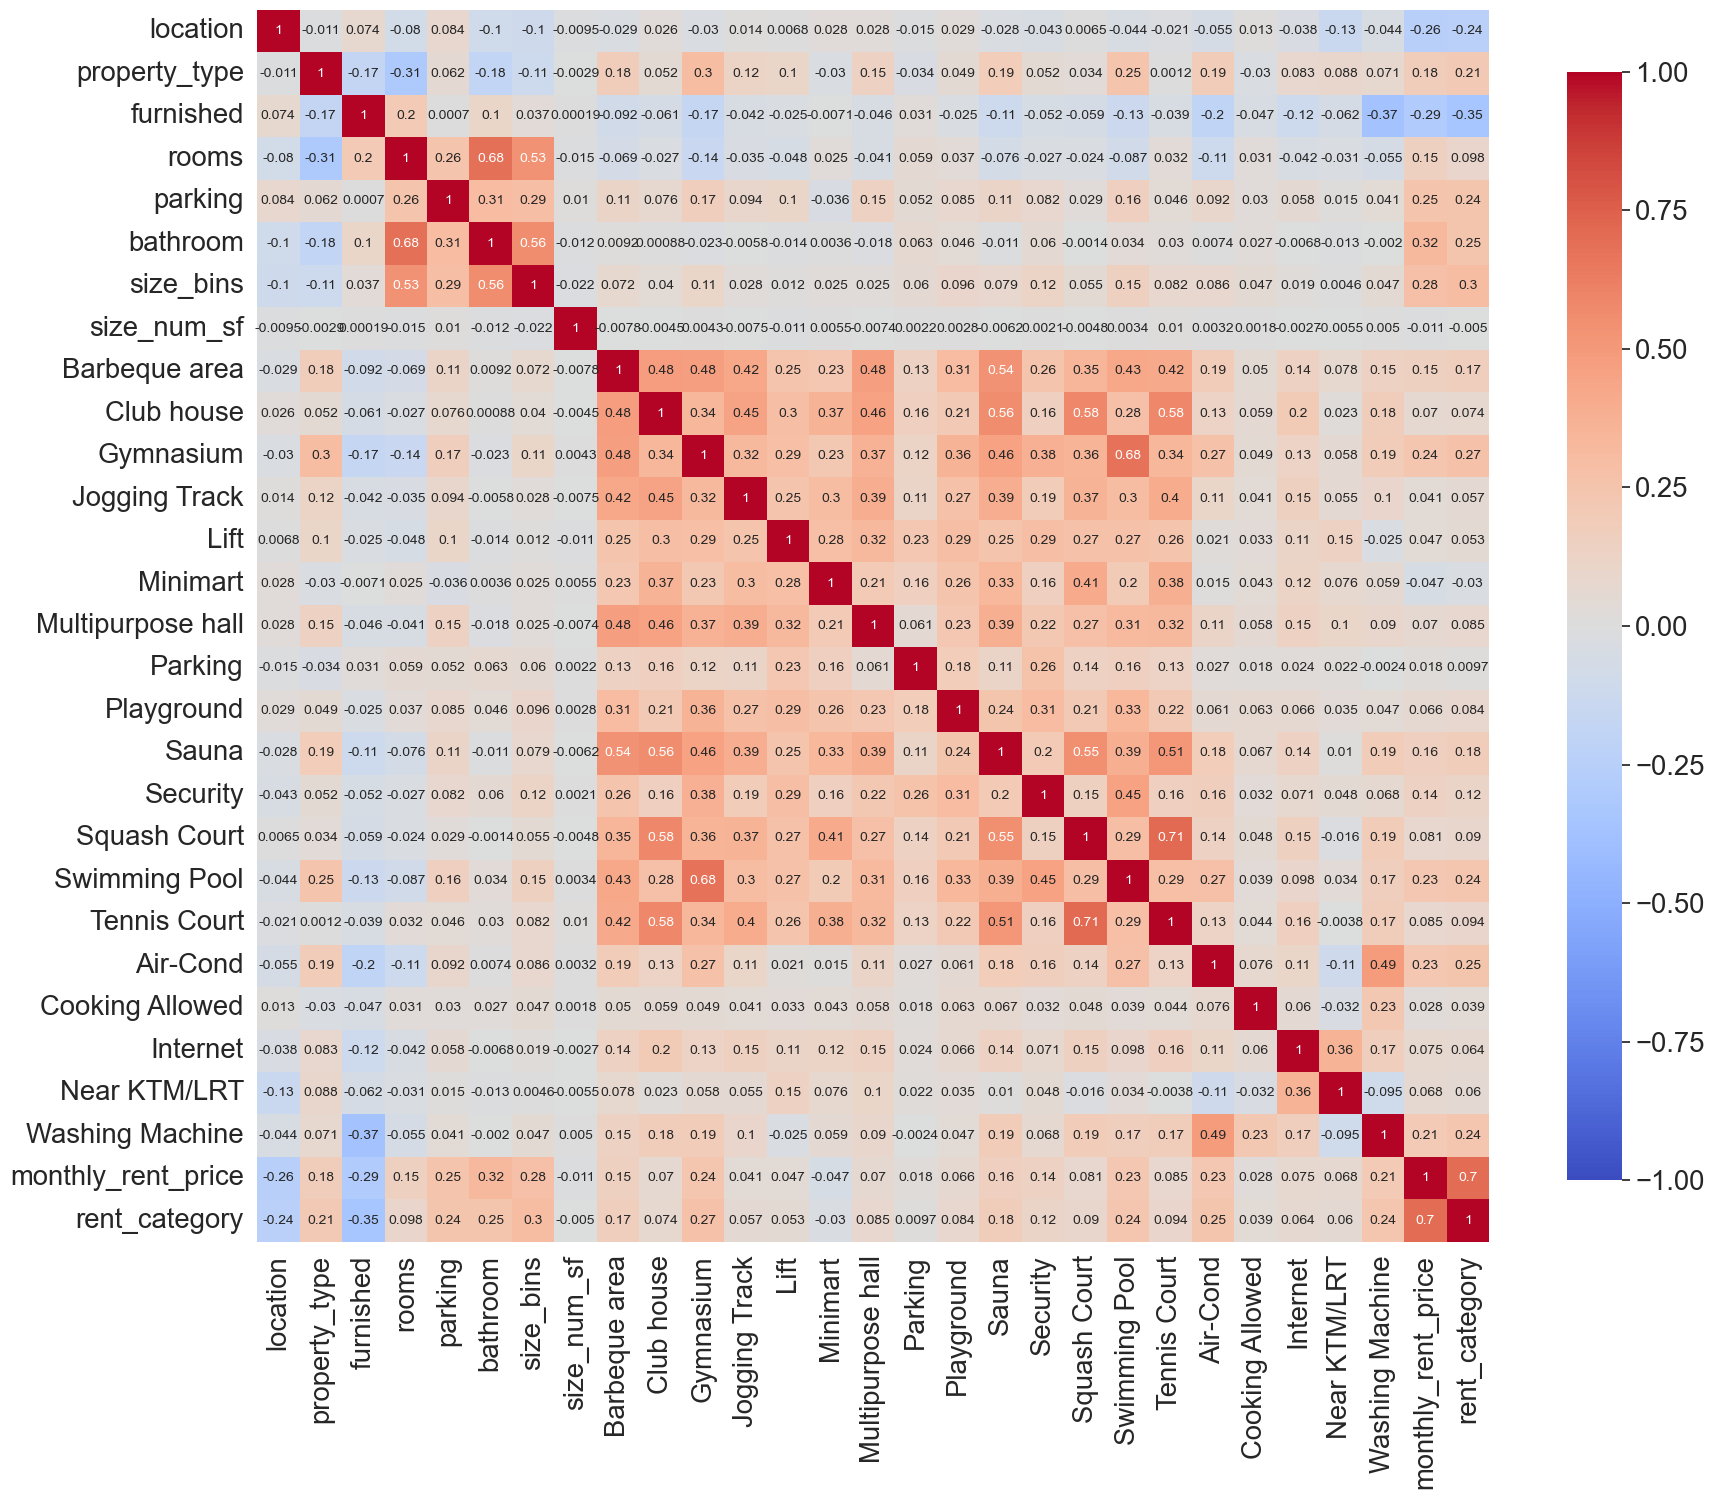

In [127]:
def plot_correlation_map( df ):
    sns.set(font_scale=1.8)
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 20 , 16 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = 'coolwarm',
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax,
        vmin=-1,
        annot = True, 
        annot_kws = { 'fontsize' : 10}
    )
plot_correlation_map( rental_encoded1[["location", "property_type", "furnished", "rooms", "parking", "bathroom", "size_bins", "size_num_sf", "Barbeque area", "Club house", "Gymnasium", "Jogging Track", "Lift", "Minimart", "Multipurpose hall", "Parking", "Playground", "Sauna", "Security", "Squash Court", "Swimming Pool", "Tennis Court", "Air-Cond", "Cooking Allowed", "Internet", "Near KTM/LRT", "Washing Machine", "monthly_rent_price", "rent_category"]] )

#### Interpretation

*Parking is with or without parking
**parking is number of parking

#### Correlations with rent_category:

##### Correlations:

monthly_rent_price (0.70): Strongly correlated with rent_category, as expected since they are directly related

size_bins (0.3): Moderately correlated.

property_type (0.21):  Slightly  correlated.

bathroom (0.25):  Slightly  correlated.

rooms (0.097): Weak negative correlation.

parking (0.24): Slightly correlated.

##### Correlations:

furnished (-0.35): Weak negative correlation.

location (-0.24): Weak negative correlation.

#### feature Correlations:

###### Positive Correlations:

Barbeque area and Gymnasium (0.48)

Air-cond and Washing Machine (0.49)

Gymnasium and Swimming pool (0.68)

rooms and bathroom (0.68)

Sauna and Tennis court (0.51)

Squash Court and Swimming Pool (0.71)

Swimming Pool and Tennis Court (0.59)

##### Negative Correlations:

Air-cond and MRT/LRT (-0.11)


#### Interpreting Specific Features:

Property_type: Positively correlated with Gymnasium (0.30 and swimming pool (0.25), but negatively correlated with furnished (-0.17), bathroom (-0.18) and size_bins (-0.11). Suggesting properties of a certain type (e.g., apartments) might be more likely to have amenities like gyms or swimming pools. Negative correlation, there might be a connection between property type and features like furnished status (-0.17), number of bathrooms (-0.18), or size (-0.11). For instance, apartments might tend to be less furnished, have fewer bathrooms, or be smaller than houses on average.

Rooms: Positively correlated with size_bins (0.54), bathroms(0.68), parking(0.25), but negatively correlated with property type (-0.31). For Positive correlations, as expected, there's a strong positive correlation between the number of rooms and the size of the property. Properties with more rooms are also likely to have more bathrooms and parking availability. The negative correlation with property type suggests that properties with more rooms might be less common in certain categories (e.g., apartments) compared to others (e.g., studio).

Parking: Positively correlated with bathroom (0.30), rooms (0.25), and size_bins( 0.29) suggesting properties with parking also have more bathrooms and rooms. There's also a positive correlation with property size (0.29).

Lift: Positively correlated with Gymnasium (0.29), Multipurpose hall (0.32), and Security (0.29), indicating a pattern where properties with lifts tend to have these amenities.

Furnished: Positively correlated with bathroom 0.10 and rooms(0.20). Although weak, there's a positive correlation between furnished properties and the number of bathrooms (0.10) and rooms (0.20). This might indicate that furnished properties tend to be larger or more luxurious.

Location: Negatively correlated with size_bins (0.10) and bathroom(0.10)  suggests that there might be a trend of smaller properties with fewer bathrooms in certain locations compared to others. 

#### Overall: Target Variable (rent_category)

Most significant feature for predicting rent_category are size_bins followed by bathroom, parking, property_type and rooms.

The weak correlation with other features suggests that rent_category is not strongly influenced by individual amenities but by a combination of various features.

### Outliers

In [568]:
rental2.describe()

completion_year         rooms       parking      bathroom  \
count     19991.000000  19991.000000  19991.000000  19991.000000   
mean       2017.660697      2.678505      1.294082      1.881096   
std           5.830898      0.800661      0.483551      0.515705   
min        1977.000000      1.000000      1.000000      1.000000   
25%        2016.000000      2.000000      1.000000      2.000000   
50%        2021.000000      3.000000      1.000000      2.000000   
75%        2021.000000      3.000000      2.000000      2.000000   
max        2025.000000      6.000000      4.000000      4.000000   

       monthly_rent_price  Barbeque area    Club house     Gymnasium  \
count        19991.000000   19991.000000  19991.000000  19991.000000   
mean          1612.140613       0.547797      0.292432      0.732129   
std            947.068222       0.497723      0.454891      0.442861   
min             70.000000       0.000000      0.000000      0.000000   
25%           1100.000000       0.000000      0.000000      0.000000   
50%           1400.000000       1.000000      0.000000      1.000000   
75%           1800.000000       1.000000      1.000000      1.000000   
max          18500.000000       1.000000      1.000000      1.000000   

       Jogging Track          Lift  ...      Security  Squash Court  \
count   19991.000000  19991.000000  ...  19991.000000  19991.000000   
mean        0.531489      0.692862  ...      0.924816      0.313541   
std         0.499020      0.461319  ...      0.263694      0.463944   
min         0.000000      0.000000  ...      0.000000      0.000000   
25%         0.000000      0.000000  ...      1.000000      0.000000   
50%         1.000000      1.000000  ...      1.000000      0.000000   
75%         1.000000      1.000000  ...      1.000000      1.000000   
max         1.000000      1.000000  ...      1.000000      1.000000   

       Swimming Pool  Tennis Court      Air-Cond  Cooking Allowed  \
count   19991.000000  19991.000000  19991.000000     19991.000000   
mean        0.815317      0.316392      0.837627         0.939923   
std         0.388050      0.465080      0.368802         0.237635   
min         0.000000      0.000000      0.000000         0.000000   
25%         1.000000      0.000000      1.000000         1.000000   
50%         1.000000      0.000000      1.000000         1.000000   
75%         1.000000      1.000000      1.000000         1.000000   
max         1.000000      1.000000      1.000000         1.000000   

           Internet  Near KTM/LRT  Washing Machine   size_num_sf  
count  19991.000000  19991.000000     19991.000000  1.999100e+04  
mean       0.125306      0.375969         0.673353  5.922172e+03  
std        0.331074      0.484384         0.468999  7.072596e+05  
min        0.000000      0.000000         0.000000  1.000000e+00  
25%        0.000000      0.000000         0.000000  7.500000e+02  
50%        0.000000      0.000000         1.000000  8.860000e+02  
75%        0.000000      1.000000         1.000000  1.044000e+03  
max        1.000000      1.000000         1.000000  1.000000e+08  

[8 rows x 25 columns]

C:\Users\Acer\AppData\Local\Temp\ipykernel_26308\3597197557.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rental2["monthly_rent_price"]);


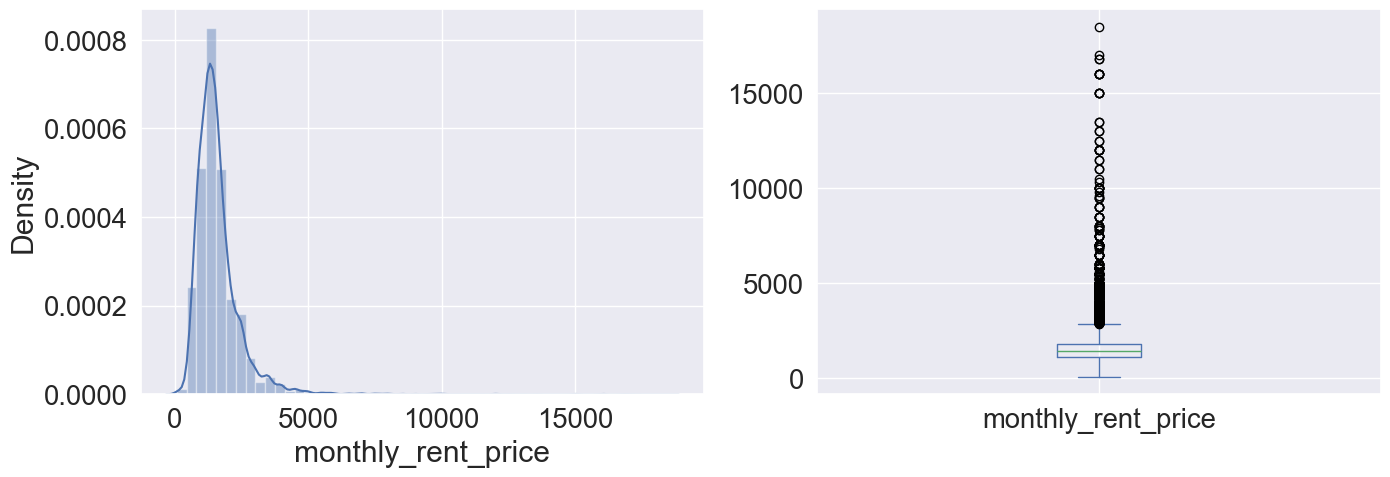

In [570]:
# create distribution plot and boxplot to check for outliers

plt.subplot(121)
sns.distplot(rental2["monthly_rent_price"]);

plt.subplot(122)
rental2["monthly_rent_price"].plot.box(figsize=(16,5))

plt.show()

Based on the summary statistics provided for monthly_rent_price, we can assess the presence of potential outliers, particularly by examining the minimum and maximum values alongside the interquartile range (IQR).

Therefore, based on the IQR method with a 1.5 multiplier (a common threshold for outlier detection):

•	The minimum value of 70 appears to be an outlier (since it's below the lower bound).
•	The maximum value of 18,500 is definitely an outlier (since it's far above the upper bound).

These outliers could potentially impact the models during the fitting since the upper bound is 2850. I did try to fit the models with and without the outliers. In models without the outlier, it removed the ‘High’ category. Hence, the outlier should be kept in this project.


## Model the data.

In [130]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Setting X and y

In [131]:
# Set features and target variable
features = ['location', 'property_type', 'furnished', 'rooms', 'parking', 'bathroom', 'size_bins', 
            'Barbeque area', 'Club house', 'Gymnasium', 'Jogging Track', 'Lift', 'Minimart', 
            'Multipurpose hall', 'Parking', 'Playground', 'Sauna', 'Security', 'Squash Court', 
            'Swimming Pool', 'Tennis Court', 'Air-Cond', 'Cooking Allowed', 'Internet', 
            'Near KTM/LRT', 'Washing Machine']

X = rental_encoded1[features]  # Use square brackets to extract columns by their names

y = rental_encoded1['rent_category']  # Target variable

In [132]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [134]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Logistic Regression 

In [135]:
# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42)

In [136]:
# Fit the Logistic Regression model
logreg_model.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [137]:
logreg_model.score(X_train_sc, y_train)

0.7948349174587294

In [138]:
logreg_model.score(X_test_sc, y_test)

0.7911977994498625

In [278]:
# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test_sc)

In [280]:
y_pred_logreg

array([1, 0, 1, ..., 1, 1, 0], dtype=int8)

In [281]:
cross_val_score(logreg_model, X_train_sc, y_train, cv = 5).mean()

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7944590056187432

### Logistic Regression 2 (with parameters)

In [143]:
logreg_model2 = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

In [144]:
# Fit the Logistic Regression model
logreg_model2.fit(X_train_sc, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [145]:
logreg_model2.score(X_train_sc, y_train)

0.7278014007003502

In [146]:
logreg_model2.score(X_test_sc, y_test)

0.7229307326831708

In [147]:
# Predict on the test set
y_pred_logreg2 = logreg_model2.predict(X_test_sc)

In [148]:
y_pred_logreg2

array([1, 0, 2, ..., 1, 1, 0], dtype=int8)

In [149]:
cross_val_score(logreg_model2, X_train_sc, y_train, cv = 5).mean()

0.7269258040886369

### Logistic Regression 3 (GridSearchCV)

In [150]:
from sklearn.model_selection import GridSearchCV 

In [151]:
# Define the logistic regression model
logreg_model3 = LogisticRegression(random_state=42, max_iter=1000)

In [152]:
# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

In [153]:
# Initialize GridSearchCV
logreg_grid_search = GridSearchCV(logreg_model3, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

In [154]:
logreg_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1_weighted')

In [155]:
# Best cross_val
logreg_grid_search.best_score_

0.7905536309735096

In [156]:
# Best model
logreg_grid_search.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

In [157]:
# Evaluate the best fit model on the test data.
logreg_grid_search.score(X_test_sc, y_test)

0.7864740014958443

In [158]:
# Best parameters
logreg_grid_search.best_params_

{'C': 0.1, 'solver': 'lbfgs'}

In [159]:
# Best estimator
logreg_model4 = logreg_grid_search.best_estimator_

In [160]:
logreg_model4.fit(X_train_sc, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

In [161]:
# Evaluate on train set
logreg_model4.score(X_train_sc, y_train)

0.7946473236618309

In [162]:
# Evaluate on test set
logreg_model4.score(X_test_sc, y_test)

0.7909477369342336

In [163]:
# Predict on the test set
y_pred_logreg4 = logreg_model4.predict(X_test_sc)

In [164]:
y_pred_logreg4

array([1, 0, 1, ..., 1, 1, 0], dtype=int8)

In [165]:
cross_val_score(logreg_model4, X_train_sc, y_train).mean()

0.7945215447056724

Overall

The train, test, and cross-validation scores are very close, indicating good generalization and minimal overfitting or underfitting.

The model is stable and performs consistently across different datasets. However, Logreg2 experience a significant drop in scores,this may be due to restricted parameter or that the parameter is not suitable.


### Decision Tree

In [166]:
# Instantiate the model
dt_model = DecisionTreeClassifier(random_state = 42)

In [167]:
# Fit the Decision Tree model
dt_model.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

In [168]:
dt_model.score(X_train_sc, y_train)

0.9869934967483742

In [169]:
dt_model.score(X_test_sc, y_test)

0.8414603650912729

In [170]:
# Predict on the test set
y_pred_dt = dt_model.predict(X_test_sc)

In [171]:
y_pred_dt

array([1, 1, 1, ..., 0, 1, 0], dtype=int8)

In [173]:
cross_val_score(dt_model, X_train_sc, y_train).mean()

0.8423591174618554

Interpretation

The Decision Tree has a very high training score but a lower test score. This indicates overfitting, where the model performs exceptionally well on the training data but struggles to generalize to new, unseen data. The cross-validation score is close to the test score, which confirms the overfitting issue.


### Decision Tree 2 (with parameters)

In [174]:
# Instantiate model with:
# - a maximum depth of 5.
# - at least 7 samples required in order to split an internal node.
# - at least 3 samples in each leaf node.
# - a cost complexity of 0.01.
# - random state of 42.

dt_model2 = DecisionTreeClassifier(max_depth = 5,
                            min_samples_split = 7,
                            min_samples_leaf = 3,
                            ccp_alpha = 0.01,
                            random_state = 42)

In [175]:
dt_model2.fit(X_train_sc, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_leaf=3,
                       min_samples_split=7, random_state=42)

In [176]:
dt_model2.score(X_train_sc, y_train)

0.7718859429714857

In [177]:
dt_model2.score(X_test_sc, y_test)

0.7699424856214053

In [178]:
# Predict on the test set
y_pred_dt2 = dt_model2.predict(X_test_sc)

In [179]:
cross_val_score(dt_model2, X_train_sc, y_train).mean()

0.7718859923588536

Interpretation

The Decision Tree shows almost similar training score to the test score. This indicates it generalizes well to unseen data. The cross-validation score is also close to the training and test scores, reinforcing that the model is neither overfitting nor underfitting.

### Decision Tree 3 (GridSearchCV)

In [180]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
dt_param_grid = {
    'max_depth': [5, 10, 20], # This controls the maximum depth of each tree to allows exploring trees with varying levels of complexity.
    'min_samples_split': [3, 7, 10], # Higher values can lead to less complex trees, potentially reducing overfitting and vice versa. Start from low value and gradually increase the value.
    'min_samples_leaf': [3, 7, 10], # Higher values can lead to simpler trees with fewer leaf nodes, potentially reducing overfitting and vice versa. Start from low value and gradually increase the value.
    'ccp_alpha': [0.001, 0.015, 0.02] # To reduce complexity and maximize testing accuracy
}

In [181]:
# Perform grid search with cross-validation
dt_model3= DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dt_model3, dt_param_grid, cv=5, scoring='f1_weighted')

In [182]:
# Fit the model
dt_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001, 0.015, 0.02],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [3, 7, 10],
                         'min_samples_split': [3, 7, 10]},
             scoring='f1_weighted')

In [183]:
# Best cross_val
dt_grid_search.best_score_

0.8062245558311476

In [184]:
# Best model
dt_grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_leaf=3,
                       min_samples_split=3, random_state=42)

In [185]:
# Evaluate the best fit model on the test data.
dt_grid_search.score(X_test_sc, y_test)

0.8076861724612111

In [186]:
dt_grid_search.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [187]:
dt_model4 = dt_grid_search.best_estimator_

In [188]:
dt_model4.fit(X_train_sc, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_leaf=3,
                       min_samples_split=3, random_state=42)

In [189]:
# Evaluate on train set
dt_model4.score(X_train_sc, y_train)

0.8135317658829415

In [190]:
# Evaluate on test set
dt_model4.score(X_test_sc, y_test)

0.8064516129032258

In [191]:
# Predict on the test set
y_pred_dt4 = dt_model4.predict(X_test_sc)

In [192]:
cross_val_score(dt_model4, X_train_sc, y_train).mean()

0.8063414712344636

The Decision Tree shows almost similar training score to the test score. This indicates it generalizes well to unseen data. The cross-validation score is also close to the training and test scores, reinforcing that the model is neither overfitting nor underfitting.

### Random Forest

In [193]:
# Initialize 
rf_model = RandomForestClassifier(random_state=42)

In [194]:
# Fit the Random Forest model
rf_model.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=42)

In [195]:
rf_model.score(X_train_sc, y_train)

0.9869934967483742

In [196]:
rf_model.score(X_test_sc, y_test)

0.8757189297324331

In [197]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test_sc)

In [198]:
y_pred_rf 

array([1, 1, 1, ..., 0, 1, 0], dtype=int8)

In [199]:
cross_val_score(rf_model, X_train_sc, y_train).mean()

0.87637602119643

Interpretation

A high training score but a lower test score. This indicates overfitting, where the model performs exceptionally well on the training data but struggles to generalize to new, unseen data. The cross-validation score is close to the test score, which confirms the overfitting issue

### Random Forest 2 (with parameters)

In [200]:
rf_model2 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42)

In [201]:
rf_model2.fit(X_train_sc, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [202]:
rf_model2.score(X_train_sc, y_train)

0.8609929964982491

In [203]:
rf_model2.score(X_test_sc, y_test)

0.835458864716179

In [204]:
# Predict on the test set
y_pred_rf2 = rf_model2.predict(X_test_sc)

In [205]:
y_pred_rf2

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [206]:
cross_val_score(rf_model2, X_train_sc, y_train).mean()

0.8433591172663597

Interpretation

A slight high training score from the test score. This indicates a slight overfitting, where the model performs well on the training data but struggles to generalize to new, unseen data. The cross-validation score is close to the test score, which confirms the overfitting issue

### Random Forest 3 (GridsearchCV)

In [207]:
# Define the parameter grid
rf_param_grid = {
    'n_estimators': [200, 250, 300], # Increasing the number of trees generally improves model performance by reducing variance
    'max_depth': [5, 10, 12], # Deeper trees can capture more complex relationships in the data but are also more prone to overfitting and vice versa
    'min_samples_split': [15, 25, 30], # Higher values can lead to less complex forests with fewer trees and potentially reduced overfitting, but might discard useful information
    'min_samples_leaf': [15, 20, 25], #  Higher values can lead to simpler trees with fewer leaf nodes, potentially reducing overfitting
    'max_features': ['sqrt', 'log2']
}

In [208]:
# Perform grid search with cross-validation
rf_model3 = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model3, rf_param_grid, cv=5, scoring='f1_weighted')

In [209]:
# Fit model
rf_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 12],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [15, 25, 30],
                         'n_estimators': [200, 250, 300]},
             scoring='f1_weighted')

In [210]:
# Best cross_val
rf_grid_search.best_score_

0.8375222535872595

In [211]:
# Best model
rf_grid_search.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_leaf=15, min_samples_split=15,
                       n_estimators=250, random_state=42)

In [212]:
rf_grid_search.best_params_

{'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 15,
 'n_estimators': 250}

In [213]:
rf_model4 = rf_grid_search.best_estimator_

In [214]:
rf_model4.fit(X_train_sc, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=15, min_samples_split=15,
                       n_estimators=250, random_state=42)

In [215]:
# Evaluate on train set
rf_model4.score(X_train_sc, y_train)

0.8578039019509754

In [216]:
# Evaluate on test set
rf_model4.score(X_test_sc, y_test)

0.8377094273568392

In [217]:
# Predict on the test set
y_pred_rf4 = rf_model4.predict(X_test_sc)

In [218]:
y_pred_rf4

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [219]:
cross_val_score(rf_model4, X_train_sc, y_train).mean()

0.8411077492360516

Interpretation

This model achieves a balance between training and test scores (around 0.837-0.857) with decent cross-validation performance, demonstrating the benefit of hyperparameter tuning.

The hyperparameters configuration helps the model learn effectively without overfitting significantly.


### Gradient Boosting

In [220]:
# Initialize 
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)

In [221]:
# Fit the Gradient Boosting model
gb_model.fit(X_train_sc, y_train)

GradientBoostingClassifier(random_state=42)

In [222]:
# Train the model
gb_model.score(X_train_sc, y_train)

0.8587418709354677

In [223]:
# Test the model
gb_model.score(X_test_sc, y_test)

0.8459614903725932

In [224]:
# Predict on the test set
y_pred_gb = gb_model.predict(X_test_sc)

In [225]:
print(y_pred_gb)

[1 1 1 ... 1 1 0]


In [226]:
# Evaluate the score
cross_val_score(gb_model, X_train_sc, y_train).mean()

0.847361169189637

Interpretation

The train, test, and cross-validation scores are very close, indicating good generalization and minimal overfitting or underfitting.

The model is stable and performs consistently across different datasets.


### Gradient Boosting 2 (with parameters)

In [227]:
gb_model2 = GradientBoostingClassifier(random_state=42, learning_rate=0.06, max_depth=5, n_estimators=200, subsample=0.95)

In [228]:
gb_model2.fit(X_train_sc, y_train)

GradientBoostingClassifier(learning_rate=0.06, max_depth=5, n_estimators=200,
                           random_state=42, subsample=0.95)

In [229]:
gb_model2.score(X_train_sc, y_train)

0.9048274137068534

In [230]:
gb_model2.score(X_test_sc, y_test)

0.870717679419855

In [231]:
# Predict on the test set
y_pred_gb2 = gb_model.predict(X_test_sc)

In [232]:
print(y_pred_gb2)

[1 1 1 ... 1 1 0]


In [233]:
cross_val_score(gb_model2, X_train_sc, y_train).mean()

0.8746873876510424

Interpretation:

The highest train score suggests the model fits the training data very well, but there's a risk of overfitting.

The test and cross-validation scores are also higher compared to other models, indicating strong performance even on unseen data.


### Gradient Boosting 3 (GridSearchCV)

In [441]:
# Define the parameter grid
gb_param_grid = {
    'n_estimators': [50, 100, 150], # Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance
    'learning_rate': [0.05, 0.07, 0.08], # Start with a small learning rate to avoid overshooting and instability.
    'max_depth': [5, 7, 8], # the default is 3, Gradient Boosting can often benefit from deeper trees (bigger number)
    'subsample': [0.75, 0.95, 1.0] # must be in between 0.0 to 1.0, <1.0 will lead to decrease in variance and increase in bias, we would want to avoid that
}

In [442]:
# Perform grid search with cross-validation
gb_model3 = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb_model3, gb_param_grid, cv=5, scoring='f1_weighted')

In [443]:
# Fit the model
gb_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.07, 0.08],
                         'max_depth': [5, 7, 8], 'n_estimators': [50, 100, 150],
                         'subsample': [0.75, 0.95, 1.0]},
             scoring='f1_weighted')

In [445]:
# Best cross_val
gb_grid_search.best_score_

0.8889294032666918

In [446]:
# Best model
gb_grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.07, max_depth=8, n_estimators=150,
                           random_state=42, subsample=0.95)

In [447]:
gb_grid_search.best_params_

{'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.95}

In [448]:
gb_model4 = gb_grid_search.best_estimator_

In [449]:
gb_model4.fit(X_train_sc, y_train)

GradientBoostingClassifier(learning_rate=0.07, max_depth=8, n_estimators=150,
                           random_state=42, subsample=0.95)

In [450]:
# Evaluate on train set
gb_model4.score(X_train_sc, y_train)

0.9683591795897949

In [451]:
# Evaluate on test set
gb_model4.score(X_test_sc, y_test)

0.889472368092023

In [452]:
# Predict on the test set
y_pred_gb4 = gb_model4.predict(X_test_sc)

In [453]:
y_pred_gb4

array([1, 1, 1, ..., 0, 1, 0], dtype=int8)

In [454]:
cross_val_score(gb_model4, X_train_sc, y_train).mean()

0.8896325677133703

Interpret

The training score is significantly higher than previous models, suggesting substantial overfitting. The model might be learning training data specifics too well and may not generalize well to unseen data.

The test score and cross-validation score are similar, indicating potential for reasonable generalizability despite the overfitting.



## Evaluate the model.

In [275]:
# Import
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [276]:
def f1_scorer(model, X_train_sc, X_test_sc, y_train, y_test):
  f1_train = f1_score(y_true=y_train, y_pred=model.predict(X_train_sc), average='micro')  # Choose the appropriate averaging strategy
  f1_test = f1_score(y_true=y_test, y_pred=model.predict(X_test_sc), average='micro')  # Choose the appropriate averaging strategy

  print("The training F1-score for " + str(model.__class__.__name__) + " is: " + str(f1_train))
  print("The testing F1-score for " + str(model.__class__.__name__) + " is: " + str(f1_test))
  print()

### Logistic Regression_model 1 (no parameter)

In [282]:
# Generate the classification report
target_names = ['low', 'medium', 'high']
print("Classification Report Logreg:\n", classification_report(y_test, y_pred_logreg, target_names=target_names))

Classification Report Logreg:
               precision    recall  f1-score   support

         low       0.82      0.88      0.85      2581
      medium       0.74      0.63      0.68      1403
        high       0.43      0.40      0.41        15

    accuracy                           0.79      3999
   macro avg       0.66      0.64      0.65      3999
weighted avg       0.79      0.79      0.79      3999



In [284]:
# Generate the confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg, labels=logreg_model.classes_)
print("Confusion Matrix:\n", conf_matrix_logreg)

Confusion Matrix:
 [[2275  306    0]
 [ 512  883    8]
 [   2    7    6]]


In [285]:
# Calculate the Matthews Correlation Coefficient
mcc_logreg = matthews_corrcoef(y_test, y_pred_logreg)
print("Matthews Correlation Coefficient:", mcc_logreg)

Matthews Correlation Coefficient: 0.5343913947189175


In [286]:
# Binarize the output labels for ROC AUC computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your classes (0: low, 1: medium, 2: high)

# ROC AUC
y_pred_prob_logreg = logreg_model.predict_proba(X_test_sc)
roc_auc_logreg = roc_auc_score(y_test_bin, y_pred_prob_logreg, multi_class='ovr')
print(f"ROC AUC Score for Logistic Regression: {roc_auc_logreg}")

ROC AUC Score for Logistic Regression: 0.8972740435305813


In [287]:
f1_scorer(logreg_model, X_train_sc, X_test, y_train, y_test)

The training F1-score for LogisticRegression is: 0.7948349174587293
The testing F1-score for LogisticRegression is: 0.6564141035258815



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [463]:
# Calculate the weighted F1 score
f1_weighted_logreg = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1 Score:", f1_weighted_logreg)

Weighted F1 Score: 0.786800487508601


### Logistics Regression_model 2 (with parameter)

In [288]:
# Generate the classification report
target_names = ['low', 'medium', 'high']
print("Classification Report Logreg2:\n", classification_report(y_test, y_pred_logreg2, target_names=target_names))

Classification Report Logreg2:
               precision    recall  f1-score   support

         low       0.87      0.76      0.81      2581
      medium       0.62      0.65      0.64      1403
        high       0.05      0.87      0.09        15

    accuracy                           0.72      3999
   macro avg       0.51      0.76      0.51      3999
weighted avg       0.78      0.72      0.75      3999



In [289]:
# Generate the confusion matrix
conf_matrix_logreg2 = confusion_matrix(y_test, y_pred_logreg2, labels=logreg_model2.classes_)
print("Confusion Matrix:\n", conf_matrix_logreg2)

Confusion Matrix:
 [[1961  556   64]
 [ 290  917  196]
 [   0    2   13]]


In [290]:
#Calculate the Matthews Correlation Coefficient
mcc_logreg2 = matthews_corrcoef(y_test, y_pred_logreg2)
print("Matthews Correlation Coefficient:", mcc_logreg2)

Matthews Correlation Coefficient: 0.4602142666398981


In [291]:
# Binarize the output labels for ROC AUC computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your classes (0: low, 1: medium, 2: high)

# ROC AUC
y_pred_prob_logreg2 = logreg_model2.predict_proba(X_test_sc)
roc_auc_logreg2 = roc_auc_score(y_test_bin, y_pred_prob_logreg2, multi_class='ovr')
print(f"ROC AUC Score for Logistic Regression: {roc_auc_logreg2}")

ROC AUC Score for Logistic Regression: 0.8758108665124746


In [292]:
#F1_score
f1_scorer(logreg_model2, X_train_sc, X_test, y_train, y_test)

The training F1-score for LogisticRegression is: 0.7278014007003502
The testing F1-score for LogisticRegression is: 0.6554138534633659



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [465]:
# Calculate the weighted F1 score
f1_weighted_logreg_model2 = f1_score(y_test, y_pred_logreg2, average='weighted')
print("Weighted F1 Score:", f1_weighted_logreg_model2)

Weighted F1 Score: 0.7477717294474792


### Logistics Regression_model 3 (with GridSearchCV)

In [293]:
# Generate the classification report
target_names = ['low', 'medium', 'high']
print("Classification Report Logreg4:\n", classification_report(y_test, y_pred_logreg4, target_names=target_names))

Classification Report Logreg4:
               precision    recall  f1-score   support

         low       0.82      0.88      0.85      2581
      medium       0.74      0.63      0.68      1403
        high       0.46      0.40      0.43        15

    accuracy                           0.79      3999
   macro avg       0.67      0.64      0.65      3999
weighted avg       0.79      0.79      0.79      3999



In [294]:
# Generate the confusion matrix
conf_matrix_logreg4 = confusion_matrix(y_test, y_pred_logreg4, labels=logreg_model4.classes_)
print("Confusion Matrix:\n", conf_matrix_logreg4)

Confusion Matrix:
 [[2275  306    0]
 [ 514  882    7]
 [   2    7    6]]


In [295]:
# Calculate the Matthews Correlation Coefficient
mcc_logreg4 = matthews_corrcoef(y_test, y_pred_logreg4)
print("Matthews Correlation Coefficient:", mcc_logreg4)

Matthews Correlation Coefficient: 0.5336396451538913


In [296]:
# Binarize the output labels for ROC AUC computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your classes (0: low, 1: medium, 2: high)

# ROC AUC
y_pred_prob_logreg4 = logreg_model4.predict_proba(X_test_sc)
roc_auc_logreg4 = roc_auc_score(y_test_bin, y_pred_prob_logreg4, multi_class='ovr')
print(f"ROC AUC Score for Logistic Regression: {roc_auc_logreg4}")

ROC AUC Score for Logistic Regression: 0.895877150233365


In [297]:
#F1_score
f1_scorer(logreg_model4, X_train_sc, X_test, y_train, y_test)

The training F1-score for LogisticRegression is: 0.7946473236618309
The testing F1-score for LogisticRegression is: 0.6564141035258815



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [466]:
# Calculate the weighted F1 score
f1_weighted_logreg_model4 = f1_score(y_test, y_pred_logreg4, average='weighted')
print("Weighted F1 Score:", f1_weighted_logreg_model4)

Weighted F1 Score: 0.7864740014958443


### Decision Tree_model 1 (no parameter)

In [299]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)
print("Confusion Matrix:\n", conf_matrix_dt)

Confusion Matrix:
 [[2293  287    1]
 [ 327 1063   13]
 [   0    6    9]]


In [298]:
# Classification Report
print("Classification Report DT1:\n", classification_report(y_test, y_pred_dt, target_names=['low', 'medium', 'high']))

Classification Report DT1:
               precision    recall  f1-score   support

         low       0.88      0.89      0.88      2581
      medium       0.78      0.76      0.77      1403
        high       0.39      0.60      0.47        15

    accuracy                           0.84      3999
   macro avg       0.68      0.75      0.71      3999
weighted avg       0.84      0.84      0.84      3999



In [300]:
# Matthews Correlation Coefficient
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)
print("Matthews Correlation Coefficient:", mcc_dt)

Matthews Correlation Coefficient: 0.6541455032057386


In [301]:
# ROC AUC
y_pred_prob_dt = dt_model.predict_proba(X_test_sc)
roc_auc_dt = roc_auc_score(y_test_bin, y_pred_prob_dt, multi_class='ovr')
print(f"ROC AUC Score for Decision Tree: {roc_auc_dt}")

ROC AUC Score for Decision Tree: 0.823760146504608


In [302]:
# F1_score
f1_scorer(dt_model, X_train_sc, X_test, y_train, y_test)

The training F1-score for DecisionTreeClassifier is: 0.9869934967483742
The testing F1-score for DecisionTreeClassifier is: 0.46136534133533386



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [467]:
# Calculate the weighted F1 score
f1_weighted_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Weighted F1 Score:", f1_weighted_dt)

Weighted F1 Score: 0.8412151643741738


### Decision Tree_model 2 (with parameters)

In [304]:
# Confusion Matrix
conf_matrix_dt2 = confusion_matrix(y_test, y_pred_dt2, labels=dt_model2.classes_)
print("Confusion Matrix:\n", conf_matrix_dt2)

Confusion Matrix:
 [[2007  574    0]
 [ 331 1072    0]
 [   1   14    0]]


In [303]:
# Classification Report
print("Classification Report DT2:\n", classification_report(y_test, y_pred_dt2, target_names=['low', 'medium', 'high']))

Classification Report DT2:
               precision    recall  f1-score   support

         low       0.86      0.78      0.82      2581
      medium       0.65      0.76      0.70      1403
        high       0.00      0.00      0.00        15

    accuracy                           0.77      3999
   macro avg       0.50      0.51      0.51      3999
weighted avg       0.78      0.77      0.77      3999



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [305]:
# Matthews Correlation Coefficient
mcc_dt2 = matthews_corrcoef(y_test, y_pred_dt2)
print("Matthews Correlation Coefficient:", mcc_dt2)

Matthews Correlation Coefficient: 0.522022003046429


In [306]:
# ROC AUC
y_pred_prob_dt2 = dt_model2.predict_proba(X_test_sc)
roc_auc_dt2 = roc_auc_score(y_test_bin, y_pred_prob_dt2, multi_class='ovr')
print(f"ROC AUC Score for Decision Tree: {roc_auc_dt2}")

ROC AUC Score for Decision Tree: 0.8125213317530428


In [307]:
# F1_score
f1_scorer(dt_model2, X_train_sc, X_test, y_train, y_test)

The training F1-score for DecisionTreeClassifier is: 0.7718859429714857
The testing F1-score for DecisionTreeClassifier is: 0.3893473368342085



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [468]:
# Calculate the weighted F1 score
f1_weighted_dt_model2 = f1_score(y_test, y_pred_dt2, average='weighted')
print("Weighted F1 Score:", f1_weighted_dt_model2)

Weighted F1 Score: 0.772136156018094


### Decision Tree_model 3 (with GridSearchCV)

In [309]:
# Confusion Matrix
conf_matrix_dt4 = confusion_matrix(y_test, y_pred_dt4, labels=dt_model4.classes_)
print("Confusion Matrix:\n", conf_matrix_dt4)

Confusion Matrix:
 [[2151  430    0]
 [ 327 1070    6]
 [   0   11    4]]


In [308]:
# Classification Report
print("Classification Report DT4:\n", classification_report(y_test, y_pred_dt4, target_names=['low', 'medium', 'high']))

Classification Report DT4:
               precision    recall  f1-score   support

         low       0.87      0.83      0.85      2581
      medium       0.71      0.76      0.73      1403
        high       0.40      0.27      0.32        15

    accuracy                           0.81      3999
   macro avg       0.66      0.62      0.63      3999
weighted avg       0.81      0.81      0.81      3999



In [310]:
# Matthews Correlation Coefficient
mcc_dt4 = matthews_corrcoef(y_test, y_pred_dt4)
print("Matthews Correlation Coefficient:", mcc_dt4)

Matthews Correlation Coefficient: 0.5869207135095896


In [311]:
# ROC AUC
y_pred_prob_dt4 = dt_model4.predict_proba(X_test_sc)
roc_auc_dt4 = roc_auc_score(y_test_bin, y_pred_prob_dt4, multi_class='ovr')
print(f"ROC AUC Score for Decision Tree: {roc_auc_dt4}")

ROC AUC Score for Decision Tree: 0.8917923611037096


In [312]:
# F1_score
f1_scorer(dt_model4, X_train_sc, X_test, y_train, y_test)

The training F1-score for DecisionTreeClassifier is: 0.8135317658829415
The testing F1-score for DecisionTreeClassifier is: 0.374593648412103



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [469]:
# Calculate the weighted F1 score
f1_weighted_dt_model4 = f1_score(y_test, y_pred_dt4, average='weighted')
print("Weighted F1 Score:", f1_weighted_dt_model4)

Weighted F1 Score: 0.8076861724612111


### Random Forest_model 1 (no parameter)

In [314]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
print("Confusion Matrix:\n", conf_matrix_rf)

Confusion Matrix:
 [[2391  190    0]
 [ 294 1103    6]
 [   0    7    8]]


In [313]:
# Classification Report
print("Classification Report RF:\n", classification_report(y_test, y_pred_rf, target_names=['low', 'medium', 'high']))

Classification Report RF:
               precision    recall  f1-score   support

         low       0.89      0.93      0.91      2581
      medium       0.85      0.79      0.82      1403
        high       0.57      0.53      0.55        15

    accuracy                           0.88      3999
   macro avg       0.77      0.75      0.76      3999
weighted avg       0.87      0.88      0.87      3999



In [315]:
# Matthews Correlation Coefficient
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
print("Matthews Correlation Coefficient:", mcc_rf)

Matthews Correlation Coefficient: 0.7266049188377934


In [316]:
# ROC AUC
y_pred_prob_rf = rf_model.predict_proba(X_test_sc)
roc_auc_rf = roc_auc_score(y_test_bin, y_pred_prob_rf, multi_class='ovr')
print(f"ROC AUC Score for Random Forest: {roc_auc_rf}")

ROC AUC Score for Random Forest: 0.9484074345068788


In [317]:
#F1_score
f1_scorer(rf_model, X_train_sc, X_test, y_train, y_test)

The training F1-score for RandomForestClassifier is: 0.9869934967483742
The testing F1-score for RandomForestClassifier is: 0.6181545386346586



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [470]:
# Calculate the weighted F1 score
f1_weighted_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Weighted F1 Score:", f1_weighted_rf)

Weighted F1 Score: 0.8744900994868948


### Random Forest_model 2 (with parameters)

In [318]:
# Classification Report
print("Classification Report RF2:\n", classification_report(y_test, y_pred_rf2, target_names=['low', 'medium', 'high']))

Classification Report RF2:
               precision    recall  f1-score   support

         low       0.87      0.89      0.88      2581
      medium       0.78      0.74      0.76      1403
        high       0.33      0.07      0.11        15

    accuracy                           0.84      3999
   macro avg       0.66      0.57      0.58      3999
weighted avg       0.83      0.84      0.83      3999



In [319]:
# Confusion Matrix
conf_matrix_rf2 = confusion_matrix(y_test, y_pred_rf2, labels=rf_model2.classes_)
print("Confusion Matrix:\n", conf_matrix_rf2)

Confusion Matrix:
 [[2295  286    0]
 [ 356 1045    2]
 [   0   14    1]]


In [320]:
# Matthews Correlation Coefficient
mcc_rf2 = matthews_corrcoef(y_test, y_pred_rf2)
print("Matthews Correlation Coefficient:", mcc_rf2)

Matthews Correlation Coefficient: 0.6381244335423384


In [321]:
# ROC AUC
y_pred_prob_rf2 = rf_model2.predict_proba(X_test_sc)
roc_auc_rf2 = roc_auc_score(y_test_bin, y_pred_prob_rf2, multi_class='ovr')
print(f"ROC AUC Score for Random Forest: {roc_auc_rf2}")

ROC AUC Score for Random Forest: 0.9402633969589398


In [322]:
#F1_score
f1_scorer(rf_model2, X_train_sc, X_test, y_train, y_test)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


The training F1-score for RandomForestClassifier is: 0.8609929964982491
The testing F1-score for RandomForestClassifier is: 0.6679169792448112



In [471]:
# Calculate the weighted F1 score
f1_weighted_rf_model2 = f1_score(y_test, y_pred_rf2, average='weighted')
print("Weighted F1 Score:", f1_weighted_rf_model2)

Weighted F1 Score: 0.833462723729488


### Random Forest_model 3 (with GrisdSearchCV)

In [324]:
# Confusion Matrix
conf_matrix_rf3 = confusion_matrix(y_test, y_pred_rf4, labels=rf_model4.classes_)
print("Confusion Matrix:\n", conf_matrix_rf3)

Confusion Matrix:
 [[2321  260    0]
 [ 374 1029    0]
 [   0   15    0]]


In [323]:
# Classification Report
print("Classification Repor RF3t:\n", classification_report(y_test, y_pred_rf4, target_names=['low', 'medium', 'high']))

Classification Repor RF3t:
               precision    recall  f1-score   support

         low       0.86      0.90      0.88      2581
      medium       0.79      0.73      0.76      1403
        high       0.00      0.00      0.00        15

    accuracy                           0.84      3999
   macro avg       0.55      0.54      0.55      3999
weighted avg       0.83      0.84      0.83      3999



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [325]:
# Matthews Correlation Coefficient
mcc_rf4 = matthews_corrcoef(y_test, y_pred_rf4)
print("Matthews Correlation Coefficient:", mcc_rf4)

Matthews Correlation Coefficient: 0.6410649969157793


In [326]:
# ROC AUC
y_pred_prob_rf4 = rf_model4.predict_proba(X_test_sc)
roc_auc_rf4 = roc_auc_score(y_test_bin, y_pred_prob_rf4, multi_class='ovr')
print(f"ROC AUC Score for Random Forest: {roc_auc_rf4}")

ROC AUC Score for Random Forest: 0.9390880961049697


In [327]:
#F1_score
f1_scorer(rf_model4, X_train_sc, X_test, y_train, y_test)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


The training F1-score for RandomForestClassifier is: 0.8578039019509754
The testing F1-score for RandomForestClassifier is: 0.6674168542135533



In [472]:
# Calculate the weighted F1 score
f1_weighted_rf_model4 = f1_score(y_test, y_pred_rf4, average='weighted')
print("Weighted F1 Score:", f1_weighted_rf_model4)

Weighted F1 Score: 0.8345791301904685


### Gradient Boosting_model 1 (no parameters)

In [205]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb, labels=gb_model.classes_)
print("Confusion Matrix:\n", conf_matrix_gb)

Confusion Matrix:
 [[2354  225    2]
 [ 288 1107    8]
 [   0    4   11]]


In [328]:
# Classification Report
print("Classification Report GB:\n", classification_report(y_test, y_pred_gb, target_names=['low', 'medium', 'high']))

Classification Report GB:
               precision    recall  f1-score   support

         low       0.87      0.90      0.88      2581
      medium       0.80      0.76      0.78      1403
        high       0.50      0.67      0.57        15

    accuracy                           0.85      3999
   macro avg       0.72      0.77      0.74      3999
weighted avg       0.85      0.85      0.85      3999



In [329]:
# Matthews Correlation Coefficient
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
print("Matthews Correlation Coefficient:", mcc_gb)

Matthews Correlation Coefficient: 0.6626792694964023


In [330]:
# ROC AUC
y_pred_prob_gb = gb_model.predict_proba(X_test_sc)
roc_auc_gb = roc_auc_score(y_test_bin, y_pred_prob_gb, multi_class='ovr')
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_gb}")

ROC AUC Score for Gradient Boosting: 0.9328388603459478


In [331]:
#F1_score
f1_scorer(gb_model, X_train_sc, X_test, y_train, y_test)

The training F1-score for GradientBoostingClassifier is: 0.8587418709354677
The testing F1-score for GradientBoostingClassifier is: 0.5003750937734434



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [473]:
# Calculate the weighted F1 score
f1_weighted_gb = f1_score(y_test, y_pred_gb, average='weighted')
print("Weighted F1 Score:", f1_weighted_gb)

Weighted F1 Score: 0.8452126812186538


### Gradient Boosting_model 2 (with parameters)

In [332]:
# Confusion Matrix
conf_matrix_gb2 = confusion_matrix(y_test, y_pred_gb2, labels=gb_model2.classes_)
print("Confusion Matrix:\n", conf_matrix_gb2)

Confusion Matrix:
 [[2312  268    1]
 [ 333 1061    9]
 [   0    5   10]]


In [455]:
# Classification Report
print("Classification Report GB2:\n", classification_report(y_test, y_pred_gb2, target_names=['low', 'medium', 'high']))

Classification Report GB2:
               precision    recall  f1-score   support

         low       0.87      0.90      0.88      2581
      medium       0.80      0.76      0.78      1403
        high       0.50      0.67      0.57        15

    accuracy                           0.85      3999
   macro avg       0.72      0.77      0.74      3999
weighted avg       0.85      0.85      0.85      3999



In [333]:
# Matthews Correlation Coefficient
mcc_gb2 = matthews_corrcoef(y_test, y_pred_gb2)
print("Matthews Correlation Coefficient:", mcc_gb2)

Matthews Correlation Coefficient: 0.6626792694964023


In [334]:
# ROC AUC
y_pred_prob_gb2 = gb_model2.predict_proba(X_test_sc)
roc_auc_gb2 = roc_auc_score(y_test_bin, y_pred_prob_gb2, multi_class='ovr')
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_gb2}")

ROC AUC Score for Gradient Boosting: 0.9557113277574537


In [335]:
#F1_score
f1_scorer(gb_model2, X_train_sc, X_test, y_train, y_test)

The training F1-score for GradientBoostingClassifier is: 0.9048274137068534
The testing F1-score for GradientBoostingClassifier is: 0.5328832208052013



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [474]:
# Calculate the weighted F1 score
f1_weighted_gb_model2 = f1_score(y_test, y_pred_gb2, average='weighted')
print("Weighted F1 Score:", f1_weighted_gb_model2)

Weighted F1 Score: 0.8452126812186538


### Gradient Boosting_model 3 (with GridSearchCV)

In [456]:
# Classification Report
print("Classification Report GB4:\n", classification_report(y_test, y_pred_gb4, target_names=['low', 'medium', 'high']))

Classification Report GB4:
               precision    recall  f1-score   support

         low       0.91      0.93      0.92      2581
      medium       0.86      0.82      0.84      1403
        high       0.56      0.67      0.61        15

    accuracy                           0.89      3999
   macro avg       0.77      0.81      0.79      3999
weighted avg       0.89      0.89      0.89      3999



In [457]:
# Confusion Matrix
conf_matrix_gb4 = confusion_matrix(y_test, y_pred_gb4, labels=gb_model4.classes_)
print("Confusion Matrix:\n", conf_matrix_gb4)

Confusion Matrix:
 [[2395  185    1]
 [ 244 1152    7]
 [   0    5   10]]


In [458]:
# Matthews Correlation Coefficient
mcc_gb4 = matthews_corrcoef(y_test, y_pred_gb4)
print("Matthews Correlation Coefficient:", mcc_gb4)

Matthews Correlation Coefficient: 0.7581918289760201


In [459]:
# ROC AUC
y_pred_prob_gb4 = gb_model4.predict_proba(X_test_sc)
roc_auc_gb4 = roc_auc_score(y_test_bin, y_pred_prob_gb4, multi_class='ovr')
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_gb4}")

ROC AUC Score for Gradient Boosting: 0.9393223539453245


In [460]:
#F1_score
f1_scorer(gb_model4, X_train_sc, X_test, y_train, y_test)

The training F1-score for GradientBoostingClassifier is: 0.9683591795897949
The testing F1-score for GradientBoostingClassifier is: 0.5161290322580645



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [475]:
# Calculate the weighted F1 score
f1_weighted_gb_model4 = f1_score(y_test, y_pred_gb4, average='weighted')
print("Weighted F1 Score:", f1_weighted_gb_model4)

Weighted F1 Score: 0.8889921975443356


### Feature Importance (the best of each)


Models selected:

Logistic Regression: Model 1

Decision Tree: Model 3

Random Forest: Model 2

Gradient Boosting: Model 2

In [512]:
# Logistic Regression
best_logreg_model = LogisticRegression(random_state=42)

# Fit the best model on the entire training data
best_logreg_model.fit(X_train_sc, y_train)

# Extract feature importances
logreg_importance = np.abs(logreg_model.coef_[0])

In [513]:
# Retrieve the best model from GridSearchCV
best_dt_model = dt_grid_search.best_estimator_

# Fit the best model on the entire training data
best_dt_model.fit(X_train_sc, y_train)

# Extract feature importances
dt_importances = best_dt_model.feature_importances_

In [514]:
# Retrieve the best model 
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42)

# Fit the best model on the entire training data
best_rf_model.fit(X_train_sc, y_train)

# Extract feature importances
rf_importances = best_rf_model.feature_importances_

In [515]:
# Retrieve the best model 
best_gb_model = GradientBoostingClassifier(random_state=42, learning_rate=0.06, max_depth=5, n_estimators=200, subsample=0.95)

# Fit the best model on the entire training data
best_gb_model.fit(X_train_sc, y_train)

# Extract feature importances
gb_importances = best_gb_model.feature_importances_

In [519]:
# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Logistic Regression': logreg_importance,
    'Decision Tree': dt_importances,
    'Random Forest': rf_importances,
    'Gradient Boosting': gb_importances
})

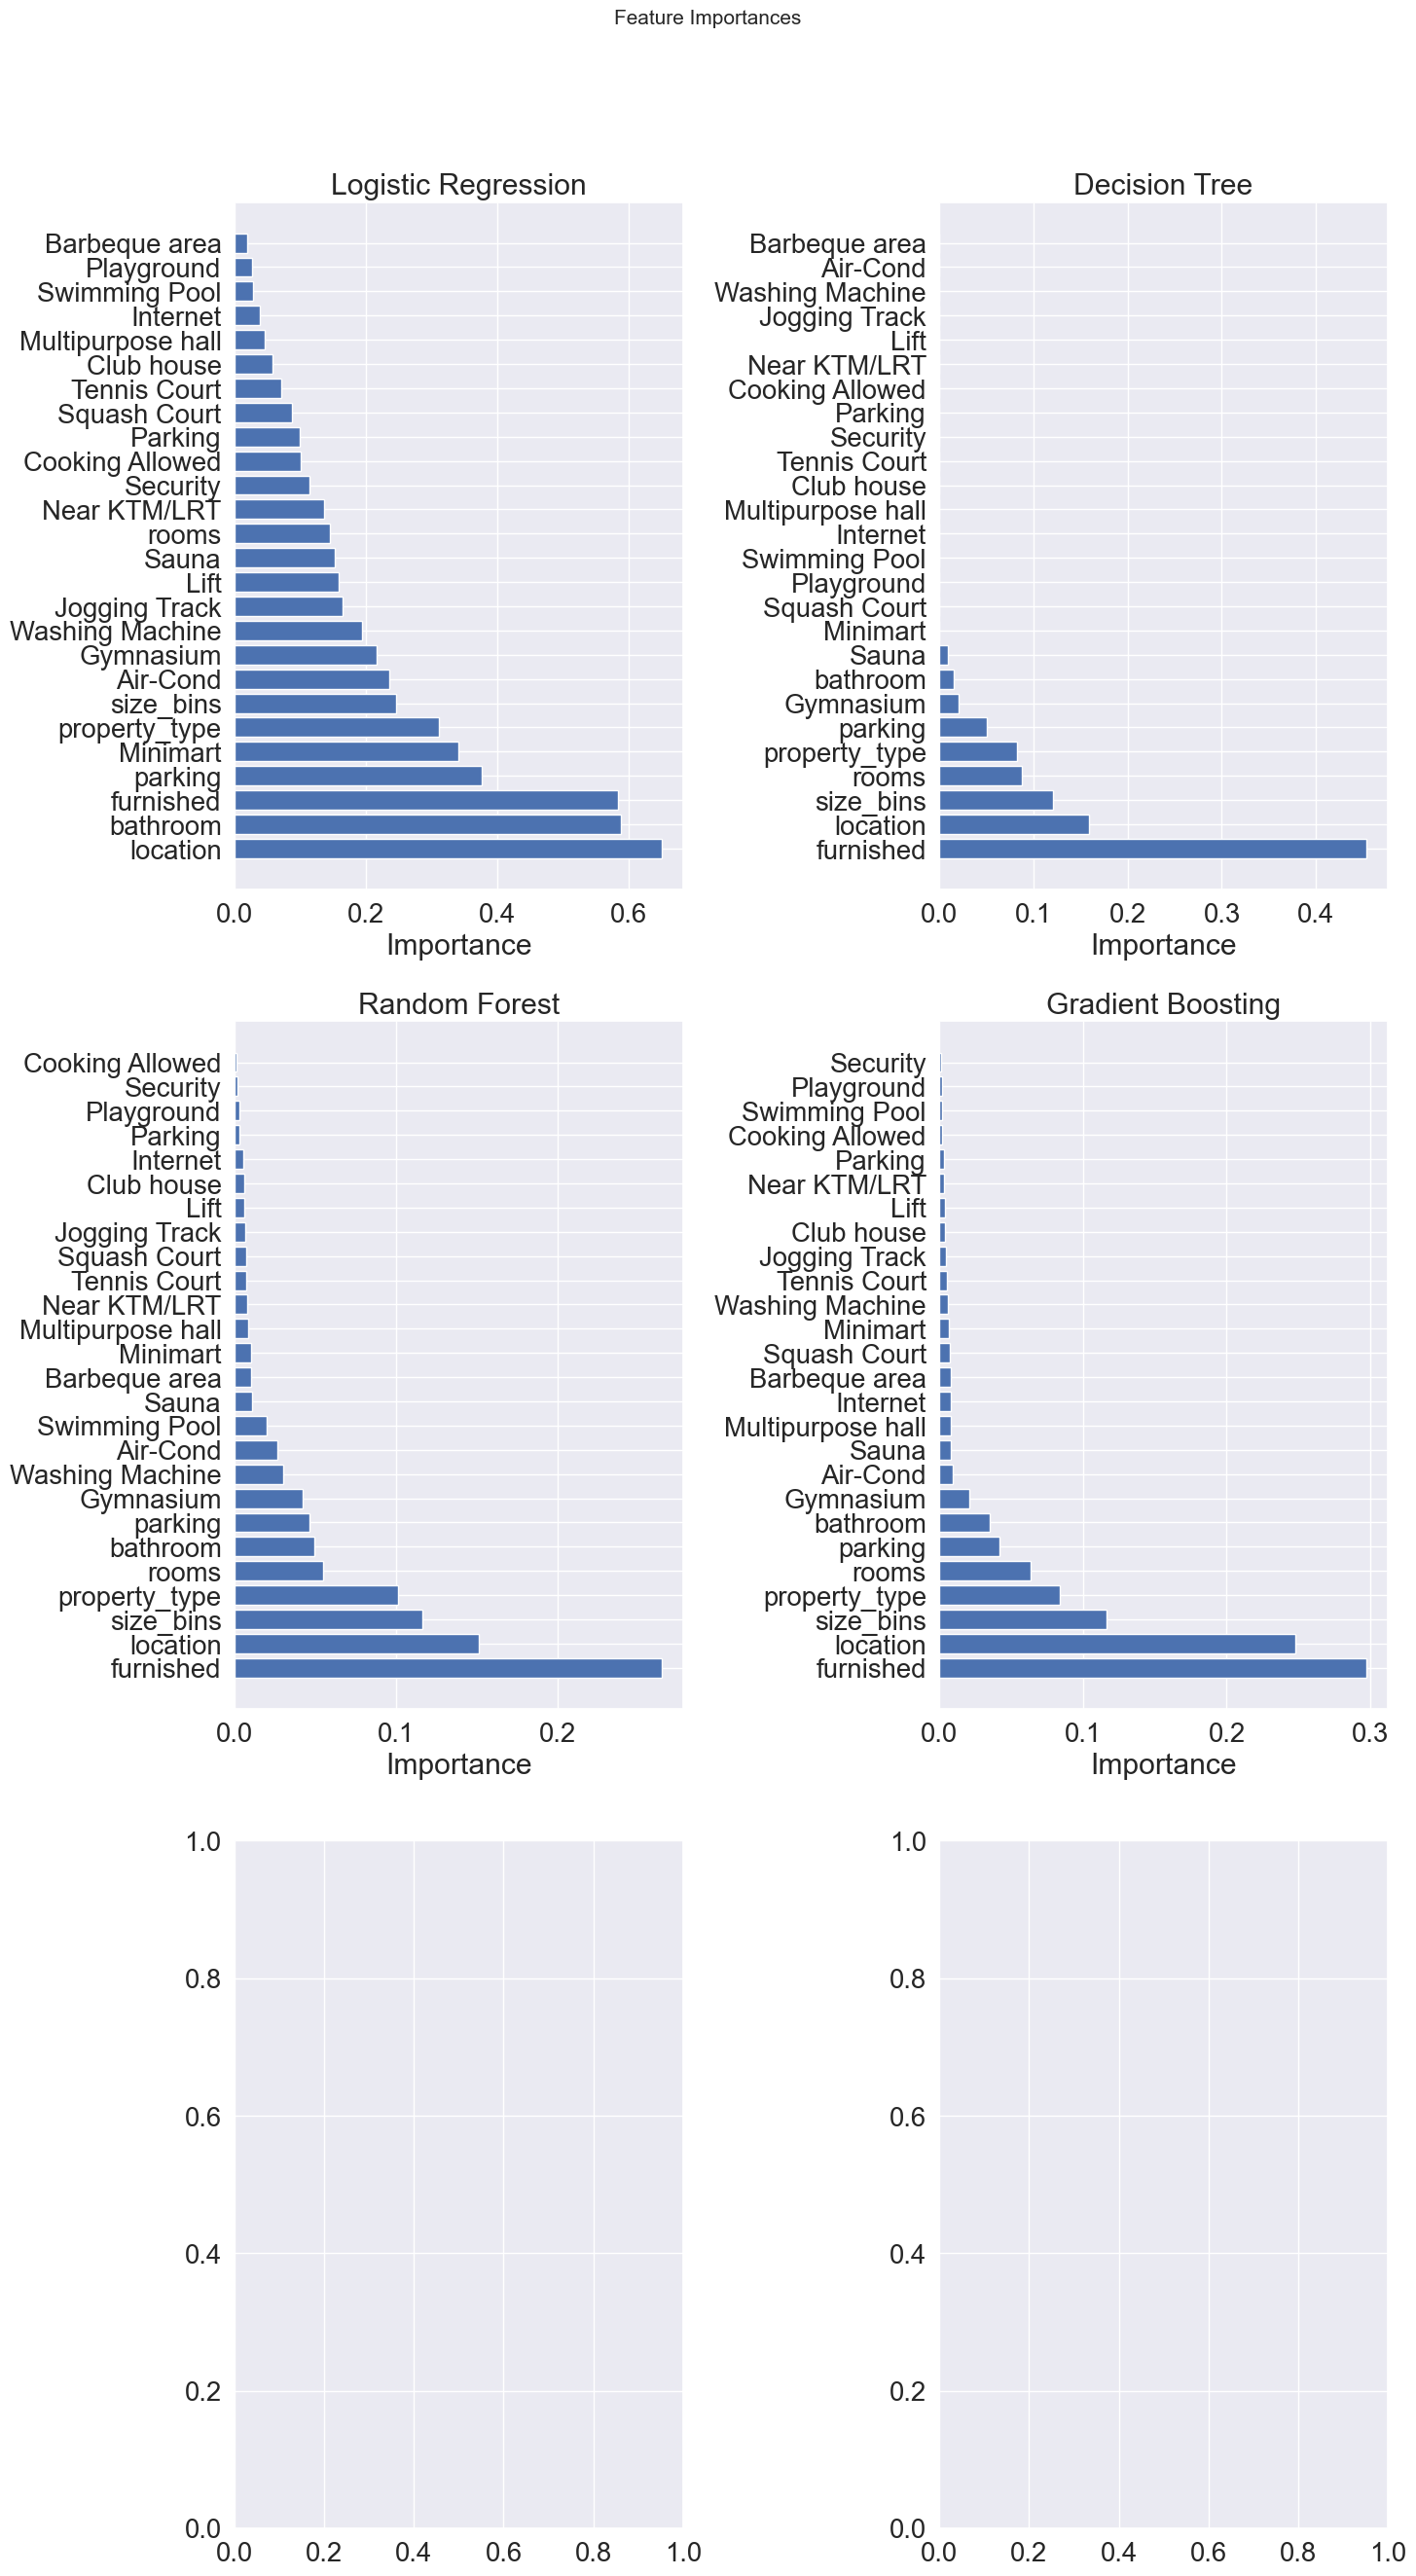

In [520]:
# Plot feature importances for each model
fig, axs = plt.subplots(3, 2, figsize=(15, 28))
fig.suptitle('Feature Importances', fontsize=15)

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
for i, model in enumerate(models):
    ax = axs[i // 2, i % 2]
    importance_df.sort_values(by=model, ascending=False, inplace=True)
    ax.barh(importance_df['Feature'], importance_df[model])
    ax.set_title(model)
    ax.set_xlabel('Importance')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Overall comparison

## Answer the problem


From the 4 selected models, **Gradient Boosting model** is preferred. GB2 seems to strike a good balance between overfitting control, generalizability, and the ability to handle the critical "high" rent category. It performs well in all classes while maintaining a reasonable overall accuracy.

In [571]:
# Train on entire training set
best_model = best_gb_model = GradientBoostingClassifier(random_state=42, learning_rate=0.06, max_depth=5, n_estimators=200, subsample=0.95)
best_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.06, max_depth=5, n_estimators=200,
                           random_state=42, subsample=0.95)

In [573]:
# Generate predictions on the test set:
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

In [574]:
# Calculate and report the final evaluation metrics on the test set:
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test, average='weighted'))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))
print("ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr'))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      2581
           1       0.83      0.79      0.81      1403
           2       0.53      0.67      0.59        15

    accuracy                           0.87      3999
   macro avg       0.75      0.79      0.77      3999
weighted avg       0.87      0.87      0.87      3999

Confusion Matrix:
 [[2362  218    1]
 [ 286 1109    8]
 [   0    5   10]]
F1 Score: 0.8698045132189134
Matthews Correlation Coefficient: 0.7162952433696824
ROC AUC Score: 0.9555768243926535


In [575]:
pred_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
print(pred_results)

       Actual  Predicted
8715        1          1
6463        1          1
1815        1          1
9119        0          0
12598       0          0
...       ...        ...
196         1          1
518         0          0
4653        0          1
5763        1          1
10781       0          0

[3999 rows x 2 columns]


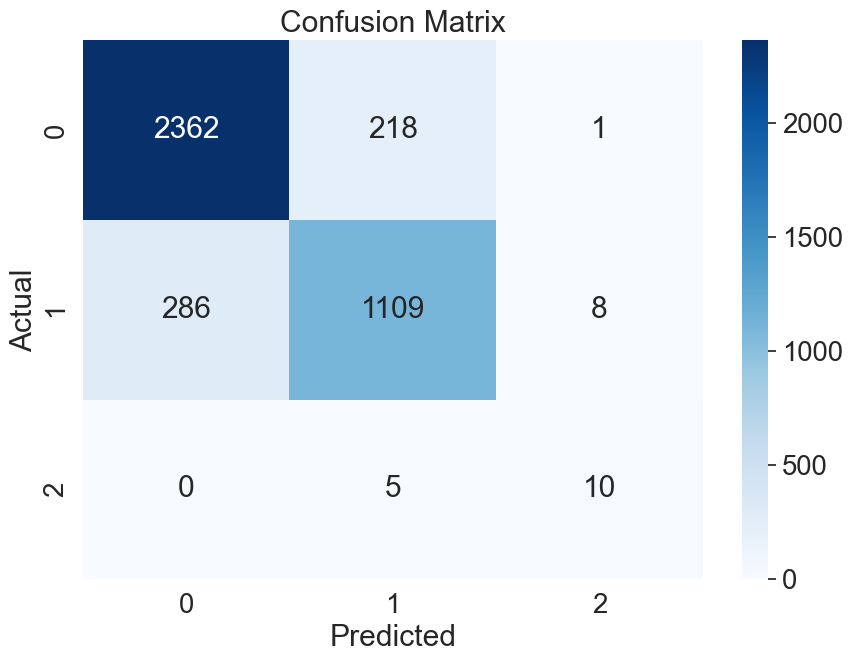

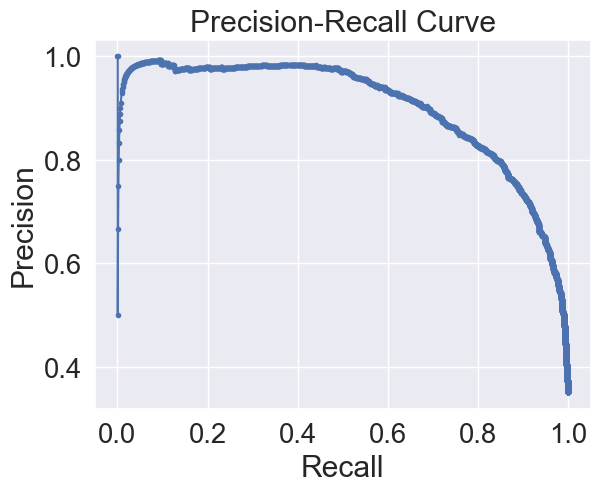

In [579]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision-Recall Curve
y_proba = best_model.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1], pos_label=best_model.classes_[1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

##### Heatmap

The heatmap suggests that the model performs well for identifying low rent units but might have difficulty with medium and high rent categories, particularly high rent which seems to be the most crucial category.


##### Precesion -Recal Curve

Higher precision at lower recall: The initial part of the curve shows a high precision (correctly predicted high rent). This is likely because the model prioritizes avoiding false positives (predicting high rent for non-high rent units). 

    Precision drop at higher recall: As the model tries to capture more true positives (correctly identify high rent units), it starts to include some false positives as well. This drives the precision down.


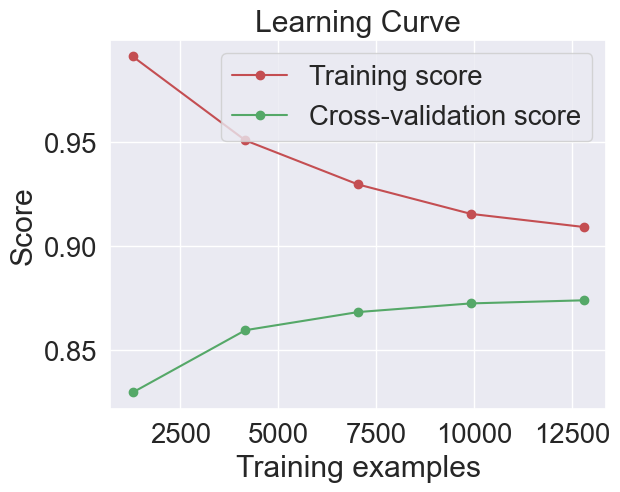

In [580]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='f1_weighted')

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()

A learning curve is a plot that shows how the training and cross-validation scores of a model change with the number of training examples. Here's how to interpret the provided learning curve:

Training Score:

The red line represents the training score.
The training score starts high (near 1.0) and decreases as the number of training examples increases.
A high initial training score suggests that the model fits the training data very well when the training set is small.
The decrease in training score indicates that as the model is trained on more data, it becomes slightly less overfitted to the training data.
Cross-Validation Score:

The green line represents the cross-validation score.
The cross-validation score starts lower and gradually increases as the number of training examples increases.
This suggests that with more training data, the model generalizes better to unseen data.
The cross-validation score seems to plateau as the number of training examples increases, indicating that additional data may not significantly improve performance beyond this point.
Gap Between Training and Cross-Validation Scores:

A large gap between the training and cross-validation scores indicates overfitting, where the model performs well on the training data but poorly on unseen data.
As the number of training examples increases, the gap between the training and cross-validation scores narrows, suggesting that the model is becoming less overfitted and more generalized.